# Yomikata: Disambiguating Japanese Heteronyms

A step by step guide to training Yomikata's word disambiguation model.

# Word pronunciation lists

To clean the datasets we use it is useful to have a list of Japanese words and their pronunciations. 

We do that by parsing the unidic and sudachi dictionaries. Note these scripts are slow -- but run one time only.

In [3]:
from yomikata.dataset.unidic import unidic_data

unidic_data()

[02/08/23 17:42:05] INFO     ✅ Processed unidic data!                                                 ]8;id=242197;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/unidic.py\unidic.py]8;;\:]8;id=885260;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/unidic.py#40\40]8;;\

In [4]:
from yomikata.dataset.sudachi import sudachi_data

sudachi_data()

                    INFO     notcore_lex.csv                                                          ]8;id=725571;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/sudachi.py\sudachi.py]8;;\:]8;id=581333;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/sudachi.py#23\23]8;;\

[02/08/23 17:42:11] INFO     small_lex.csv                                                            ]8;id=490836;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/sudachi.py\sudachi.py]8;;\:]8;id=956080;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/sudachi.py#23\23]8;;\

[02/08/23 17:42:14] INFO     core_lex.csv                                                             ]8;id=477905;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/sudachi.py\sudachi.py]8;;\:]8;id=757470;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/sudachi.py#23\23]8;;\

[02/08/23 17:42:26] INFO     ✅ Processed sudachi data!                                               ]8;id=643655;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/sudachi.py\sudachi.py]8;;\:]8;id=558580;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/sudachi.py#46\46]8;;\

In [5]:
from yomikata.dataset.pronunciations import pronunciation_data

pronunciation_data()

100%|██████████| 2714343/2714343 [00:04<00:00, 664031.59it/s]


[02/08/23 17:43:13] INFO     ✅ Merged all the pronunciation data!                             ]8;id=540862;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/pronunciations.py\pronunciations.py]8;;\:]8;id=142573;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/pronunciations.py#47\47]8;;\

In [6]:
from pathlib import Path

import pandas as pd
from yomikata.config import config

df = pd.read_csv(Path(config.READING_DATA_DIR, "all.csv"))
df.sample(10)

surface            kana
1248742  奈良県宇陀市菟田野大神  ならけんうだしうたのおおがみ
911761           行えよ           おこなえよ
1351536       広島県東中央  ひろしまけんひがしちゅうおう
1264267         宮の森町        みやのもりちょう
750759         手馴れりゃ           てなれりゃ
596799          つくだ煮            つくだに
82703            乙原村          おとはらむら
506094          議長決裁        ぎちょうけっさい
955044         過ぎ憂かろ           すぎうかろ
1507751       滋賀県醍醐町      しがけんだいごちょう

# Corpuses of annotated sentences

The model is trained on sentences which already have furigana. We have four data sources which we process here. Note these scripts are slow -- but run one time only.

[Corpus of titles of works in the national diet library](https://github.com/ndl-lab/huriganacorpus-ndlbib)

In [ ]:
from yomikata.dataset.ndlbib import ndlbib_data

ndlbib_data()

[Aozora Bunko book corpus](https://github.com/ndl-lab/huriganacorpus-aozora)

In [1]:
from yomikata.dataset.aozora import aozora_data

aozora_data()

[02/08/23 17:52:24] INFO     1/1944 nenmatsuno.txt                                                    ]8;id=978177;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=559666;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     2/1944 saigo.txt                                                         ]8;id=619177;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=912721;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     3/1944 gesaku.txt                                                        ]8;id=683510;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=636717;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:25] INFO     4/1944 yoba.txt                                                          ]8;id=520392;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=240937;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     5/1944 negi.txt                                                          ]8;id=111340;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=20466;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     6/1944 kubigaochita.txt                                                  ]8;id=64307;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=850424;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     7/1944 ryu.txt                                                           ]8;id=340174;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=599040;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     8/1944 konanno.txt                                                       ]8;id=395408;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=476102;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:26] INFO     9/1944 kokui.txt                                                         ]8;id=359981;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=745438;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     10/1944 jashumon.txt                                                     ]8;id=741945;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=915531;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     11/1944 bungakuzukino.txt                                                ]8;id=930039;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=713511;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     12/1944 tsuneto.txt                                                      ]8;id=512293;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=789146;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     13/1944 rashomon.txt                                                     ]8;id=267193;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=228915;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     14/1944 kamigamino.txt                                                   ]8;id=777666;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=579002;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     15/1944 iida.txt                                                         ]8;id=21440;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=693622;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     16/1944 futatsuno.txt                                                    ]8;id=319346;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=219690;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     17/1944 nyosen.txt                                                       ]8;id=634005;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=568621;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     18/1944 oritsuto.txt                                                     ]8;id=776350;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=999812;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:27] INFO     19/1944 torokko.txt                                                      ]8;id=699653;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=923210;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     20/1944 tenkibo.txt                                                      ]8;id=669566;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=135307;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     21/1944 shiro.txt                                                        ]8;id=563996;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=385300;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     22/1944 kesato.txt                                                       ]8;id=153302;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=306341;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     23/1944 kappa.txt                                                        ]8;id=83854;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=828792;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     24/1944 yasukichino.txt                                                  ]8;id=949186;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=698380;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:28] INFO     25/1944 kiseru.txt                                                       ]8;id=60204;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=359179;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     26/1944 majutsu.txt                                                      ]8;id=904197;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=897763;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     27/1944 umano.txt                                                        ]8;id=276534;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=403019;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     28/1944 ogin.txt                                                         ]8;id=51071;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=936402;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     29/1944 biseino.txt                                                      ]8;id=841265;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=865238;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     30/1944 onna.txt                                                         ]8;id=400065;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=475031;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     31/1944 hana.txt                                                         ]8;id=24768;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=105464;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     32/1944 takita.txt                                                       ]8;id=515733;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=497659;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     33/1944 bunsho.txt                                                       ]8;id=903843;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=742632;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     34/1944 haha.txt                                                         ]8;id=475029;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=332685;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     35/1944 shunkan.txt                                                      ]8;id=26726;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=375486;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:29] INFO     36/1944 samayoeru.txt                                                    ]8;id=371768;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=578574;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     37/1944 yabuno.txt                                                       ]8;id=541335;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=981100;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     38/1944 kumono.txt                                                       ]8;id=174498;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=759375;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     39/1944 mikan.txt                                                        ]8;id=269215;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=58159;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     40/1944 un.txt                                                           ]8;id=28925;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=907069;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     41/1944 giwaku.txt                                                       ]8;id=868482;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=730190;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     42/1944 momotaro.txt                                                     ]8;id=149707;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=368817;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     43/1944 susanono.txt                                                     ]8;id=381264;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=707384;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:30] INFO     44/1944 kaikano.txt                                                      ]8;id=498971;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=936528;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     45/1944 haguruma.txt                                                     ]8;id=984552;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=127184;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:31] INFO     46/1944 yarigatakeni.txt                                                 ]8;id=904799;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=712073;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     47/1944 sennin2.txt                                                      ]8;id=300338;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=296340;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     48/1944 agunino.txt                                                      ]8;id=144040;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=213594;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     49/1944 sarukani.txt                                                     ]8;id=610880;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=13416;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     50/1944 chuto.txt                                                        ]8;id=773566;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=739320;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     51/1944 genkaku.txt                                                      ]8;id=354806;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=325819;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     52/1944 shinkiro.txt                                                     ]8;id=153526;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=65508;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     53/1944 oshino.txt                                                       ]8;id=976177;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=738984;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     54/1944 nyotai.txt                                                       ]8;id=871377;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=682874;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:32] INFO     55/1944 sato.txt                                                         ]8;id=965717;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=453010;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     56/1944 koryomu.txt                                                      ]8;id=362487;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=472647;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     57/1944 chichi.txt                                                       ]8;id=177511;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=839946;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     58/1944 shuzanzu.txt                                                     ]8;id=394627;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=390676;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     59/1944 ojigi.txt                                                        ]8;id=124652;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=156347;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     60/1944 chugi.txt                                                        ]8;id=427042;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=6533;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     61/1944 kikaina.txt                                                      ]8;id=882816;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=532848;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     62/1944 numachi.txt                                                      ]8;id=766073;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=765716;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     63/1944 aruhino.txt                                                      ]8;id=128331;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=755499;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     64/1944 mori.txt                                                         ]8;id=424543;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=101861;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     65/1944 hyottoko.txt                                                     ]8;id=182235;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=605824;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     66/1944 rojo.txt                                                         ]8;id=151485;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=561665;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:33] INFO     67/1944 mittsuno.txt                                                     ]8;id=483448;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=356326;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     68/1944 honjo.txt                                                        ]8;id=653518;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=247247;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     69/1944 mittsuno.txt                                                     ]8;id=283390;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=210700;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     70/1944 kage.txt                                                         ]8;id=142044;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=849176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:34] INFO     71/1944 shogun.txt                                                       ]8;id=706619;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=240142;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     72/1944 hoonki.txt                                                       ]8;id=182560;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=839256;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     73/1944 inuto.txt                                                        ]8;id=126556;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=118593;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     74/1944 toshishun.txt                                                    ]8;id=862829;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=956064;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     75/1944 monogusa.txt                                                     ]8;id=993381;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=278760;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     76/1944 nichibotsuno.txt                                                 ]8;id=980679;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=638745;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     77/1944 kinno.txt                                                        ]8;id=724660;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=984765;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     78/1944 shimano.txt                                                      ]8;id=263333;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=412986;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     79/1944 morino.txt                                                       ]8;id=54959;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=786613;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     80/1944 fushigina.txt                                                    ]8;id=398709;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=4892;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:35] INFO     81/1944 hateshinaki.txt                                                  ]8;id=958011;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=162685;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     82/1944 hyakushono.txt                                                   ]8;id=616758;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=624061;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     83/1944 akuma.txt                                                        ]8;id=183749;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=753043;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     84/1944 nukegami.txt                                                     ]8;id=852751;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=403195;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     85/1944 yono.txt                                                         ]8;id=259740;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=617270;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     86/1944 ii.txt                                                           ]8;id=83379;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=665618;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     87/1944 sabakuno.txt                                                     ]8;id=245705;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=708152;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     88/1944 denshinbashirato.txt                                             ]8;id=290754;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=354376;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     89/1944 shiroi.txt                                                       ]8;id=290862;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=858292;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     90/1944 nobara.txt                                                       ]8;id=169255;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=710305;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     91/1944 kogoeru.txt                                                      ]8;id=840209;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=402156;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     92/1944 tobira.txt                                                       ]8;id=51885;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=452131;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     93/1944 usionna.txt                                                      ]8;id=599446;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=855881;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     94/1944 kuroi.txt                                                        ]8;id=606563;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=141616;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     95/1944 mittsuno.txt                                                     ]8;id=89596;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=871576;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     96/1944 tsukiyoto.txt                                                    ]8;id=541906;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=381621;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     97/1944 togeno.txt                                                       ]8;id=909921;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=575358;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     98/1944 katai.txt                                                        ]8;id=235616;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=161518;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:36] INFO     99/1944 roba.txt                                                         ]8;id=940799;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=30521;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     100/1944 yurino.txt                                                      ]8;id=971479;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=966986;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     101/1944 aoi.txt                                                         ]8;id=791051;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=926253;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     102/1944 akai.txt                                                        ]8;id=524166;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=783178;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     103/1944 tekateka.txt                                                    ]8;id=488313;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=468328;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     104/1944 so.txt                                                          ]8;id=227395;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=630917;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     105/1944 barato.txt                                                      ]8;id=744465;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=440706;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     106/1944 dokokani.txt                                                    ]8;id=221952;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=747070;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     107/1944 kurai.txt                                                       ]8;id=305528;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=15049;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     108/1944 echigono.txt                                                    ]8;id=544816;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=443637;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     109/1944 yopparai.txt                                                    ]8;id=574809;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=430490;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     110/1944 okina.txt                                                       ]8;id=207904;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=254191;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     111/1944 kyodaino.txt                                                    ]8;id=772207;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=335630;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     112/1944 sakayano.txt                                                    ]8;id=622638;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=709180;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     113/1944 okamio.txt                                                      ]8;id=315134;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=208653;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     114/1944 arashino.txt                                                    ]8;id=81346;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=487741;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:37] INFO     115/1944 ten.txt                                                         ]8;id=523722;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=25401;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     116/1944 tonosamano.txt                                                  ]8;id=638803;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=860963;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     117/1944 tamashiiwa.txt                                                  ]8;id=856735;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=745577;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     118/1944 aruhino.txt                                                     ]8;id=516011;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=754343;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     119/1944 choto.txt                                                       ]8;id=856776;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=404774;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     120/1944 dabato.txt                                                      ]8;id=952081;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=762106;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     121/1944 kitano.txt                                                      ]8;id=145772;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=434116;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     122/1944 kingyouri.txt                                                   ]8;id=56875;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=35415;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     123/1944 amechokono.txt                                                  ]8;id=408088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=536792;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     124/1944 komadorito.txt                                                  ]8;id=303769;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=158755;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     125/1944 chiyogamino.txt                                                 ]8;id=946218;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=960574;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     126/1944 aru.txt                                                         ]8;id=634845;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=284914;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     127/1944 chisanakusato.txt                                               ]8;id=697978;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=973275;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     128/1944 chigogafuchi.txt                                                ]8;id=747368;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=731026;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     129/1944 ikunenmo.txt                                                    ]8;id=258779;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=826153;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     130/1944 aruotokoto.txt                                                  ]8;id=853266;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=835014;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     131/1944 kiiroi.txt                                                      ]8;id=404571;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=881140;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     132/1944 ahodorino.txt                                                   ]8;id=603532;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=475942;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     133/1944 tsukito.txt                                                     ]8;id=430569;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=756530;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     134/1944 yoruno.txt                                                      ]8;id=389038;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=88574;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:38] INFO     135/1944 tokeino.txt                                                     ]8;id=961044;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=589074;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     136/1944 roningyo.txt                                                    ]8;id=538384;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=325980;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     137/1944 nakunatta.txt                                                   ]8;id=2570;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=865801;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     138/1944 binno.txt                                                       ]8;id=236005;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=783666;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     139/1944 morino.txt                                                      ]8;id=646702;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=931950;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     140/1944 tokude.txt                                                      ]8;id=628554;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=241484;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     141/1944 torawarebito.txt                                                ]8;id=955960;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=49113;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     142/1944 mayoimichi.txt                                                  ]8;id=517200;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=50818;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     143/1944 kashimao.txt                                                    ]8;id=109571;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=600709;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     144/1944 natsukashimareta.txt                                            ]8;id=427435;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=930552;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     145/1944 kushi.txt                                                       ]8;id=173936;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=652650;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     146/1944 minatonitsuita.txt                                              ]8;id=241951;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=836811;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     147/1944 okasanno.txt                                                    ]8;id=996680;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=882798;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     148/1944 sugita.txt                                                      ]8;id=18774;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=370474;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     149/1944 arashino.txt                                                    ]8;id=215255;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=363448;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     150/1944 tenka.txt                                                       ]8;id=75459;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=125887;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     151/1944 aruyono.txt                                                     ]8;id=288295;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=29411;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     152/1944 takujishono.txt                                                 ]8;id=936801;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=668556;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     153/1944 murano.txt                                                      ]8;id=853895;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=69455;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     154/1944 kimagureno.txt                                                  ]8;id=956588;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=640591;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     155/1944 fushoshita.txt                                                  ]8;id=265121;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=424679;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:39] INFO     156/1944 nemui.txt                                                       ]8;id=225986;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=851799;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     157/1944 kuroihitoto.txt                                                 ]8;id=693707;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=629125;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     158/1944 warewa.txt                                                      ]8;id=407607;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=919669;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     159/1944 ga.txt                                                          ]8;id=137042;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=529124;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     160/1944 mitsuno.txt                                                     ]8;id=588782;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=968811;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:40] INFO     161/1944 seini.txt                                                       ]8;id=129949;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=940532;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     162/1944 sankaino.txt                                                    ]8;id=733500;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=26921;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:41] INFO     163/1944 mizuumi.txt                                                     ]8;id=335838;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=125112;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     164/1944 tengu.txt                                                       ]8;id=233859;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=475919;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     165/1944 yumeno.txt                                                      ]8;id=760706;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=673216;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     166/1944 dowa.txt                                                        ]8;id=475648;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=428639;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     167/1944 tokono.txt                                                      ]8;id=162566;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=900095;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     168/1944 sharikobe.txt                                                   ]8;id=965608;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=190402;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     169/1944 yonen.txt                                                       ]8;id=711124;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=592739;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     170/1944 gen'eino.txt                                                    ]8;id=510567;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=345579;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:42] INFO     171/1944 aru.txt                                                         ]8;id=746929;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=289616;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     172/1944 koroo.txt                                                       ]8;id=688622;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=237905;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     173/1944 doji.txt                                                        ]8;id=836112;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=491667;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:43] INFO     174/1944 nochino.txt                                                     ]8;id=255433;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=104464;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     175/1944 ajari.txt                                                       ]8;id=676286;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=862366;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     176/1944 fushigina.txt                                                   ]8;id=458111;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=518269;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     177/1944 fushigina.txt                                                   ]8;id=419084;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=454712;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     178/1944 yukino.txt                                                      ]8;id=720074;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=290888;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     179/1944 hon'yakuno.txt                                                  ]8;id=50143;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=221391;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     180/1944 hon'yakuno.txt                                                  ]8;id=599025;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=368367;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     181/1944 shimamori.txt                                                   ]8;id=301374;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=932630;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:44] INFO     182/1944 shukketo.txt                                                    ]8;id=141136;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=656464;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:45] INFO     183/1944 men.txt                                                         ]8;id=980354;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=443067;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     184/1944 shisei.txt                                                      ]8;id=790693;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=804121;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     185/1944 kisogawa.txt                                                    ]8;id=925899;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=247334;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:46] INFO     186/1944 gojotanni.txt                                                   ]8;id=303067;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=20698;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     187/1944 kansho.txt                                                      ]8;id=724888;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=570642;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     188/1944 takono.txt                                                      ]8;id=762310;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=818127;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     189/1944 02fufu.txt                                                      ]8;id=508945;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=381728;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:47] INFO     190/1944 tonan.txt                                                       ]8;id=703003;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=178132;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     191/1944 miira.txt                                                       ]8;id=781761;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=721953;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     192/1944 03niwatori.txt                                                  ]8;id=719040;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=420812;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     193/1944 mojika.txt                                                      ]8;id=836173;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=144426;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     194/1944 sangetsuki.txt                                                  ]8;id=179362;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=514674;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     195/1944 kitsune.txt                                                     ]8;id=440528;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=657892;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     196/1944 meijinden.txt                                                   ]8;id=851642;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=794732;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     197/1944 deshi.txt                                                       ]8;id=649375;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=767395;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:48] INFO     198/1944 hikarito.txt                                                    ]8;id=254502;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=281488;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:49] INFO     199/1944 gojoshusse.txt                                                  ]8;id=696014;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=177929;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     200/1944 haikutowa.txt                                                   ]8;id=526614;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=784083;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     201/1944 beppu.txt                                                       ]8;id=440227;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=389367;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:50] INFO     202/1944 shiki.txt                                                       ]8;id=222627;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=271616;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     203/1944 kashiya.txt                                                     ]8;id=983078;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=501024;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     204/1944 seihinno.txt                                                    ]8;id=189826;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=499461;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:51] INFO     205/1944 asagohan.txt                                                    ]8;id=563345;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=439615;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     206/1944 bangiku.txt                                                     ]8;id=868642;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=324160;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     207/1944 watashino.txt                                                   ]8;id=388079;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=174828;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     208/1944 bungakuteki.txt                                                 ]8;id=648237;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=486605;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     209/1944 fukinto.txt                                                     ]8;id=359449;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=424488;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     210/1944 renaino.txt                                                     ]8;id=614668;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=318951;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     211/1944 seikatsu.txt                                                    ]8;id=805144;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=240118;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     212/1944 heibonna.txt                                                    ]8;id=840071;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=450344;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     213/1944 kawahaze.txt                                                    ]8;id=932784;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=850298;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     214/1944 inaka.txt                                                       ]8;id=601686;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=59311;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     215/1944 nakimushi.txt                                                   ]8;id=984701;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=535482;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:52] INFO     216/1944 tokkankiko.txt                                                  ]8;id=802598;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=644153;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     217/1944 gacho.txt                                                       ]8;id=707991;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=678698;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     218/1944 binbo.txt                                                       ]8;id=653683;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=450272;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     219/1944 tarobo.txt                                                      ]8;id=680578;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=525442;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     220/1944 yukitataki.txt                                                  ]8;id=200054;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=620911;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:53] INFO     221/1944 gamoujisato.txt                                                 ]8;id=132064;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=828534;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:54] INFO     222/1944 nomichi.txt                                                     ]8;id=511675;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=712769;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     223/1944 gendan.txt                                                      ]8;id=357264;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=174051;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     224/1944 karisaka.txt                                                    ]8;id=907209;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=331386;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     225/1944 tokyo.txt                                                       ]8;id=270876;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=356644;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     226/1944 chizuni.txt                                                     ]8;id=298668;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=517994;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     227/1944 onnahyakkaten.txt                                               ]8;id=599433;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=338168;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:55] INFO     228/1944 hikokikara.txt                                                  ]8;id=320454;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=692932;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     229/1944 bonbei.txt                                                      ]8;id=988877;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=965608;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     230/1944 konton.txt                                                      ]8;id=740775;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=656392;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     231/1944 tsuruwa.txt                                                     ]8;id=230699;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=320875;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     232/1944 yukino.txt                                                      ]8;id=758757;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=373606;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     233/1944 kingyo.txt                                                      ]8;id=135582;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=768656;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:56] INFO     234/1944 funsui.txt                                                      ]8;id=121009;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=688478;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     235/1944 yobareshi.txt                                                   ]8;id=829324;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=845647;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     236/1944 hoeifunka.txt                                                   ]8;id=947764;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=480427;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     237/1944 deauville.txt                                                   ]8;id=735225;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=467201;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:57] INFO     238/1944 kyodai.txt                                                      ]8;id=772657;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=126999;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     239/1944 tokaido.txt                                                     ]8;id=796923;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=634100;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     240/1944 katazuba.txt                                                    ]8;id=880747;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=1837;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     241/1944 tofukai.txt                                                     ]8;id=876729;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=929699;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     242/1944 aruhino.txt                                                     ]8;id=508292;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=947332;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     243/1944 hahato.txt                                                      ]8;id=941922;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=989348;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     244/1944 karei.txt                                                       ]8;id=174435;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=681939;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:58] INFO     245/1944 totoyazentan.txt                                                ]8;id=4513;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=988722;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     246/1944 kettojo.txt                                                     ]8;id=896358;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=663816;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     247/1944 orokana.txt                                                     ]8;id=676846;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=384319;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     248/1944 kanojono.txt                                                    ]8;id=267901;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=285411;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     249/1944 osekkai.txt                                                     ]8;id=717945;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=667821;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     250/1944 berurinno.txt                                                   ]8;id=733789;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=825985;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     251/1944 chaya.txt                                                       ]8;id=772791;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=115620;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     252/1944 tobirano.txt                                                    ]8;id=12872;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=956587;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     253/1944 kaiso.txt                                                       ]8;id=33654;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=843669;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     254/1944 soshi.txt                                                       ]8;id=231573;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=158699;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     255/1944 shokuma.txt                                                     ]8;id=463816;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=238769;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:52:59] INFO     256/1944 rogi.txt                                                        ]8;id=998594;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=587908;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     257/1944 kitsune.txt                                                     ]8;id=821028;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=615100;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     258/1944 bukkyo.txt                                                      ]8;id=921843;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=623259;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:01] INFO     259/1944 parino.txt                                                      ]8;id=836656;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=977695;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     260/1944 sushi.txt                                                       ]8;id=928834;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=732765;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     261/1944 musume.txt                                                      ]8;id=300148;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=986608;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     262/1944 aiyo.txt                                                        ]8;id=574296;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=958633;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     263/1944 mado.txt                                                        ]8;id=278752;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=939762;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     264/1944 ananto.txt                                                      ]8;id=62088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=586820;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:02] INFO     265/1944 hyakuyukyo.txt                                                  ]8;id=204266;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=735979;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     266/1944 galsworthy.txt                                                  ]8;id=558845;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=599866;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     267/1944 baishunfu.txt                                                   ]8;id=803470;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=482197;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     268/1944 operano.txt                                                     ]8;id=588779;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=823655;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     269/1944 torikaeshi.txt                                                  ]8;id=593235;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=402792;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     270/1944 kuchibiruso.txt                                                 ]8;id=706151;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=877770;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     271/1944 etsunen.txt                                                     ]8;id=796361;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=250152;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:03] INFO     272/1944 rigyo.txt                                                       ]8;id=559903;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=178036;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     273/1944 gogatsuno.txt                                                   ]8;id=704089;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=328264;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     274/1944 michinoku.txt                                                   ]8;id=11137;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=604965;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     275/1944 aruakino.txt                                                    ]8;id=477695;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=714074;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     276/1944 shucho.txt                                                      ]8;id=490457;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=519623;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     277/1944 manatsuno.txt                                                   ]8;id=775866;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=130162;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     278/1944 kinodokuna.txt                                                  ]8;id=349253;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=845822;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     279/1944 kogenno.txt                                                     ]8;id=106360;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=108810;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     280/1944 ai.txt                                                          ]8;id=135005;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=917723;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     281/1944 banshun.txt                                                     ]8;id=19708;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=215437;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     282/1944 komori.txt                                                      ]8;id=257115;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=358040;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     283/1944 ase.txt                                                         ]8;id=904134;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=782664;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     284/1944 kasshokuno.txt                                                  ]8;id=860114;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=304248;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     285/1944 kyotono.txt                                                     ]8;id=901645;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=289714;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     286/1944 wasureenu.txt                                                   ]8;id=526150;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=631639;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:04] INFO     287/1944 kawagiri.txt                                                    ]8;id=286651;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=173425;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     288/1944 tomioka.txt                                                     ]8;id=11394;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=642977;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     289/1944 shuchu.txt                                                      ]8;id=645049;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=877831;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     290/1944 jonan.txt                                                       ]8;id=124743;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=975694;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     291/1944 haruno.txt                                                      ]8;id=166741;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=245939;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     292/1944 musashino.txt                                                   ]8;id=784295;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=368793;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:05] INFO     293/1944 damon.txt                                                       ]8;id=430102;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=850478;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     294/1944 ogoncho.txt                                                     ]8;id=391668;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=962581;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     295/1944 daishin.txt                                                     ]8;id=82626;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=34926;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     296/1944 yadonashi.txt                                                   ]8;id=694456;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=833719;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     297/1944 bukubuku.txt                                                    ]8;id=483511;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=821329;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     298/1944 chidori.txt                                                     ]8;id=545244;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=376176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     299/1944 kosuino.txt                                                     ]8;id=414271;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=370902;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     300/1944 okano.txt                                                       ]8;id=917324;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=41129;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     301/1944 38ningyo.txt                                                    ]8;id=913700;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=640176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:06] INFO     302/1944 39shonen.txt                                                    ]8;id=749193;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=563044;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     303/1944 51omorino.txt                                                   ]8;id=409393;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=236172;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     304/1944 27bake.txt                                                      ]8;id=368991;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=40413;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     305/1944 yoba.txt                                                        ]8;id=584228;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=569771;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     306/1944 13benten.txt                                                    ]8;id=460374;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=292522;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     307/1944 41hitotsume.txt                                                 ]8;id=157912;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=23967;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:07] INFO     308/1944 10hiroshigeto.txt                                               ]8;id=557694;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=458521;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     309/1944 12neko.txt                                                      ]8;id=531370;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=412142;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     310/1944 30amazake.txt                                                   ]8;id=760633;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=24004;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     311/1944 42men.txt                                                       ]8;id=192214;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=50624;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     312/1944 08obitorino.txt                                                 ]8;id=783343;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=431504;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     313/1944 09haruno.txt                                                    ]8;id=901886;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=65875;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     314/1944 17mikawa.txt                                                    ]8;id=966364;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=709282;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:08] INFO     315/1944 48zuhura.txt                                                    ]8;id=335070;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=923320;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     316/1944 kuronbo.txt                                                     ]8;id=763067;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=985307;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     317/1944 ukiyoshinbunno.txt                                              ]8;id=389378;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=645464;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     318/1944 22fudeyano.txt                                                  ]8;id=544585;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=882374;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     319/1944 32umi.txt                                                       ]8;id=958562;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=872685;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:09] INFO     320/1944 ana.txt                                                         ]8;id=248283;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=813424;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     321/1944 50shosetsuno.txt                                                ]8;id=368774;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=16781;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     322/1944 uramino.txt                                                     ]8;id=98168;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=593145;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     323/1944 hidano.txt                                                      ]8;id=600341;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=230198;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:11] INFO     324/1944 63kawagoeno.txt                                                 ]8;id=362777;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=542001;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     325/1944 jihishincho.txt                                                 ]8;id=731463;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=242325;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     326/1944 31harikono.txt                                                  ]8;id=132423;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=691080;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:12] INFO     327/1944 07oku.txt                                                       ]8;id=400035;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=199423;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     328/1944 35hanshichi.txt                                                 ]8;id=6519;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=432505;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     329/1944 47kinno.txt                                                     ]8;id=914759;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=741496;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     330/1944 kodomoyakushano.txt                                             ]8;id=179165;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=629584;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     331/1944 kabuto.txt                                                      ]8;id=848470;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=679007;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     332/1944 36fuyuno.txt                                                    ]8;id=468108;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=923102;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:13] INFO     333/1944 23oni.txt                                                       ]8;id=97193;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=541117;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     334/1944 43yanagiwaradoteno.txt                                          ]8;id=327064;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=408183;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     335/1944 14yamaiwaino.txt                                                ]8;id=582877;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=558935;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     336/1944 unagini.txt                                                     ]8;id=984587;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=764124;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     337/1944 25kitsuneto.txt                                                 ]8;id=251357;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=530319;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     338/1944 29kumano.txt                                                    ]8;id=497451;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=874610;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:14] INFO     339/1944 26onna.txt                                                      ]8;id=21956;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=33326;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     340/1944 seiado.txt                                                      ]8;id=858154;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=57661;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:15] INFO     341/1944 01ofumino.txt                                                   ]8;id=409014;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=837258;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     342/1944 06hanshono.txt                                                  ]8;id=59736;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=799260;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     343/1944 54tojin.txt                                                     ]8;id=296200;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=758413;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:16] INFO     344/1944 kumono.txt                                                      ]8;id=768641;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=841014;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     345/1944 20mukojimano.txt                                                ]8;id=266257;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=834962;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     346/1944 04yuyano.txt                                                    ]8;id=279689;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=374251;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     347/1944 goshiki.txt                                                     ]8;id=857525;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=210897;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     348/1944 34raijuto.txt                                                   ]8;id=496148;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=125959;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:17] INFO     349/1944 hakuhatsuki.txt                                                 ]8;id=238973;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=419122;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     350/1944 02ishi.txt                                                      ]8;id=41972;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=305653;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     351/1944 16tsuno.txt                                                     ]8;id=682051;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=813884;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:18] INFO     352/1944 teishabano.txt                                                  ]8;id=341205;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=254392;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     353/1944 53shin.txt                                                      ]8;id=547827;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=387193;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     354/1944 49osakaya.txt                                                   ]8;id=128585;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=251898;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     355/1944 59kanino.txt                                                    ]8;id=638709;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=320148;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     356/1944 24kojoro.txt                                                    ]8;id=802423;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=889970;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:19] INFO     357/1944 57yureino.txt                                                   ]8;id=552506;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=303711;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     358/1944 heizoto.txt                                                     ]8;id=873120;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=123968;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     359/1944 45mittsuno.txt                                                  ]8;id=12428;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=720178;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     360/1944 56fugu.txt                                                      ]8;id=439304;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=304528;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     361/1944 44murasaki.txt                                                  ]8;id=570478;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=788081;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     362/1944 hanashiunagi.txt                                                ]8;id=359440;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=813421;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:20] INFO     363/1944 03kanpeino.txt                                                  ]8;id=714049;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=903487;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     364/1944 19oteruno.txt                                                   ]8;id=130021;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=445717;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     365/1944 60aoyamano.txt                                                  ]8;id=671725;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=522176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     366/1944 58kikuningyono.txt                                              ]8;id=967139;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=995928;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     367/1944 kihachijono.txt                                                 ]8;id=464555;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=205308;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:21] INFO     368/1944 52yoko.txt                                                      ]8;id=516130;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=137217;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     369/1944 55kamuro.txt                                                    ]8;id=112322;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=428876;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     370/1944 jokyoden.txt                                                    ]8;id=68566;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=93464;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     371/1944 edono.txt                                                       ]8;id=712029;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=323114;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     372/1944 21cho.txt                                                       ]8;id=317362;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=545434;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     373/1944 46jugoya.txt                                                    ]8;id=395370;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=71544;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:22] INFO     374/1944 05obake.txt                                                     ]8;id=924673;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=662441;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     375/1944 chichino.txt                                                    ]8;id=238595;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=152178;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     376/1944 40ijinno.txt                                                    ]8;id=351317;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=504705;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     377/1944 nijukunichino.txt                                               ]8;id=249416;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=762972;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     378/1944 62hoheino.txt                                                   ]8;id=766143;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=851934;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     379/1944 18yari.txt                                                      ]8;id=54294;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=240473;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:23] INFO     380/1944 15takano.txt                                                    ]8;id=407115;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=76458;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     381/1944 11asagao.txt                                                    ]8;id=447862;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=170235;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     382/1944 shuzenji.txt                                                    ]8;id=303961;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=288105;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     383/1944 61kirano.txt                                                    ]8;id=191114;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=301264;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     384/1944 37matsutake.txt                                                 ]8;id=608714;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=302985;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:24] INFO     385/1944 kageo.txt                                                       ]8;id=247689;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=450092;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     386/1944 gakoto.txt                                                      ]8;id=816608;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=145936;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     387/1944 kayakuko.txt                                                    ]8;id=234026;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=16406;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     388/1944 28yuki.txt                                                      ]8;id=651213;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=677084;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     389/1944 33tabi.txt                                                      ]8;id=427533;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=235804;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:25] INFO     390/1944 sosekino.txt                                                    ]8;id=580172;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=172165;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     391/1944 inten.txt                                                       ]8;id=821442;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=306181;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     392/1944 tosonno.txt                                                     ]8;id=185073;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=564591;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     393/1944 matsukazeno.txt                                                 ]8;id=614425;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=851507;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     394/1944 nomenno.txt                                                     ]8;id=668713;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=620446;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     395/1944 rohansenseino.txt                                               ]8;id=215858;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=976959;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     396/1944 dogeza.txt                                                      ]8;id=368120;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=173552;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     397/1944 bunrakuzano.txt                                                 ]8;id=228536;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=649478;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     398/1944 shiro.txt                                                       ]8;id=145205;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=336571;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     399/1944 oguraikeno.txt                                                  ]8;id=425865;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=338963;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     400/1944 ryuseigashu.txt                                                 ]8;id=219611;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=336522;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     401/1944 okakurasenseino.txt                                             ]8;id=584698;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=675028;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     402/1944 mento.txt                                                       ]8;id=719642;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=392645;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     403/1944 afurikano.txt                                                   ]8;id=612417;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=93838;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     404/1944 sekaino.txt                                                     ]8;id=214456;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=971955;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:26] INFO     405/1944 jinbutsuhaniwano.txt                                            ]8;id=883243;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=580221;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     406/1944 kinokogari.txt                                                  ]8;id=861733;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=604993;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     407/1944 natsumesenseino.txt                                             ]8;id=917755;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=507968;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     408/1944 kashu.txt                                                       ]8;id=736174;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=333707;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     409/1944 seikyuzakki.txt                                                 ]8;id=752259;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=297205;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     410/1944 yudo.txt                                                        ]8;id=752826;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=149461;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     411/1944 tandeki.txt                                                     ]8;id=41214;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=432444;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     412/1944 nekohachi.txt                                                   ]8;id=728218;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=617244;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:27] INFO     413/1944 yumedonosatsujinjiken.txt                                       ]8;id=137759;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=770498;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     414/1944 shinobino.txt                                                   ]8;id=683376;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=68661;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     415/1944 mominokiwa.txt                                                  ]8;id=639311;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=198879;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:29] INFO     416/1944 01kyojono.txt                                                   ]8;id=519606;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=321572;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     417/1944 kikuchiyo.txt                                                   ]8;id=944066;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=883031;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     418/1944 hechimano.txt                                                   ]8;id=454902;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=40697;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     419/1944 oitsuita.txt                                                    ]8;id=763940;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=292890;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:30] INFO     420/1944 kisetsuno.txt                                                   ]8;id=390033;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=264204;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:32] INFO     421/1944 chikushodani.txt                                                ]8;id=49412;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=17202;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     422/1944 aobeka.txt                                                      ]8;id=354813;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=532487;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:34] INFO     423/1944 sabu.txt                                                        ]8;id=935058;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=208741;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:36] INFO     424/1944 hanamo.txt                                                      ]8;id=290640;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=618245;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:37] INFO     425/1944 haru.txt                                                        ]8;id=33169;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=793276;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     426/1944 chiisakobe.txt                                                  ]8;id=132792;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=599410;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:38] INFO     427/1944 yurei.txt                                                       ]8;id=81184;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=687130;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     428/1944 usoa.txt                                                        ]8;id=328757;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=984243;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     429/1944 yoakeno.txt                                                     ]8;id=649308;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=710257;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     430/1944 fudanso.txt                                                     ]8;id=201753;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=472682;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:39] INFO     431/1944 byobuwa.txt                                                     ]8;id=433097;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=645425;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     432/1944 hashino.txt                                                     ]8;id=918765;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=192396;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     433/1944 wakakihino.txt                                                  ]8;id=51160;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=103923;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     434/1944 hannosuke.txt                                                   ]8;id=721074;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=209847;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     435/1944 shinchoki.txt                                                   ]8;id=498801;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=109495;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:41] INFO     436/1944 suekko.txt                                                      ]8;id=685149;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=594029;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     437/1944 shicchoki.txt                                                   ]8;id=162522;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=404959;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     438/1944 hatsu.txt                                                       ]8;id=275681;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=292980;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:42] INFO     439/1944 gobenno.txt                                                     ]8;id=941733;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=408906;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:43] INFO     440/1944 oreno.txt                                                       ]8;id=311337;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=567204;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     441/1944 omokage.txt                                                     ]8;id=367673;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=889480;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     442/1944 yabukarashi.txt                                                 ]8;id=165321;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=628737;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:44] INFO     443/1944 tsubakuro.txt                                                   ]8;id=299485;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=232550;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     444/1944 yokina.txt                                                      ]8;id=923519;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=268042;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     445/1944 koyubi.txt                                                      ]8;id=156915;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=573009;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     446/1944 sugegasa.txt                                                    ]8;id=66467;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=354181;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     447/1944 nijusannen.txt                                                  ]8;id=643129;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=529340;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:45] INFO     448/1944 itoguruma.txt                                                   ]8;id=690355;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=566115;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     449/1944 nagaya.txt                                                      ]8;id=66702;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=341348;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     450/1944 kikakuto.txt                                                    ]8;id=194566;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=835821;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     451/1944 kuwano.txt                                                      ]8;id=519239;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=118057;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     452/1944 omokage.txt                                                     ]8;id=186184;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=958484;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:46] INFO     453/1944 05toroni.txt                                                    ]8;id=273665;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=374104;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     454/1944 sono.txt                                                        ]8;id=550176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=295564;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     455/1944 yanagibashi.txt                                                 ]8;id=659069;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=837149;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:47] INFO     456/1944 meoto.txt                                                       ]8;id=806922;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=175036;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     457/1944 ame.txt                                                         ]8;id=445000;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=620594;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     458/1944 sumimaru.txt                                                    ]8;id=845804;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=203915;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:48] INFO     459/1944 adako.txt                                                       ]8;id=443645;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=290044;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     460/1944 doroboto.txt                                                    ]8;id=89201;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=113194;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     461/1944 yabuno.txt                                                      ]8;id=91504;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=85085;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     462/1944 chikuhakuki.txt                                                 ]8;id=763397;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=912721;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:49] INFO     463/1944 momono.txt                                                      ]8;id=290130;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=541043;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     464/1944 06uguisu.txt                                                    ]8;id=574561;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=22270;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     465/1944 mugiwara.txt                                                    ]8;id=8629;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=687526;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     466/1944 hitodenashi.txt                                                 ]8;id=480321;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=885422;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     467/1944 obanasawa.txt                                                   ]8;id=751927;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=432905;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:50] INFO     468/1944 ochibano.txt                                                    ]8;id=229050;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=92914;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     469/1944 furin.txt                                                       ]8;id=6331;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=357346;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     470/1944 mominokiwa.txt                                                  ]8;id=722368;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=156940;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:52] INFO     471/1944 isamashii.txt                                                   ]8;id=193961;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=135922;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     472/1944 02kakekomi.txt                                                  ]8;id=796168;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=417003;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     473/1944 hito.txt                                                        ]8;id=390497;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=793078;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:53] INFO     474/1944 tomesanto.txt                                                   ]8;id=856977;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=191473;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     475/1944 obanagawa.txt                                                   ]8;id=165993;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=741719;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     476/1944 omoichigai.txt                                                  ]8;id=630069;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=916137;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     477/1944 ume.txt                                                         ]8;id=980714;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=40962;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     478/1944 07okume.txt                                                     ]8;id=896734;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=147382;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:54] INFO     479/1944 yumoyano.txt                                                    ]8;id=399287;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=44204;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     480/1944 hatashijo.txt                                                   ]8;id=319405;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=98196;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     481/1944 mominokiwa.txt                                                  ]8;id=91766;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=30194;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:55] INFO     482/1944 nanoka.txt                                                      ]8;id=805108;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=566774;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:56] INFO     483/1944 oshige.txt                                                      ]8;id=762994;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=622420;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     484/1944 chigirikinu.txt                                                 ]8;id=284938;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=395878;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     485/1944 04sandomeno.txt                                                 ]8;id=788815;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=17008;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     486/1944 yadake.txt                                                      ]8;id=599012;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=829652;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     487/1944 08korino.txt                                                    ]8;id=811751;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=525235;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:57] INFO     488/1944 kogaibori.txt                                                   ]8;id=742403;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=86539;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     489/1944 matsuno.txt                                                     ]8;id=673127;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=442707;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     490/1944 kikuyashiki.txt                                                 ]8;id=771851;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=966258;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     491/1944 chan.txt                                                        ]8;id=333382;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=14812;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     492/1944 03mujina.txt                                                    ]8;id=501462;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=496370;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:58] INFO     493/1944 yamabiko.txt                                                    ]8;id=911362;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=179890;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:53:59] INFO     494/1944 furyu.txt                                                       ]8;id=593782;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=401380;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:02] INFO     495/1944 matsubayashi.txt                                                ]8;id=406439;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=720070;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     496/1944 azami.txt                                                       ]8;id=200592;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=716764;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     497/1944 yukino.txt                                                      ]8;id=82547;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=672639;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     498/1944 mominokiwa.txt                                                  ]8;id=583610;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=401748;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:03] INFO     499/1944 yabu.txt                                                        ]8;id=843595;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=95464;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     500/1944 shiroo.txt                                                      ]8;id=545061;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=713852;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     501/1944 shonen.txt                                                      ]8;id=167362;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=893240;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     502/1944 ningyo.txt                                                      ]8;id=520051;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=968374;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     503/1944 asa.txt                                                         ]8;id=384009;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=630022;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:04] INFO     504/1944 yoru.txt                                                        ]8;id=566429;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=657052;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     505/1944 hakataningyo.txt                                                ]8;id=848367;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=787820;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     506/1944 senseino.txt                                                    ]8;id=887407;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=465645;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     507/1944 hashigaki.txt                                                   ]8;id=3916;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=857909;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     508/1944 okina.txt                                                       ]8;id=606475;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=494160;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     509/1944 tadonno.txt                                                     ]8;id=200537;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=131924;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     510/1944 kurisumasuno.txt                                                ]8;id=677533;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=567378;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     511/1944 machino.txt                                                     ]8;id=819575;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=176444;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     512/1944 okina.txt                                                       ]8;id=134381;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=476072;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     513/1944 omochano.txt                                                    ]8;id=184637;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=235573;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     514/1944 kaze.txt                                                        ]8;id=265541;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=444509;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     515/1944 darega.txt                                                      ]8;id=38184;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=821824;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     516/1944 saishono.txt                                                    ]8;id=872170;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=827174;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     517/1944 miyakono.txt                                                    ]8;id=865567;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=153702;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     518/1944 haru.txt                                                        ]8;id=91324;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=462890;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     519/1944 osanaki.txt                                                     ]8;id=57988;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=940164;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     520/1944 eiga.txt                                                        ]8;id=224312;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=117346;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     521/1944 chiisana.txt                                                    ]8;id=253262;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=652363;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     522/1944 kakino.txt                                                      ]8;id=247460;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=574994;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:05] INFO     523/1944 saijiki.txt                                                     ]8;id=226625;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=834417;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     524/1944 natsume.txt                                                     ]8;id=328300;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=985396;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     525/1944 hanamonogatari.txt                                              ]8;id=145462;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=546168;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     526/1944 ryuzetsuran.txt                                                 ]8;id=176740;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=944453;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     527/1944 nekono.txt                                                      ]8;id=93118;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=560982;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     528/1944 negishian'o.txt                                                 ]8;id=905275;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=913732;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     529/1944 shinwato.txt                                                    ]8;id=701333;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=846073;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     530/1944 coffee.txt                                                      ]8;id=631474;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=482804;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:06] INFO     531/1944 niwano.txt                                                      ]8;id=506514;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=887722;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     532/1944 sotaiseigenri.txt                                               ]8;id=369772;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=695203;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     533/1944 ike.txt                                                         ]8;id=441163;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=520781;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     534/1944 nijuyonen.txt                                                   ]8;id=120168;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=963209;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     535/1944 donguri.txt                                                     ]8;id=898330;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=866047;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     536/1944 chikuonki.txt                                                   ]8;id=720577;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=943044;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     537/1944 kagakuto.txt                                                    ]8;id=45972;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=370451;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     538/1944 ahiruto.txt                                                     ]8;id=592903;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=19976;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     539/1944 shinsai.txt                                                     ]8;id=520879;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=218331;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     540/1944 yumehandan.txt                                                  ]8;id=899954;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=740793;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     541/1944 nengajo.txt                                                     ]8;id=678459;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=890113;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     542/1944 kaisuiyoku.txt                                                  ]8;id=150463;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=710682;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:07] INFO     543/1944 kawatta.txt                                                     ]8;id=140654;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=144029;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     544/1944 tokareta.txt                                                    ]8;id=509311;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=708598;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     545/1944 butsurigakukengai.txt                                           ]8;id=699380;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=784175;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     546/1944 zuihitsunan.txt                                                 ]8;id=580142;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=458945;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     547/1944 johatsuzara.txt                                                 ]8;id=351484;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=977237;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     548/1944 robono.txt                                                      ]8;id=27391;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=250705;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     549/1944 biboroku.txt                                                    ]8;id=690707;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=258891;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     550/1944 jigazo.txt                                                      ]8;id=929823;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=196004;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:08] INFO     551/1944 yamanaka.txt                                                    ]8;id=334764;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=771399;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     552/1944 kuso.txt                                                        ]8;id=857536;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=175890;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     553/1944 fujidana.txt                                                    ]8;id=802050;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=783797;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     554/1944 marcus.txt                                                      ]8;id=207843;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=44183;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     555/1944 ginza.txt                                                       ]8;id=916680;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=16085;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     556/1944 kyuri.txt                                                       ]8;id=641186;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=463729;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     557/1944 kagakushato.txt                                                 ]8;id=854870;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=217024;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     558/1944 ukiyoeno.txt                                                    ]8;id=221807;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=932204;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     559/1944 hakodate.txt                                                    ]8;id=748781;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=344127;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     560/1944 natsu.txt                                                       ]8;id=406042;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=964834;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:09] INFO     561/1944 shinnen.txt                                                     ]8;id=948110;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=89619;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     562/1944 nichijoshinpen.txt                                              ]8;id=636789;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=396926;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     563/1944 shizenkaino.txt                                                 ]8;id=41901;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=649492;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     564/1944 hoppyoyono.txt                                                  ]8;id=795250;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=685430;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     565/1944 journalism.txt                                                  ]8;id=784182;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=84322;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     566/1944 majorika.txt                                                    ]8;id=970095;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=614298;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     567/1944 kirokukyo.txt                                                   ]8;id=948809;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=166985;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     568/1944 bakemonono.txt                                                  ]8;id=445910;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=63500;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     569/1944 shikenkan.txt                                                   ]8;id=643262;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=290813;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     570/1944 shibakari.txt                                                   ]8;id=387843;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=801982;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     571/1944 ryono.txt                                                       ]8;id=72845;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=585938;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:10] INFO     572/1944 sakkaku.txt                                                     ]8;id=521683;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=894033;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     573/1944 yunagito.txt                                                    ]8;id=544853;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=105735;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     574/1944 asakusagami.txt                                                 ]8;id=72305;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=51963;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     575/1944 namario.txt                                                     ]8;id=323194;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=420199;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     576/1944 jiji.txt                                                        ]8;id=759580;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=675241;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     577/1944 shotono.txt                                                     ]8;id=963120;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=527464;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     578/1944 sanshashokei.txt                                                ]8;id=843544;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=595602;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     579/1944 takahamasanto.txt                                               ]8;id=926537;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=839317;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     580/1944 ryomi.txt                                                       ]8;id=354768;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=554024;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     581/1944 tensaito.txt                                                    ]8;id=183585;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=645703;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     582/1944 matsuri.txt                                                     ]8;id=931823;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=856393;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     583/1944 sakotsu.txt                                                     ]8;id=83561;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=844930;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     584/1944 tekubino.txt                                                    ]8;id=853112;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=716305;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:11] INFO     585/1944 hitotsuno.txt                                                   ]8;id=709501;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=305476;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     586/1944 touto.txt                                                       ]8;id=158875;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=588922;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     587/1944 haikuno.txt                                                     ]8;id=621255;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=505775;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     588/1944 chizuwo.txt                                                     ]8;id=744677;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=287430;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     589/1944 shiki.txt                                                       ]8;id=566752;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=67927;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     590/1944 eigajidai.txt                                                   ]8;id=725120;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=182519;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     591/1944 ryugen.txt                                                      ]8;id=83450;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=297741;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     592/1944 fujino.txt                                                      ]8;id=663031;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=819351;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     593/1944 dokusho.txt                                                     ]8;id=459104;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=774182;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     594/1944 ibukiyama.txt                                                   ]8;id=444323;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=374718;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     595/1944 tsunamito.txt                                                   ]8;id=562510;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=518018;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     596/1944 natsumesenseino.txt                                             ]8;id=618248;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=481729;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     597/1944 karasuurino.txt                                                 ]8;id=780942;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=894273;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:12] INFO     598/1944 sarukani.txt                                                    ]8;id=940552;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=852900;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     599/1944 akino.txt                                                       ]8;id=993419;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=568201;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     600/1944 hitodama.txt                                                    ]8;id=887677;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=177773;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     601/1944 kutsukakeyori.txt                                               ]8;id=171114;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=377556;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     602/1944 sainan.txt                                                      ]8;id=732349;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=566401;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     603/1944 kaiiko.txt                                                      ]8;id=159872;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=240232;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     604/1944 kaeruno.txt                                                     ]8;id=921425;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=833674;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     605/1944 minomushito.txt                                                 ]8;id=558120;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=166089;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     606/1944 byoshitsuno.txt                                                 ]8;id=743081;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=486842;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     607/1944 takao.txt                                                       ]8;id=897697;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=180682;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     608/1944 yamori.txt                                                      ]8;id=366481;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=593526;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     609/1944 kyukon.txt                                                      ]8;id=870080;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=564488;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     610/1944 koneko.txt                                                      ]8;id=52746;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=679176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     611/1944 omoidegusa.txt                                                  ]8;id=122989;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=120256;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     612/1944 news.txt                                                        ]8;id=675147;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=660977;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     613/1944 kogarashi.txt                                                   ]8;id=986112;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=643496;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:13] INFO     614/1944 kaji.txt                                                        ]8;id=330898;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=508238;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     615/1944 karegikuno.txt                                                  ]8;id=436558;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=553053;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     616/1944 morino.txt                                                      ]8;id=646537;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=27382;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     617/1944 busshitsugunto.txt                                              ]8;id=28342;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=203537;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     618/1944 ishikarigawa.txt                                                ]8;id=396970;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=876152;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:15] INFO     619/1944 fukuzawayukichi.txt                                             ]8;id=990208;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=414822;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:16] INFO     620/1944 kikiritsutsuri.txt                                              ]8;id=397506;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=22240;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     621/1944 mushino.txt                                                     ]8;id=671182;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=428537;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     622/1944 kemurio.txt                                                     ]8;id=994411;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=33968;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     623/1944 shiragiku.txt                                                   ]8;id=773588;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=222499;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     624/1944 kuroi.txt                                                       ]8;id=931721;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=803251;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     625/1944 ishitai.txt                                                     ]8;id=424516;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=526654;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     626/1944 inuto.txt                                                       ]8;id=550226;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=156046;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     627/1944 shojo.txt                                                       ]8;id=554183;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=55811;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:18] INFO     628/1944 mittsuno.txt                                                    ]8;id=537237;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=738574;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     629/1944 kaimu.txt                                                       ]8;id=739164;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=791836;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     630/1944 aozuisen.txt                                                    ]8;id=648008;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=547207;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     631/1944 shinamaino.txt                                                  ]8;id=545652;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=973241;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     632/1944 tsukutsukuboshi.txt                                             ]8;id=775507;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=495956;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     633/1944 hohoemi.txt                                                     ]8;id=781320;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=895461;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     634/1944 shigono.txt                                                     ]8;id=599500;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=754298;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     635/1944 ayakashino.txt                                                  ]8;id=524801;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=859227;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:19] INFO     636/1944 binzume.txt                                                     ]8;id=451376;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=17691;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     637/1944 masayume.txt                                                    ]8;id=69086;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=500413;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     638/1944 inakano.txt                                                     ]8;id=495650;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=979333;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     639/1944 building.txt                                                    ]8;id=884128;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=323993;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     640/1944 onna.txt                                                        ]8;id=603622;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=861935;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:20] INFO     641/1944 kuchimane.txt                                                   ]8;id=678393;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=652;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     642/1944 senro.txt                                                       ]8;id=742423;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=187431;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     643/1944 shirotsubaki.txt                                                ]8;id=977191;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=424142;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     644/1944 tamago.txt                                                      ]8;id=146560;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=249709;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     645/1944 sudama.txt                                                      ]8;id=801417;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=57014;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     646/1944 kugatsu.txt                                                     ]8;id=869638;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=278162;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     647/1944 isan.txt                                                        ]8;id=366166;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=931017;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     648/1944 kaju.txt                                                        ]8;id=493137;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=192842;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:21] INFO     649/1944 yamanoteno.txt                                                  ]8;id=956194;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=575412;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     650/1944 shimabara.txt                                                   ]8;id=810558;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=614970;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     651/1944 mumeisakkano.txt                                                ]8;id=711427;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=152722;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     652/1944 rangaku.txt                                                     ]8;id=335963;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=204666;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     653/1944 adauchi.txt                                                     ]8;id=973751;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=266418;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:22] INFO     654/1944 adauchi.txt                                                     ]8;id=969152;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=791476;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     655/1944 dainino.txt                                                     ]8;id=436539;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=735744;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:23] INFO     656/1944 aru.txt                                                         ]8;id=101112;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=89517;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     657/1944 okujono.txt                                                     ]8;id=880339;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=213664;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     658/1944 shusse.txt                                                      ]8;id=995326;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=949413;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:24] INFO     659/1944 wakasugi.txt                                                    ]8;id=877839;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=392885;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     660/1944 ransei.txt                                                      ]8;id=528706;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=689929;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     661/1944 chichi.txt                                                      ]8;id=408174;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=419151;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     662/1944 oshimaga.txt                                                    ]8;id=741009;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=109402;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     663/1944 shunkan.txt                                                     ]8;id=343591;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=721194;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     664/1944 aokino.txt                                                      ]8;id=403098;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=415625;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:25] INFO     665/1944 gimin.txt                                                       ]8;id=357668;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=489024;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     666/1944 kirakozukeno.txt                                                ]8;id=635408;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=608228;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     667/1944 miura.txt                                                       ]8;id=147610;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=496801;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     668/1944 shinjufujin.txt                                                 ]8;id=398442;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=109301;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:28] INFO     669/1944 shobugoto.txt                                                   ]8;id=774581;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=351582;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:29] INFO     670/1944 aru.txt                                                         ]8;id=723549;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=286039;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     671/1944 onshuno.txt                                                     ]8;id=492771;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=448764;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     672/1944 on'o.txt                                                        ]8;id=51281;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=546527;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     673/1944 minage.txt                                                      ]8;id=808171;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=284501;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     674/1944 katachi.txt                                                     ]8;id=971594;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=416025;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     675/1944 akutagawano.txt                                                 ]8;id=982122;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=986417;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     676/1944 bugyoto.txt                                                     ]8;id=90890;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=548696;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     677/1944 haruno.txt                                                      ]8;id=657187;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=384293;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:30] INFO     678/1944 morino.txt                                                      ]8;id=875114;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=835230;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     679/1944 meigo.txt                                                       ]8;id=114757;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=96119;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     680/1944 nogikuno.txt                                                    ]8;id=750274;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=256648;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:31] INFO     681/1944 gyushano.txt                                                    ]8;id=824560;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=957742;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     682/1944 tonarino.txt                                                    ]8;id=632249;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=387714;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     683/1944 hamagiku.txt                                                    ]8;id=832470;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=697279;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     684/1944 nijino.txt                                                      ]8;id=41490;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=38664;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     685/1944 boshizo.txt                                                     ]8;id=60484;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=135484;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     686/1944 konchuzu.txt                                                    ]8;id=414272;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=211958;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     687/1944 kumono.txt                                                      ]8;id=368523;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=532145;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     688/1944 mizukusa.txt                                                    ]8;id=908255;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=885474;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     689/1944 kotsubotoke.txt                                                 ]8;id=81683;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=863531;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     690/1944 haruno.txt                                                      ]8;id=514532;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=701570;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:32] INFO     691/1944 kawanami.txt                                                    ]8;id=118031;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=485657;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     692/1944 ikiryo.txt                                                      ]8;id=728096;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=539365;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     693/1944 yukima.txt                                                      ]8;id=806830;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=805898;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     694/1944 hagiderano.txt                                                  ]8;id=248355;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=631746;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     695/1944 humoresque.txt                                                  ]8;id=356063;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=224780;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     696/1944 mugetsumonogatari.txt                                           ]8;id=174340;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=183109;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     697/1944 akebi.txt                                                       ]8;id=571472;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=517214;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     698/1944 wakakihino.txt                                                  ]8;id=271226;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=250083;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     699/1944 morino.txt                                                      ]8;id=825235;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=170865;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     700/1944 chugimonono.txt                                                 ]8;id=523044;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=300503;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:33] INFO     701/1944 warato.txt                                                      ]8;id=629653;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=40563;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     702/1944 shiro.txt                                                       ]8;id=588759;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=663759;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     703/1944 akazukin.txt                                                    ]8;id=872820;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=535074;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     704/1944 3maino.txt                                                      ]8;id=707329;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=160276;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     705/1944 kowai.txt                                                       ]8;id=920571;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=199320;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     706/1944 3ninno.txt                                                      ]8;id=994910;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=854437;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     707/1944 niisannto.txt                                                   ]8;id=149003;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=28276;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     708/1944 nazo.txt                                                        ]8;id=338829;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=504104;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     709/1944 umai.txt                                                        ]8;id=282894;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=500232;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     710/1944 rapunzel.txt                                                    ]8;id=578882;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=137031;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     711/1944 mariano.txt                                                     ]8;id=109409;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=205173;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     712/1944 12nin.txt                                                       ]8;id=143004;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=675612;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     713/1944 nekoto.txt                                                      ]8;id=450882;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=507178;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     714/1944 buremenno.txt                                                   ]8;id=483168;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=195526;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     715/1944 okamito.txt                                                     ]8;id=801855;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=187042;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     716/1944 ryoshito.txt                                                    ]8;id=397471;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=67200;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     717/1944 isamashii.txt                                                   ]8;id=388766;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=182957;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     718/1944 narazumono.txt                                                  ]8;id=712911;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=932168;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     719/1944 shichiwano.txt                                                  ]8;id=523861;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=483909;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     720/1944 sankyojin.txt                                                   ]8;id=471910;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=390986;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     721/1944 ugokanu.txt                                                     ]8;id=811744;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=226144;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:34] INFO     722/1944 kanno.txt                                                       ]8;id=831410;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=33476;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     723/1944 chinnyusha.txt                                                  ]8;id=931095;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=723420;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     724/1944 ginza.txt                                                       ]8;id=260371;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=746255;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     725/1944 ichimaino.txt                                                   ]8;id=152793;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=540851;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     726/1944 panoramato.txt                                                  ]8;id=957901;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=977456;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:35] INFO     727/1944 tsukito.txt                                                     ]8;id=922627;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=111365;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:36] INFO     728/1944 akai.txt                                                        ]8;id=689450;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=332129;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     729/1944 akuryo.txt                                                      ]8;id=575735;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=990036;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     730/1944 tojono.txt                                                      ]8;id=989967;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=40891;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:37] INFO     731/1944 egawa.txt                                                       ]8;id=229440;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=373444;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     732/1944 ogon.txt                                                        ]8;id=546881;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=832969;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:39] INFO     733/1944 muyubyoshano.txt                                                ]8;id=114842;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=547006;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     734/1944 seppun.txt                                                      ]8;id=538880;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=57962;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     735/1944 fukumenno.txt                                                   ]8;id=276854;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=276040;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     736/1944 torano.txt                                                      ]8;id=277186;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=250275;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:40] INFO     737/1944 nihaijin.txt                                                    ]8;id=713973;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=361621;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     738/1944 kotono.txt                                                      ]8;id=392126;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=400519;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:43] INFO     739/1944 yubiwa.txt                                                      ]8;id=663578;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=922467;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     740/1944 tetsujin.txt                                                    ]8;id=472313;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=633698;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     741/1944 kurotokage.txt                                                  ]8;id=131375;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=379736;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:44] INFO     742/1944 tettono.txt                                                     ]8;id=90905;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=428288;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:45] INFO     743/1944 sorobanga.txt                                                   ]8;id=975048;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=364574;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     744/1944 hitori.txt                                                      ]8;id=338730;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=301931;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     745/1944 hitodenashino.txt                                               ]8;id=719107;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=585117;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     746/1944 nikkicho.txt                                                    ]8;id=393902;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=352449;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     747/1944 kaiteino.txt                                                    ]8;id=127505;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=252481;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:46] INFO     748/1944 akuryo.txt                                                      ]8;id=782378;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=671908;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     749/1944 sakasuno.txt                                                    ]8;id=435131;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=808037;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     750/1944 haikagura.txt                                                   ]8;id=232689;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=250319;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:47] INFO     751/1944 yokai.txt                                                       ]8;id=672520;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=661672;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     752/1944 kyofu.txt                                                       ]8;id=774773;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=129326;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:48] INFO     753/1944 akumano.txt                                                     ]8;id=163277;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=365456;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:50] INFO     754/1944 kageotoko.txt                                                   ]8;id=729680;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=518737;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:52] INFO     755/1944 odoru.txt                                                       ]8;id=404414;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=760124;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     756/1944 yojin.txt                                                       ]8;id=768467;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=824927;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     757/1944 hakuchumu.txt                                                   ]8;id=617782;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=651816;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     758/1944 akai.txt                                                        ]8;id=93981;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=276211;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     759/1944 tsumani.txt                                                     ]8;id=287298;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=454951;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:53] INFO     760/1944 ningen.txt                                                      ]8;id=815702;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=695932;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:54] INFO     761/1944 maho.txt                                                        ]8;id=789247;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=406905;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:55] INFO     762/1944 kohantei.txt                                                    ]8;id=412993;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=103287;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:56] INFO     763/1944 oni.txt                                                         ]8;id=972114;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=700400;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     764/1944 giwaku.txt                                                      ]8;id=13255;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=277383;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     765/1944 nanimono.txt                                                    ]8;id=188049;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=313557;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:57] INFO     766/1944 jigoku.txt                                                      ]8;id=321987;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=20283;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     767/1944 yubi.txt                                                        ]8;id=416211;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=192476;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     768/1944 denjin.txt                                                      ]8;id=690053;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=277081;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:58] INFO     769/1944 ogon.txt                                                        ]8;id=758211;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=880828;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:54:59] INFO     770/1944 kaiki.txt                                                       ]8;id=23518;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=407019;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     771/1944 tonan.txt                                                       ]8;id=271390;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=23761;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:00] INFO     772/1944 ningen.txt                                                      ]8;id=718335;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=342154;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     773/1944 hinawaju.txt                                                    ]8;id=191532;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=546966;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     774/1944 dai.txt                                                         ]8;id=875637;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=187378;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:01] INFO     775/1944 osei.txt                                                        ]8;id=578325;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=147195;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     776/1944 yurei.txt                                                       ]8;id=468597;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=372269;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     777/1944 kaseino.txt                                                     ]8;id=525675;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=706269;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     778/1944 mera.txt                                                        ]8;id=176990;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=220215;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     779/1944 osoroshiki.txt                                                  ]8;id=189005;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=235034;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     780/1944 seidono.txt                                                     ]8;id=695458;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=127752;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:02] INFO     781/1944 kimenjono.txt                                                   ]8;id=268488;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=164963;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     782/1944 akuryo.txt                                                      ]8;id=891255;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=305609;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:03] INFO     783/1944 uchu.txt                                                        ]8;id=323877;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=841853;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     784/1944 kyuketsuki.txt                                                  ]8;id=250275;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=725053;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:06] INFO     785/1944 kamenno.txt                                                     ]8;id=637115;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=616907;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     786/1944 nisen.txt                                                       ]8;id=203552;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=253960;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     787/1944 dangai.txt                                                      ]8;id=331378;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=380595;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     788/1944 kagami.txt                                                      ]8;id=359665;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=228456;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:07] INFO     789/1944 haiirono.txt                                                    ]8;id=177156;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=235898;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     790/1944 maho.txt                                                        ]8;id=400957;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=142576;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:08] INFO     791/1944 ayuno.txt                                                       ]8;id=776205;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=529862;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     792/1944 ayuwa.txt                                                       ]8;id=212893;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=674090;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     793/1944 kuchiko.txt                                                     ]8;id=489956;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=88425;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     794/1944 ayuo.txt                                                        ]8;id=491531;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=602260;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     795/1944 kohakuage.txt                                                   ]8;id=687963;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=16741;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     796/1944 shiitakeno.txt                                                  ]8;id=949037;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=467554;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     797/1944 inasenashimano.txt                                              ]8;id=984559;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=14945;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     798/1944 umino.txt                                                       ]8;id=77070;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=750379;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     799/1944 hitokusearu.txt                                                 ]8;id=16560;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=208532;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     800/1944 chawanmushi.txt                                                 ]8;id=480321;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=740376;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     801/1944 ryorisuru.txt                                                   ]8;id=867829;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=372067;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     802/1944 araizukurino.txt                                                ]8;id=186577;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=284644;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     803/1944 tanishi.txt                                                     ]8;id=210103;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=827483;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     804/1944 wakaayuno.txt                                                   ]8;id=109451;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=856458;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     805/1944 bishokutasankino.txt                                            ]8;id=741453;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=789215;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     806/1944 kazunokowa.txt                                                  ]8;id=278322;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=572980;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     807/1944 konbutoro.txt                                                   ]8;id=75217;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=514052;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     808/1944 joni.txt                                                        ]8;id=222187;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=878634;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     809/1944 ayuno.txt                                                       ]8;id=438031;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=741088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     810/1944 konbutorono.txt                                                 ]8;id=639434;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=832442;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     811/1944 kozakanahimonono.txt                                            ]8;id=827292;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=489779;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     812/1944 saionjikono.txt                                                 ]8;id=84916;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=881480;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     813/1944 wakasa.txt                                                      ]8;id=877460;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=473902;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     814/1944 ajio.txt                                                        ]8;id=901822;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=205146;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     815/1944 tokyoude.txt                                                    ]8;id=720873;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=794103;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     816/1944 shiokobuno.txt                                                  ]8;id=229042;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=353161;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     817/1944 koyadofu.txt                                                    ]8;id=34005;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=140310;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     818/1944 rakuhoku.txt                                                    ]8;id=396061;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=898644;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     819/1944 ayuno.txt                                                       ]8;id=909917;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=625742;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     820/1944 ryorino.txt                                                     ]8;id=601530;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=556093;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     821/1944 sanshujitate.txt                                                ]8;id=872517;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=469600;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     822/1944 ryorino.txt                                                     ]8;id=161629;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=593325;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     823/1944 unagino.txt                                                     ]8;id=537170;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=849923;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     824/1944 ryoriwa.txt                                                     ]8;id=14329;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=961374;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     825/1944 mikakuno.txt                                                    ]8;id=1615;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=367555;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:09] INFO     826/1944 michiwa.txt                                                     ]8;id=713302;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=681754;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     827/1944 mikakubaka.txt                                                  ]8;id=193923;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=329692;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     828/1944 kateiryorino.txt                                                ]8;id=762338;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=153707;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     829/1944 kosei.txt                                                       ]8;id=730934;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=207474;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     830/1944 tenpurano.txt                                                   ]8;id=450635;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=423921;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     831/1944 magurono.txt                                                    ]8;id=791921;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=84313;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     832/1944 sanshouo.txt                                                    ]8;id=322874;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=906512;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     833/1944 umai.txt                                                        ]8;id=64018;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=785080;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     834/1944 natono.txt                                                      ]8;id=603063;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=596972;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     835/1944 nihon.txt                                                       ]8;id=98439;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=285532;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     836/1944 kagaku.txt                                                      ]8;id=480511;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=640347;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     837/1944 kyotono.txt                                                     ]8;id=805063;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=363977;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     838/1944 mochiajio.txt                                                   ]8;id=184789;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=392250;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     839/1944 akashidai.txt                                                   ]8;id=402500;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=156960;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     840/1944 naberyorino.txt                                                 ]8;id=865745;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=204304;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     841/1944 takuan.txt                                                      ]8;id=632905;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=432647;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     842/1944 shokkiwa.txt                                                    ]8;id=866286;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=35722;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     843/1944 inchikiayu.txt                                                  ]8;id=861768;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=893358;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     844/1944 araizukurino.txt                                                ]8;id=753789;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=3596;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     845/1944 fuguwa.txt                                                      ]8;id=13407;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=68148;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     846/1944 hakusaino.txt                                                   ]8;id=162631;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=242052;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     847/1944 nigirizushino.txt                                               ]8;id=799459;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=616066;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     848/1944 norino.txt                                                      ]8;id=926371;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=890782;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     849/1944 umini.txt                                                       ]8;id=262776;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=627892;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     850/1944 fuguno.txt                                                      ]8;id=178541;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=248200;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     851/1944 usukuchi.txt                                                    ]8;id=716816;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=560934;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     852/1944 bishokuto.txt                                                   ]8;id=461055;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=62866;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:10] INFO     853/1944 kurumaebino.txt                                                 ]8;id=388309;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=62355;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     854/1944 shirazuya.txt                                                   ]8;id=987226;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=99122;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     855/1944 kyuri.txt                                                       ]8;id=433639;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=770944;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     856/1944 zankono.txt                                                     ]8;id=857748;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=26649;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     857/1944 maguroo.txt                                                     ]8;id=123723;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=799496;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     858/1944 shiojake.txt                                                    ]8;id=810028;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=605039;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     859/1944 hikigaeruo.txt                                                  ]8;id=948135;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=944005;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     860/1944 ochazukeno.txt                                                  ]8;id=318641;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=478232;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     861/1944 inoshishino.txt                                                 ]8;id=578730;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=437066;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     862/1944 okomeno.txt                                                     ]8;id=282688;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=123248;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     863/1944 ryorimo.txt                                                     ]8;id=751322;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=455088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     864/1944 awabino.txt                                                     ]8;id=160631;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=738436;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     865/1944 sansho.txt                                                      ]8;id=24794;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=187824;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     866/1944 suzuno.txt                                                      ]8;id=164965;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=847099;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     867/1944 yuki.txt                                                        ]8;id=457983;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=483820;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     868/1944 warui.txt                                                       ]8;id=143951;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=844355;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     869/1944 iinazuke.txt                                                    ]8;id=365176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=445527;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     870/1944 idachanno.txt                                                   ]8;id=548495;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=682569;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     871/1944 ningyono.txt                                                    ]8;id=922088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=976166;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     872/1944 ningyo.txt                                                      ]8;id=200697;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=853683;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     873/1944 anne.txt                                                        ]8;id=188555;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=618410;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     874/1944 buta.txt                                                        ]8;id=382769;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=674214;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     875/1944 pento.txt                                                       ]8;id=820870;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=42532;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:11] INFO     876/1944 sora.txt                                                        ]8;id=423339;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=749627;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     877/1944 nemurino.txt                                                    ]8;id=430924;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=6501;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     878/1944 konotori.txt                                                    ]8;id=961169;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=593690;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     879/1944 hontoni.txt                                                     ]8;id=430125;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=64710;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     880/1944 tobi.txt                                                        ]8;id=848359;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=781321;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     881/1944 naichingeru.txt                                                 ]8;id=361429;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=929463;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     882/1944 kofukuna.txt                                                    ]8;id=138119;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=478045;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     883/1944 minikui.txt                                                     ]8;id=211211;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=673532;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     884/1944 momino.txt                                                      ]8;id=319405;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=628260;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     885/1944 yuki.txt                                                        ]8;id=933055;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=859269;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     886/1944 manatsuno.txt                                                   ]8;id=605460;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=828629;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     887/1944 nihonsekkijidai.txt                                             ]8;id=476042;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=270245;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     888/1944 kainabeno.txt                                                   ]8;id=503766;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=629144;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     889/1944 shizenno.txt                                                    ]8;id=295126;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=306209;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:12] INFO     890/1944 onigirino.txt                                                   ]8;id=435666;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=5693;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     891/1944 shimazunariakira.txt                                            ]8;id=324666;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=422623;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     892/1944 yukio.txt                                                       ]8;id=532338;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=521741;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     893/1944 yuki.txt                                                        ]8;id=77173;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=900387;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     894/1944 risshunno.txt                                                   ]8;id=818880;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=414463;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     895/1944 muroaji.txt                                                     ]8;id=568276;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=629768;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     896/1944 watashino.txt                                                   ]8;id=755373;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=368004;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     897/1944 tenchisozono.txt                                                ]8;id=222261;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=357888;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     898/1944 garasuo.txt                                                     ]8;id=172828;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=949874;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     899/1944 genshibakudan.txt                                               ]8;id=272714;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=445664;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     900/1944 omoshiromi.txt                                                  ]8;id=51030;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=963771;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     901/1944 hachigatsu.txt                                                  ]8;id=560192;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=177648;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     902/1944 nangao.txt                                                      ]8;id=884195;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=828536;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:13] INFO     903/1944 terebino.txt                                                    ]8;id=159534;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=968124;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     904/1944 tansosenseino.txt                                               ]8;id=656113;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=126974;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     905/1944 kutaniyaki.txt                                                  ]8;id=60919;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=563369;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     906/1944 saiyukino.txt                                                   ]8;id=711399;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=430812;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     907/1944 hitorino.txt                                                    ]8;id=834886;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=298661;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     908/1944 teradasenseito.txt                                              ]8;id=423709;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=39222;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     909/1944 kanzashio.txt                                                   ]8;id=375180;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=703720;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     910/1944 nezumino.txt                                                    ]8;id=438773;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=831190;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     911/1944 chawano.txt                                                     ]8;id=834;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=412590;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     912/1944 yufuin.txt                                                      ]8;id=835995;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=226999;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     913/1944 senkono.txt                                                     ]8;id=716288;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=11072;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     914/1944 ryugenhigo.txt                                                  ]8;id=530137;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=643690;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     915/1944 saradano.txt                                                    ]8;id=595615;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=962648;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     916/1944 gorono.txt                                                      ]8;id=390831;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=324745;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     917/1944 kagakuto.txt                                                    ]8;id=751989;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=359515;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:14] INFO     918/1944 eigao.txt                                                       ]8;id=557775;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=352722;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     919/1944 kaburazushi.txt                                                 ]8;id=383109;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=177946;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     920/1944 shimobashirano.txt                                              ]8;id=257113;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=790371;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     921/1944 yukino.txt                                                      ]8;id=680539;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=505849;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     922/1944 watashino.txt                                                   ]8;id=254458;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=389001;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     923/1944 hikaku.txt                                                      ]8;id=436981;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=871619;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     924/1944 shidoshatoshiteno.txt                                           ]8;id=343528;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=56465;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     925/1944 tensaiwa.txt                                                    ]8;id=744375;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=853965;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     926/1944 yuki.txt                                                        ]8;id=163426;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=344187;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     927/1944 rohansenseito.txt                                               ]8;id=70314;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=182674;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     928/1944 kasojinbutsu.txt                                                ]8;id=287984;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=112751;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:16] INFO     929/1944 ashiato.txt                                                     ]8;id=969312;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=265178;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:18] INFO     930/1944 aojiroi.txt                                                     ]8;id=222372;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=781037;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     931/1944 tadare.txt                                                      ]8;id=5926;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=602935;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:19] INFO     932/1944 tangesazen.txt                                                  ]8;id=447875;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=359527;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:22] INFO     933/1944 bushidono.txt                                                   ]8;id=541499;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=618831;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     934/1944 kyoikuno.txt                                                    ]8;id=463707;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=721536;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:23] INFO     935/1944 kiku.txt                                                        ]8;id=420797;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=417828;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     936/1944 tonbono.txt                                                     ]8;id=855334;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=740227;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     937/1944 lonely.txt                                                      ]8;id=310310;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=219905;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     938/1944 natsuno.txt                                                     ]8;id=621181;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=586409;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     939/1944 hijona.txt                                                      ]8;id=446329;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=894360;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     940/1944 atsuku.txt                                                      ]8;id=329729;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=335831;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     941/1944 hakono.txt                                                      ]8;id=427364;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=260488;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     942/1944 janno.txt                                                       ]8;id=303456;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=878142;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     943/1944 omamori.txt                                                     ]8;id=600086;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=476456;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     944/1944 aru.txt                                                         ]8;id=62148;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=277493;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     945/1944 matteiru.txt                                                    ]8;id=626530;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=661314;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     946/1944 engino.txt                                                      ]8;id=233437;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=860687;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     947/1944 sono.txt                                                        ]8;id=351486;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=757952;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:24] INFO     948/1944 jusan.txt                                                       ]8;id=850834;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=223678;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     949/1944 aino.txt                                                        ]8;id=288244;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=376240;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     950/1944 shinsho.txt                                                     ]8;id=161313;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=812042;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:27] INFO     951/1944 shinsho.txt                                                     ]8;id=21908;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=483615;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:29] INFO     952/1944 kennan.txt                                                      ]8;id=189199;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=740085;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:32] INFO     953/1944 03gunseino.txt                                                  ]8;id=667821;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=901315;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:34] INFO     954/1944 minamotono.txt                                                  ]8;id=529599;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=90172;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:38] INFO     955/1944 shizuka.txt                                                     ]8;id=739481;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=223088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     956/1944 05kazeno.txt                                                    ]8;id=105516;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=31097;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:41] INFO     957/1944 08nitta.txt                                                     ]8;id=445736;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=414585;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:42] INFO     958/1944 natsumushi.txt                                                  ]8;id=985434;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=510374;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     959/1944 02basara.txt                                                    ]8;id=443544;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=216620;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:44] INFO     960/1944 shinsho.txt                                                     ]8;id=753459;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=982334;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:46] INFO     961/1944 shinshu.txt                                                     ]8;id=861185;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=966924;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:51] INFO     962/1944 04hino.txt                                                      ]8;id=109093;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=804745;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:53] INFO     963/1944 ashi.txt                                                        ]8;id=313024;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=311828;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     964/1944 tani.txt                                                        ]8;id=562312;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=382288;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     965/1944 onodera.txt                                                     ]8;id=252742;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=997991;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     966/1944 narutohicho01.txt                                               ]8;id=765537;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=517214;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:55] INFO     967/1944 tazaki.txt                                                      ]8;id=744296;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=52227;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     968/1944 shinsho.txt                                                     ]8;id=383427;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=301183;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:57] INFO     969/1944 zocho.txt                                                       ]8;id=757108;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=954642;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     970/1944 baishino.txt                                                    ]8;id=320738;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=119967;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:55:58] INFO     971/1944 shinsho.txt                                                     ]8;id=732898;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=149878;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:00] INFO     972/1944 dainanko.txt                                                    ]8;id=800543;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=923689;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     973/1944 03hayashizaki.txt                                               ]8;id=750313;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=939586;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     974/1944 07chihaya.txt                                                   ]8;id=961481;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=579281;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:02] INFO     975/1944 jirokichi.txt                                                   ]8;id=386600;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=623026;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     976/1944 05ono.txt                                                       ]8;id=249057;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=637176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     977/1944 04somono.txt                                                    ]8;id=804815;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=220573;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:04] INFO     978/1944 shinda.txt                                                      ]8;id=107610;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=408976;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     979/1944 narutohicho02.txt                                               ]8;id=522526;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=319213;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:06] INFO     980/1944 13kokubyaku.txt                                                 ]8;id=583080;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=635815;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:07] INFO     981/1944 02chino.txt                                                     ]8;id=444867;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=959835;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:08] INFO     982/1944 shinsho.txt                                                     ]8;id=264961;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=545355;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:10] INFO     983/1944 shinsho.txt                                                     ]8;id=194175;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=512765;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:13] INFO     984/1944 hataoka.txt                                                     ]8;id=563287;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=862884;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     985/1944 08enmyono.txt                                                   ]8;id=435203;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=260012;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:15] INFO     986/1944 10kazabana.txt                                                  ]8;id=182723;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=851384;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:17] INFO     987/1944 kumokiri.txt                                                    ]8;id=830386;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=795998;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     988/1944 shinsho.txt                                                     ]8;id=521814;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=866492;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:20] INFO     989/1944 02toenno.txt                                                    ]8;id=262220;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=165985;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:21] INFO     990/1944 hanakami.txt                                                    ]8;id=833468;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=95118;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:22] INFO     991/1944 04teigoku.txt                                                   ]8;id=307205;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=132428;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:23] INFO     992/1944 haruno.txt                                                      ]8;id=901189;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=598630;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     993/1944 shinpen.txt                                                     ]8;id=314596;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=165113;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:27] INFO     994/1944 07sekihekino.txt                                                ]8;id=409647;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=261983;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:29] INFO     995/1944 shosetsuno.txt                                                  ]8;id=408440;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=704359;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:30] INFO     996/1944 otaka.txt                                                       ]8;id=872533;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=994840;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     997/1944 shoyu.txt                                                       ]8;id=846322;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=743457;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     998/1944 shinsho.txt                                                     ]8;id=672944;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=434307;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:32] INFO     999/1944 hosokawa.txt                                                    ]8;id=216112;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=363600;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1000/1944 nabeshima.txt                                                  ]8;id=718317;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=289626;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1001/1944 zuihitsu.txt                                                   ]8;id=123408;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=752775;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:33] INFO     1002/1944 06sorano.txt                                                   ]8;id=182946;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=365782;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:36] INFO     1003/1944 narutohicho06.txt                                              ]8;id=564266;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=609608;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:37] INFO     1004/1944 ume.txt                                                        ]8;id=564549;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=831375;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1005/1944 narutohicho04.txt                                              ]8;id=73177;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=1513;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:38] INFO     1006/1944 oni.txt                                                        ]8;id=796418;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=569172;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1007/1944 05shidono.txt                                                  ]8;id=103582;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=804879;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:40] INFO     1008/1944 12minatogawa.txt                                               ]8;id=459102;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=426547;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:41] INFO     1009/1944 01ashikaga.txt                                                 ]8;id=999940;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=122192;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:43] INFO     1010/1944 11tsukushi.txt                                                 ]8;id=325160;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=89334;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:44] INFO     1011/1944 06komeino.txt                                                  ]8;id=789191;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=61502;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:46] INFO     1012/1944 09kenmu.txt                                                    ]8;id=548862;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=953269;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:47] INFO     1013/1944 ginga.txt                                                      ]8;id=474578;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=517908;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:48] INFO     1014/1944 narutohicho05.txt                                              ]8;id=957872;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=151668;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1015/1944 taiko.txt                                                      ]8;id=906617;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=845545;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:49] INFO     1016/1944 kagaribino.txt                                                 ]8;id=805063;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=952298;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1017/1944 06hakko.txt                                                    ]8;id=354828;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=471735;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:50] INFO     1018/1944 shinsho.txt                                                    ]8;id=613735;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=848194;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:53] INFO     1019/1944 rogokuno.txt                                                   ]8;id=418457;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=808265;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:54] INFO     1020/1944 08boshokuno.txt                                                ]8;id=159088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=975751;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:56] INFO     1021/1944 05yono.txt                                                     ]8;id=558048;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=74732;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:56:58] INFO     1022/1944 kuroda.txt                                                     ]8;id=811163;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=971306;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:00] INFO     1023/1944 10suishino.txt                                                 ]8;id=969038;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=61772;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:02] INFO     1024/1944 bairi.txt                                                      ]8;id=999009;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=858886;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:05] INFO     1025/1944 02yagyu.txt                                                    ]8;id=632145;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=16655;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1026/1944 narutohicho03.txt                                              ]8;id=913113;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=132645;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:06] INFO     1027/1944 kobaino.txt                                                    ]8;id=12993;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=873877;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1028/1944 edo.txt                                                        ]8;id=541914;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=103524;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:13] INFO     1029/1944 otani.txt                                                      ]8;id=558955;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=148716;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1030/1944 gyomon.txt                                                     ]8;id=948859;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=895370;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1031/1944 uesugikenshin.txt                                              ]8;id=39505;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=422729;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:15] INFO     1032/1944 11gojogenno.txt                                                ]8;id=568987;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=449519;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:17] INFO     1033/1944 yugaono.txt                                                    ]8;id=743782;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=814008;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1034/1944 shinsho.txt                                                    ]8;id=537633;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=46382;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:19] INFO     1035/1944 07nitenno.txt                                                  ]8;id=723887;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=884483;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:21] INFO     1036/1944 03mizuno.txt                                                   ]8;id=867931;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=571008;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:23] INFO     1037/1944 09tonanno.txt                                                  ]8;id=748236;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=649973;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:25] INFO     1038/1944 ookaechizen.txt                                                ]8;id=916310;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=735141;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:28] INFO     1039/1944 shin.txt                                                       ]8;id=680910;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=513469;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:37] INFO     1040/1944 04takahashi.txt                                                ]8;id=531491;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=586982;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1041/1944 chichi.txt                                                     ]8;id=858424;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=904372;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1042/1944 taiheiyo.txt                                                   ]8;id=433703;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=540097;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:38] INFO     1043/1944 kounno.txt                                                     ]8;id=677635;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=487136;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1044/1944 kibutsudojiken.txt                                             ]8;id=149223;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=334347;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1045/1944 chikyu.txt                                                     ]8;id=785027;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=41980;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:39] INFO     1046/1944 ronento.txt                                                    ]8;id=981593;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=656192;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1047/1944 kuroneko.txt                                                   ]8;id=875694;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=206102;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:40] INFO     1048/1944 nekomachi.txt                                                  ]8;id=45487;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=155882;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1049/1944 nisshinsenso.txt                                               ]8;id=410490;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=930337;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1050/1944 niwano.txt                                                     ]8;id=331957;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=223661;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1051/1944 boroyano.txt                                                   ]8;id=266983;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=592574;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1052/1944 genka.txt                                                      ]8;id=621099;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=309938;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:41] INFO     1053/1944 kioku.txt                                                      ]8;id=130844;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=656281;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1054/1944 hino.txt                                                       ]8;id=275018;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=629081;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:42] INFO     1055/1944 sakurajima.txt                                                 ]8;id=932349;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=896078;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1056/1944 fuen.txt                                                       ]8;id=262092;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=367433;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:43] INFO     1057/1944 tamashiino.txt                                                 ]8;id=890620;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=827598;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1058/1944 osanagoo.txt                                                   ]8;id=721500;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=837774;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1059/1944 oyakono.txt                                                    ]8;id=96288;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=759153;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1060/1944 bochie.txt                                                     ]8;id=747626;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=156895;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1061/1944 yogenshano.txt                                                 ]8;id=432151;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=157779;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1062/1944 nayamino.txt                                                   ]8;id=76358;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=942604;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1063/1944 dokemono.txt                                                   ]8;id=616932;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=494253;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1064/1944 luischen.txt                                                   ]8;id=801183;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=329758;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:44] INFO     1065/1944 shindo.txt                                                     ]8;id=796206;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=356611;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1066/1944 tonio.txt                                                      ]8;id=838696;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=269348;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1067/1944 venice.txt                                                     ]8;id=112088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=769886;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:45] INFO     1068/1944 aru.txt                                                        ]8;id=32961;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=688921;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:46] INFO     1069/1944 genmetsu.txt                                                   ]8;id=89711;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=950160;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1070/1944 tristan.txt                                                    ]8;id=26577;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=835901;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1071/1944 kofukueno.txt                                                  ]8;id=726940;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=422330;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1072/1944 ishotodana.txt                                                 ]8;id=820842;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=587768;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1073/1944 tetsudo.txt                                                    ]8;id=2126;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=506462;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1074/1944 naguriai.txt                                                   ]8;id=148024;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=75527;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:47] INFO     1075/1944 ninjin.txt                                                     ]8;id=919729;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=943279;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:48] INFO     1076/1944 ogaino.txt                                                     ]8;id=693077;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=752244;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:49] INFO     1077/1944 54kagero.txt                                                   ]8;id=465092;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=396596;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:50] INFO     1078/1944 37yokobue.txt                                                  ]8;id=254499;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=733119;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1079/1944 18matsukaze.txt                                                ]8;id=646925;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=398870;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1080/1944 11hanachirusato.txt                                            ]8;id=746757;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=171209;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1081/1944 16sekiya.txt                                                   ]8;id=688334;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=688591;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1082/1944 43kumogakure.txt                                               ]8;id=79017;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=779283;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1083/1944 39yugiri.txt                                                   ]8;id=796899;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=858317;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1084/1944 42maboroshi.txt                                                ]8;id=89426;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=839323;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1085/1944 27kagaribi.txt                                                 ]8;id=579888;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=735913;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1086/1944 01kiritsubo.txt                                                ]8;id=61384;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=502636;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:51] INFO     1087/1944 20asagao.txt                                                   ]8;id=234673;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=825182;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1088/1944 15yomogiu.txt                                                  ]8;id=786724;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=36026;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1089/1944 47hashihime.txt                                                ]8;id=966580;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=626934;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1090/1944 05wakamurasaki.txt                                             ]8;id=676408;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=344838;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:52] INFO     1091/1944 55tenarai.txt                                                  ]8;id=653938;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=810232;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1092/1944 19usugumo.txt                                                  ]8;id=644900;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=546771;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:53] INFO     1093/1944 06suetsumuhana.txt                                             ]8;id=321386;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=480245;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1094/1944 08hanano.txt                                                   ]8;id=5131;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=651181;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1095/1944 26tokonatsu.txt                                                ]8;id=149489;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=520837;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1096/1944 14miotsukushi.txt                                              ]8;id=41064;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=484701;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1097/1944 30fujibakama.txt                                               ]8;id=456107;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=782474;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1098/1944 29miyuki.txt                                                   ]8;id=590931;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=303695;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:54] INFO     1099/1944 34wakana.txt                                                   ]8;id=639445;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=250104;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1100/1944 45kobai.txt                                                    ]8;id=837602;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=187723;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1101/1944 28nowaki.txt                                                   ]8;id=414914;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=249778;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1102/1944 23hatsune.txt                                                  ]8;id=809576;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=875622;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:55] INFO     1103/1944 36kashiwagi.txt                                                ]8;id=939638;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=887146;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1104/1944 07momijinoga.txt                                               ]8;id=546687;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=366483;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1105/1944 51yadorigi.txt                                                 ]8;id=833316;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=187947;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:56] INFO     1106/1944 52azumaya.txt                                                  ]8;id=245174;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=253882;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1107/1944 56yumeno.txt                                                   ]8;id=502206;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=203279;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1108/1944 24kocho.txt                                                    ]8;id=454602;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=709207;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1109/1944 10sakaki.txt                                                   ]8;id=373550;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=190355;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:57] INFO     1110/1944 44niomiya.txt                                                  ]8;id=115721;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=238998;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1111/1944 31makibashira.txt                                              ]8;id=477100;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=302896;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1112/1944 48shiiga.txt                                                   ]8;id=644326;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=891813;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1113/1944 40yugiri.txt                                                   ]8;id=685489;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=416090;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:58] INFO     1114/1944 04yugao.txt                                                    ]8;id=179184;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=985337;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1115/1944 50sawarabi.txt                                                 ]8;id=133834;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=459399;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1116/1944 38suzumushi.txt                                                ]8;id=937080;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=65762;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1117/1944 49agemaki.txt                                                  ]8;id=974928;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=927709;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:57:59] INFO     1118/1944 35wakana.txt                                                   ]8;id=588712;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=425270;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:00] INFO     1119/1944 12suma.txt                                                     ]8;id=666018;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=810824;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1120/1944 41minori.txt                                                   ]8;id=897965;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=565531;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1121/1944 13akashi.txt                                                   ]8;id=104101;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=382406;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1122/1944 22tamakazura.txt                                               ]8;id=608958;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=633068;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:01] INFO     1123/1944 53ukifune.txt                                                  ]8;id=455077;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=23297;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1124/1944 02hahakigi.txt                                                 ]8;id=486570;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=247349;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1125/1944 03utsusemi.txt                                                 ]8;id=32533;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=768082;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1126/1944 25hotaru.txt                                                   ]8;id=918379;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=948492;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:02] INFO     1127/1944 17eawase.txt                                                   ]8;id=17539;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=230100;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1128/1944 09aoi.txt                                                      ]8;id=47014;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=849606;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1129/1944 21otome.txt                                                    ]8;id=980784;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=27234;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1130/1944 077hachigorono.txt                                             ]8;id=468015;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=596030;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1131/1944 kodo.txt                                                       ]8;id=193763;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=368655;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:04] INFO     1132/1944 140itsutsuno.txt                                               ]8;id=949359;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=526531;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1133/1944 138dai.txt                                                     ]8;id=726345;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=300656;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1134/1944 112kitsuneno.txt                                               ]8;id=567721;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=435369;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1135/1944 105shiokibano.txt                                              ]8;id=643460;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=535327;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:05] INFO     1136/1944 297hanamino.txt                                                ]8;id=889669;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=22799;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1137/1944 243saru.txt                                                    ]8;id=377696;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=236433;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1138/1944 073kuroi.txt                                                   ]8;id=37048;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=656211;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1139/1944 074nido.txt                                                    ]8;id=77996;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=950153;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:06] INFO     1140/1944 101ohideno.txt                                                 ]8;id=971143;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=567532;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1141/1944 122oyurano.txt                                                 ]8;id=986890;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=448056;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1142/1944 116onnano.txt                                                  ]8;id=27735;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=988384;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1143/1944 113hokumeino.txt                                               ]8;id=761606;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=225253;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1144/1944 320orokuno.txt                                                 ]8;id=963204;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=860768;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:07] INFO     1145/1944 150yarino.txt                                                  ]8;id=746301;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=276048;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1146/1944 108garappachi.txt                                              ]8;id=394322;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=408936;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1147/1944 144chawan.txt                                                  ]8;id=330322;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=733856;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1148/1944 063hanamino.txt                                                ]8;id=631589;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=305426;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1149/1944 124oshi.txt                                                    ]8;id=36880;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=137968;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1150/1944 022meiba.txt                                                   ]8;id=35292;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=559497;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:08] INFO     1151/1944 026ayakichi.txt                                                ]8;id=223650;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=962002;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1152/1944 059sakaya.txt                                                  ]8;id=41653;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=69619;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1153/1944 123yatori.txt                                                  ]8;id=557488;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=838644;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1154/1944 086en.txt                                                      ]8;id=513508;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=292824;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1155/1944 200shigaino.txt                                                ]8;id=83101;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=775382;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1156/1944 032rojino.txt                                                  ]8;id=819290;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=214546;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:09] INFO     1157/1944 118fukiyano.txt                                                ]8;id=813582;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=116163;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1158/1944 051maigo.txt                                                   ]8;id=743542;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=167791;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1159/1944 146hakariza.txt                                                ]8;id=518012;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=116624;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1160/1944 376hashino.txt                                                 ]8;id=92689;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=186385;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1161/1944 048ofujiwa.txt                                                 ]8;id=591962;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=738745;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1162/1944 239gunto.txt                                                   ]8;id=477727;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=378847;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:10] INFO     1163/1944 050gogataki.txt                                                ]8;id=283437;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=746663;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1164/1944 237dokushu.txt                                                 ]8;id=911152;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=475623;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1165/1944 060semimaruno.txt                                              ]8;id=307332;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=990269;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1166/1944 152toryono.txt                                                 ]8;id=314641;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=702374;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:11] INFO     1167/1944 241hitochigai.txt                                              ]8;id=356970;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=340315;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1168/1944 115nikaino.txt                                                 ]8;id=675185;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=506176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1169/1944 117yukino.txt                                                  ]8;id=541558;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=764118;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1170/1944 245shunsho.txt                                                 ]8;id=659874;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=786165;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:12] INFO     1171/1944 242koshinuke.txt                                               ]8;id=949548;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=413861;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1172/1944 057shino.txt                                                   ]8;id=71769;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=676013;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1173/1944 062shirono.txt                                                 ]8;id=947526;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=448321;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1174/1944 141nimaino.txt                                                 ]8;id=772;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=974284;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1175/1944 011nanban.txt                                                  ]8;id=220551;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=722301;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:13] INFO     1176/1944 147shimano.txt                                                 ]8;id=442519;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=937756;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1177/1944 143hotoke.txt                                                  ]8;id=336324;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=539260;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1178/1944 103kyoto.txt                                                   ]8;id=247433;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=945037;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1179/1944 137akai.txt                                                    ]8;id=863145;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=813428;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1180/1944 111katonno.txt                                                 ]8;id=993517;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=389273;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1181/1944 114ishono.txt                                                  ]8;id=449966;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=256996;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:14] INFO     1182/1944 127yasono.txt                                                  ]8;id=946270;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=27733;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1183/1944 024heiji.txt                                                   ]8;id=991577;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=45448;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1184/1944 349fuefuki.txt                                                 ]8;id=641817;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=485886;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1185/1944 182amagabeni.txt                                               ]8;id=353751;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=929852;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1186/1944 321hashibano.txt                                               ]8;id=793733;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=254940;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:15] INFO     1187/1944 126tsujigiri.txt                                               ]8;id=740252;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=146910;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1188/1944 rai.txt                                                        ]8;id=778122;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=705907;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1189/1944 kuroneko.txt                                                   ]8;id=379411;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=213791;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1190/1944 kakino.txt                                                     ]8;id=29811;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=200114;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1191/1944 daikono.txt                                                    ]8;id=668981;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=867958;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:16] INFO     1192/1944 akai.txt                                                       ]8;id=875687;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=980099;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1193/1944 nijushino.txt                                                  ]8;id=314870;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=435119;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:17] INFO     1194/1944 wakai.txt                                                      ]8;id=647621;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=398905;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1195/1944 kofukuno.txt                                                   ]8;id=978399;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=524907;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1196/1944 mazusikihitobitonomure.txt                                     ]8;id=747720;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=211644;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1197/1944 curie.txt                                                      ]8;id=512344;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=654858;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1198/1944 iseino.txt                                                     ]8;id=167021;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=678904;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:18] INFO     1199/1944 nobuko.txt                                                     ]8;id=27734;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=24914;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:21] INFO     1200/1944 asuo.txt                                                       ]8;id=652914;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=154613;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1201/1944 sugigaki.txt                                                   ]8;id=948006;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=955913;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1202/1944 koropokkuru.txt                                                ]8;id=307213;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=293467;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1203/1944 rikon.txt                                                      ]8;id=118023;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=67206;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1204/1944 banshuheiya.txt                                                ]8;id=765941;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=768125;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:22] INFO     1205/1944 maksim.txt                                                     ]8;id=658537;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=46954;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:23] INFO     1206/1944 chiseino.txt                                                   ]8;id=862323;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=991711;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1207/1944 monowakari.txt                                                 ]8;id=578795;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=542941;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1208/1944 florence.txt                                                   ]8;id=218636;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=6211;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1209/1944 chibusa.txt                                                    ]8;id=790040;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=992172;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1210/1944 kathe.txt                                                      ]8;id=445989;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=360294;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1211/1944 retsuno.txt                                                    ]8;id=647014;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=480280;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1212/1944 fuchiso.txt                                                    ]8;id=504815;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=841691;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:24] INFO     1213/1944 konokoo.txt                                                    ]8;id=683279;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=752615;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:25] INFO     1214/1944 nagasakino.txt                                                 ]8;id=115167;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=271222;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:26] INFO     1215/1944 chagayuno.txt                                                  ]8;id=561826;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=405970;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1216/1944 konosunyobo.txt                                                ]8;id=246508;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=435788;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1217/1944 kujoshoroku.txt                                                ]8;id=698550;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=7337;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1218/1944 kagurazaka.txt                                                 ]8;id=417109;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=847441;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:27] INFO     1219/1944 toun.txt                                                       ]8;id=710732;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=368692;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1220/1944 chichi.txt                                                     ]8;id=945665;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=306133;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1221/1944 onnagokoroshui.txt                                             ]8;id=744184;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=313590;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1222/1944 aa.txt                                                         ]8;id=595823;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=519396;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:29] INFO     1223/1944 05daigowa.txt                                                  ]8;id=199540;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=120806;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1224/1944 09daikyuwa.txt                                                 ]8;id=560543;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=184708;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1225/1944 07dainanawa.txt                                                ]8;id=445683;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=170064;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1226/1944 11daijuichiwa.txt                                              ]8;id=736427;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=598733;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:30] INFO     1227/1944 01daiichiwa.txt                                                ]8;id=443627;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=379873;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1228/1944 03daisanwa.txt                                                 ]8;id=367662;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=507739;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1229/1944 10daijuwa.txt                                                  ]8;id=210275;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=444718;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1230/1944 06dairokuwa.txt                                                ]8;id=650089;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=184840;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:31] INFO     1231/1944 08daihachiwa.txt                                               ]8;id=140554;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=152559;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1232/1944 02dainiwa.txt                                                  ]8;id=471544;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=895895;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1233/1944 04daiyonwa.txt                                                 ]8;id=589082;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=134391;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1234/1944 mujintoni.txt                                                  ]8;id=94026;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=628160;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:32] INFO     1235/1944 hyakumonogatari.txt                                            ]8;id=290879;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=688667;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:33] INFO     1236/1944 gojiingahara.txt                                               ]8;id=310633;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=553101;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1237/1944 fushinchu.txt                                                  ]8;id=538260;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=885671;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1238/1944 shinju.txt                                                     ]8;id=994061;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=557889;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1239/1944 maihime.txt                                                    ]8;id=39380;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=326733;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1240/1944 abe.txt                                                        ]8;id=669795;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=544405;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:34] INFO     1241/1944 sahashi.txt                                                    ]8;id=850926;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=977765;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1242/1944 gyogenki.txt                                                   ]8;id=485069;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=773171;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1243/1944 sakaijiken.txt                                                 ]8;id=885640;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=118032;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1244/1944 takasebune.txt                                                 ]8;id=352801;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=991291;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1245/1944 sakazuki.txt                                                   ]8;id=828040;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=521179;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1246/1944 futarino.txt                                                   ]8;id=592332;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=449674;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:35] INFO     1247/1944 takasebune.txt                                                 ]8;id=573417;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=616740;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1248/1944 kanzanjittoku.txt                                              ]8;id=422712;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=526757;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1249/1944 saigono.txt                                                    ]8;id=334404;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=751619;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1250/1944 sanshodayu.txt                                                 ]8;id=57106;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=839794;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1251/1944 seinen.txt                                                     ]8;id=626184;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=175777;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:37] INFO     1252/1944 gan.txt                                                        ]8;id=980521;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=251653;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:38] INFO     1253/1944 kanzanjittoku.txt                                              ]8;id=975643;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=706150;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1254/1944 jinseiron.txt                                                  ]8;id=376751;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=47298;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1255/1944 banka.txt                                                      ]8;id=401652;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=475423;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:39] INFO     1256/1944 hanao.txt                                                      ]8;id=320054;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=598874;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1257/1944 rubens.txt                                                     ]8;id=202769;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=729707;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1258/1944 obasute.txt                                                    ]8;id=721526;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=153338;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1259/1944 kino.txt                                                       ]8;id=212713;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=597896;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1260/1944 seikazoku.txt                                                  ]8;id=503101;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=959441;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1261/1944 naoko.txt                                                      ]8;id=346801;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=387384;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:40] INFO     1262/1944 moyuru.txt                                                     ]8;id=921699;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=342579;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1263/1944 yonen.txt                                                      ]8;id=382340;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=374179;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:41] INFO     1264/1944 hototogisu.txt                                                 ]8;id=428568;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=476420;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1265/1944 kaze.txt                                                       ]8;id=229173;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=292341;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:42] INFO     1266/1944 utsukushii.txt                                                 ]8;id=323229;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=47784;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1267/1944 aibiki.txt                                                     ]8;id=786894;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=985992;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1268/1944 mugiwara.txt                                                   ]8;id=991186;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=259739;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:43] INFO     1269/1944 mado.txt                                                       ]8;id=475637;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=268378;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1270/1944 kagerono.txt                                                   ]8;id=878270;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=254814;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1271/1944 arano.txt                                                      ]8;id=27402;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=50368;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1272/1944 yose.txt                                                       ]8;id=450520;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=721619;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:44] INFO     1273/1944 enchohanabi.txt                                                ]8;id=136927;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=188460;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1274/1944 entarobasha.txt                                                ]8;id=190745;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=622002;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1275/1944 hatsukanban.txt                                                ]8;id=106136;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=670534;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:45] INFO     1276/1944 kusato.txt                                                     ]8;id=73045;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=492542;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1277/1944 katasuimino.txt                                                ]8;id=512907;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=636716;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1278/1944 somokuto.txt                                                   ]8;id=726807;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=781618;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1279/1944 shiroi.txt                                                     ]8;id=961115;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=579922;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1280/1944 jukkai.txt                                                     ]8;id=640577;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=733626;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1281/1944 kanikosen.txt                                                  ]8;id=507080;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=333607;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1282/1944 37osorezanno.txt                                               ]8;id=40650;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=809839;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:48] INFO     1283/1944 15manshin.txt                                                  ]8;id=520328;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=536689;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:49] INFO     1284/1944 03mibuto.txt                                                   ]8;id=466109;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=926626;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:50] INFO     1285/1944 41yashibayashino.txt                                           ]8;id=921363;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=184497;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:52] INFO     1286/1944 33fuwanosekino.txt                                             ]8;id=61817;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=239039;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:54] INFO     1287/1944 20umon.txt                                                     ]8;id=59421;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=639764;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:55] INFO     1288/1944 34hakuunno.txt                                                 ]8;id=633170;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=86885;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:57] INFO     1289/1944 27reibono.txt                                                  ]8;id=123566;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=825103;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1290/1944 39kyonoyume.txt                                                ]8;id=246214;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=830968;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:58:59] INFO     1291/1944 06ainoyamano.txt                                               ]8;id=778826;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=871564;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:00] INFO     1292/1944 28ocean.txt                                                    ]8;id=499588;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=95777;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:01] INFO     1293/1944 30chikushodanino.txt                                           ]8;id=912022;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=914819;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:02] INFO     1294/1944 08shiranesanno.txt                                             ]8;id=889661;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=217691;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1295/1944 36shingetsuno.txt                                              ]8;id=4442;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=718688;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:04] INFO     1296/1944 10shichusodono.txt                                             ]8;id=514170;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=278738;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:05] INFO     1297/1944 14oginsamano.txt                                               ]8;id=29971;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=523505;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:06] INFO     1298/1944 29aichino.txt                                                  ]8;id=40393;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=85139;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:09] INFO     1299/1944 09joshitoshojinno.txt                                          ]8;id=94440;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=232019;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1300/1944 19konajino.txt                                                 ]8;id=190261;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=249267;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:10] INFO     1301/1944 38nodono.txt                                                   ]8;id=30880;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=631139;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:12] INFO     1302/1944 35ibukino.txt                                                  ]8;id=707961;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=636014;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:14] INFO     1303/1944 23tashono.txt                                                  ]8;id=590947;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=541679;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:15] INFO     1304/1944 25michiriyano.txt                                              ]8;id=245958;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=539560;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:16] INFO     1305/1944 32benshinno.txt                                                ]8;id=792217;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=241947;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:19] INFO     1306/1944 22shirahoneno.txt                                              ]8;id=663443;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=161912;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:20] INFO     1307/1944 24rutenno.txt                                                  ]8;id=572351;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=529403;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:22] INFO     1308/1944 16doanto.txt                                                   ]8;id=939570;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=35587;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:23] INFO     1309/1944 13nyoho.txt                                                    ]8;id=317832;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=866760;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:24] INFO     1310/1944 12hokino.txt                                                   ]8;id=229664;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=252415;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:25] INFO     1311/1944 07tokaidono.txt                                                ]8;id=558580;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=482031;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1312/1944 17kokugo.txt                                                   ]8;id=906875;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=773204;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:26] INFO     1313/1944 01kougenittoryu.txt                                            ]8;id=527440;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=408526;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:27] INFO     1314/1944 21mumyono.txt                                                  ]8;id=385885;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=40567;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:29] INFO     1315/1944 04miwano.txt                                                   ]8;id=200534;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=384998;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1316/1944 11komainotonokamino.txt                                        ]8;id=751326;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=767702;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:30] INFO     1317/1944 26meirono.txt                                                  ]8;id=401758;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=203003;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:32] INFO     1318/1944 05ryujinno.txt                                                 ]8;id=575968;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=437836;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1319/1944 31nakosono.txt                                                 ]8;id=980288;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=969948;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:34] INFO     1320/1944 18awanokunino.txt                                              ]8;id=248814;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=587334;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:35] INFO     1321/1944 02suzukayama.txt                                               ]8;id=390665;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=751635;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1322/1944 06mariyusu.txt                                                 ]8;id=142433;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=977612;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:38] INFO     1323/1944 07jojoshito.txt                                                ]8;id=710007;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=312678;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:42] INFO     1324/1944 03jo.txt                                                       ]8;id=861228;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=76687;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1325/1944 04fantinu.txt                                                  ]8;id=514931;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=884824;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:45] INFO     1326/1944 shobushi.txt                                                   ]8;id=624758;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=850217;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1327/1944 ad.txt                                                         ]8;id=214096;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=546746;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1328/1944 uma.txt                                                        ]8;id=403166;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=217274;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:46] INFO     1329/1944 kanzenchoaku.txt                                               ]8;id=852300;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=374376;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1330/1944 keiba.txt                                                      ]8;id=148042;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=621488;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1331/1944 yukino.txt                                                     ]8;id=108816;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=606641;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1332/1944 meotozenzai.txt                                                ]8;id=633781;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=663003;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1333/1944 ten'i.txt                                                      ]8;id=12419;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=742401;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:47] INFO     1334/1944 nojuku.txt                                                     ]8;id=794067;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=239939;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1335/1944 darumasen.txt                                                  ]8;id=739567;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=102142;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1336/1944 watashino.txt                                                  ]8;id=123919;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=225813;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1337/1944 bofueno.txt                                                    ]8;id=514252;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=448868;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1338/1944 okinawa.txt                                                    ]8;id=62549;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=604428;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1339/1944 ikebukurono.txt                                                ]8;id=221825;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=514685;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1340/1944 okinawa.txt                                                    ]8;id=541206;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=278576;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1341/1944 deigono.txt                                                    ]8;id=801424;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=916303;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1342/1944 tsumari.txt                                                    ]8;id=98611;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=413322;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1343/1944 shitowa.txt                                                    ]8;id=782627;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=270587;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1344/1944 natsumukino.txt                                                ]8;id=640243;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=470783;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1345/1944 chanpuru.txt                                                   ]8;id=450944;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=675580;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1346/1944 soteino.txt                                                    ]8;id=268030;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=189850;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1347/1944 inochino.txt                                                   ]8;id=971789;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=93367;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1348/1944 jubyoshitsu.txt                                                ]8;id=483749;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=194691;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:48] INFO     1349/1944 sumire.txt                                                     ]8;id=461390;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=946052;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1350/1944 kawai.txt                                                      ]8;id=484444;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=971947;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1351/1944 mabutano.txt                                                   ]8;id=607775;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=965054;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1352/1944 mekurabudou.txt                                                ]8;id=509503;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=484652;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1353/1944 futarino.txt                                                   ]8;id=421195;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=514991;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1354/1944 naranoki.txt                                                   ]8;id=807483;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=785075;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1355/1944 hurandon.txt                                                   ]8;id=317212;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=530199;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1356/1944 gadolf.txt                                                     ]8;id=815089;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=853029;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1357/1944 yomata.txt                                                     ]8;id=247288;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=892812;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1358/1944 tokkobetorako.txt                                              ]8;id=504294;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=996519;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1359/1944 ichono.txt                                                     ]8;id=120788;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=928617;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1360/1944 izumiaru.txt                                                   ]8;id=641411;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=603591;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:49] INFO     1361/1944 kinoii.txt                                                     ]8;id=748430;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=722169;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1362/1944 indorano.txt                                                   ]8;id=837116;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=917233;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1363/1944 zashikibokkono.txt                                             ]8;id=572071;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=998988;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1364/1944 kainohi.txt                                                    ]8;id=130669;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=955906;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1365/1944 yamanashi.txt                                                  ]8;id=122835;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=428000;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1366/1944 kaeruno.txt                                                    ]8;id=958939;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=113084;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1367/1944 bakichino.txt                                                  ]8;id=934022;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=986614;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1368/1944 futagono.txt                                                   ]8;id=269974;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=245206;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1369/1944 karino.txt                                                     ]8;id=908321;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=516851;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1370/1944 igirisu.txt                                                    ]8;id=309939;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=199275;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1371/1944 suisenzukino.txt                                               ]8;id=350654;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=9065;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1372/1944 gakusha.txt                                                    ]8;id=469967;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=429718;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1373/1944 sarunokoshikake.txt                                            ]8;id=271510;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=535669;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1374/1944 otsuberuto.txt                                                 ]8;id=150425;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=907110;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1375/1944 tsukiyono.txt                                                  ]8;id=323410;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=508656;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:50] INFO     1376/1944 wakai.txt                                                      ]8;id=877634;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=620370;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1377/1944 okinagusa.txt                                                  ]8;id=653386;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=781418;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1378/1944 tegami4.txt                                                    ]8;id=816082;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=550152;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1379/1944 torio.txt                                                      ]8;id=722945;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=355714;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1380/1944 matsurino.txt                                                  ]8;id=102025;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=932671;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1381/1944 serohikino.txt                                                 ]8;id=993117;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=285247;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1382/1944 pennennennennen.txt                                            ]8;id=781877;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=968829;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1383/1944 kiirono.txt                                                    ]8;id=699788;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=323006;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1384/1944 yukiwatari.txt                                                 ]8;id=807673;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=949555;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1385/1944 oinomorito.txt                                                 ]8;id=330220;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=483570;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1386/1944 tulip.txt                                                      ]8;id=552182;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=353380;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:51] INFO     1387/1944 dokumomino.txt                                                 ]8;id=74570;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=262830;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1388/1944 daikawa.txt                                                    ]8;id=678327;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=826833;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1389/1944 kashiwabayashino.txt                                           ]8;id=290897;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=801871;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1390/1944 saikachibuchi.txt                                              ]8;id=430517;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=430518;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1391/1944 kazeno.txt                                                     ]8;id=899541;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=846901;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1392/1944 shishiodorino.txt                                              ]8;id=664286;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=645310;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1393/1944 gingatetsudono.txt                                             ]8;id=362445;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=54783;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1394/1944 yodakano.txt                                                   ]8;id=875691;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=14341;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:52] INFO     1395/1944 arito.txt                                                      ]8;id=944976;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=596848;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1396/1944 dongurito.txt                                                  ]8;id=685838;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=661984;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1397/1944 shikonzomeni.txt                                               ]8;id=920962;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=621141;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1398/1944 baraumi.txt                                                    ]8;id=615971;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=437091;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1399/1944 tani.txt                                                       ]8;id=928028;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=936094;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1400/1944 kairo.txt                                                      ]8;id=918695;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=920269;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1401/1944 nametokoyamano.txt                                             ]8;id=199797;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=748582;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1402/1944 gusukobudorino.txt                                             ]8;id=135483;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=841186;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1403/1944 tegami1.txt                                                    ]8;id=783824;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=833561;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1404/1944 kenjukoenrin.txt                                               ]8;id=597051;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=43143;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1405/1944 aru.txt                                                        ]8;id=526632;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=804550;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1406/1944 hinokito.txt                                                   ]8;id=242001;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=830706;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1407/1944 kumoto.txt                                                     ]8;id=319709;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=460725;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:53] INFO     1408/1944 kounbuno.txt                                                   ]8;id=591261;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=951672;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1409/1944 jurokunichi.txt                                                ]8;id=712715;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=672294;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1410/1944 tsuchigamito.txt                                               ]8;id=959668;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=737135;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1411/1944 nijurokuya.txt                                                 ]8;id=638575;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=342981;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1412/1944 chumonno.txt                                                   ]8;id=354009;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=917225;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1413/1944 signal.txt                                                     ]8;id=885405;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=719730;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1414/1944 malibranto.txt                                                 ]8;id=666123;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=360625;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1415/1944 taneri.txt                                                     ]8;id=816418;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=730938;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1416/1944 magnoriano.txt                                                 ]8;id=377837;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=211221;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1417/1944 kunezumi.txt                                                   ]8;id=993333;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=531976;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1418/1944 kurushiku.txt                                                  ]8;id=194030;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=734333;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1419/1944 shino.txt                                                      ]8;id=232764;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=174974;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1420/1944 natsuno.txt                                                    ]8;id=773105;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=425925;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:54] INFO     1421/1944 haikyokara.txt                                                 ]8;id=164399;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=75548;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1422/1944 fuyunikki.txt                                                  ]8;id=597508;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=384610;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1423/1944 hino.txt                                                       ]8;id=962894;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=548926;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1424/1944 kaimetsunojokyoku.txt                                          ]8;id=265516;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=457128;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:55] INFO     1425/1944 utsukushiki.txt                                                ]8;id=140359;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=286423;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1426/1944 eienno.txt                                                     ]8;id=811887;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=568838;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1427/1944 chinkonka.txt                                                  ]8;id=645441;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=99542;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1428/1944 akinikki.txt                                                   ]8;id=848595;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=805549;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1429/1944 tokaido.txt                                                    ]8;id=910983;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=978719;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1430/1944 tanukito.txt                                                   ]8;id=414886;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=525467;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1431/1944 nyosen.txt                                                     ]8;id=155644;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=323870;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:56] INFO     1432/1944 gifuchochin.txt                                                ]8;id=71200;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=259826;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1433/1944 sumitori.txt                                                   ]8;id=316197;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=837745;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1434/1944 mujina.txt                                                     ]8;id=574713;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=335817;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1435/1944 yureino.txt                                                    ]8;id=331865;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=407949;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1436/1944 numatano.txt                                                   ]8;id=648083;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=284428;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1437/1944 kaitanshosetsuno.txt                                           ]8;id=625650;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=992021;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1438/1944 sosikino.txt                                                   ]8;id=137039;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=811271;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1439/1944 kaijinni.txt                                                   ]8;id=190957;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=941703;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1440/1944 hokkesono.txt                                                  ]8;id=437066;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=145326;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1441/1944 yakedoshita.txt                                                ]8;id=897585;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=909197;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1442/1944 otokono.txt                                                    ]8;id=62098;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=830941;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1443/1944 shininno.txt                                                   ]8;id=882840;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=438317;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1444/1944 kubino.txt                                                     ]8;id=821517;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=846073;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1445/1944 oitekebori.txt                                                 ]8;id=716656;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=359000;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1446/1944 gibyono.txt                                                    ]8;id=278787;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=203303;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1447/1944 enchono.txt                                                    ]8;id=828674;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=299237;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1448/1944 yamano.txt                                                     ]8;id=336325;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=893626;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1449/1944 tanukito.txt                                                   ]8;id=670819;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=731426;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1450/1944 onibio.txt                                                     ]8;id=454577;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=994922;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1451/1944 rokurokubi.txt                                                 ]8;id=812877;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=616786;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1452/1944 furokuyono.txt                                                 ]8;id=804145;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=261957;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1453/1944 yukionna.txt                                                   ]8;id=10321;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=682936;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1454/1944 oyosino.txt                                                    ]8;id=554932;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=261779;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1455/1944 suzumegamorino.txt                                             ]8;id=684501;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=984810;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:57] INFO     1456/1944 dapan.txt                                                      ]8;id=906409;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=19951;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1457/1944 kanwakyudai.txt                                                ]8;id=771502;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=626509;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1458/1944 kobe.txt                                                       ]8;id=355091;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=770792;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1459/1944 aa.txt                                                         ]8;id=833409;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=878861;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1460/1944 omoide.txt                                                     ]8;id=989275;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=703329;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1461/1944 seiryoinryo.txt                                                ]8;id=132872;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=580413;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1462/1944 gyunabekara.txt                                                ]8;id=337338;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=516759;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1463/1944 udonno.txt                                                     ]8;id=574024;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=229285;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1464/1944 ochibo.txt                                                     ]8;id=525413;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=35355;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1465/1944 ie.txt                                                         ]8;id=318865;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=835962;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 17:59:59] INFO     1466/1944 01yoakemae1.txt                                                ]8;id=585632;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=120988;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:02] INFO     1467/1944 shinsei.txt                                                    ]8;id=34916;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=414086;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:06] INFO     1468/1944 arashi.txt                                                     ]8;id=778708;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=624078;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:07] INFO     1469/1944 ie.txt                                                         ]8;id=459553;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=403780;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:09] INFO     1470/1944 shokudo.txt                                                    ]8;id=71071;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=117069;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1471/1944 02yoakemae1.txt                                                ]8;id=659089;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=35237;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:11] INFO     1472/1944 warazouri.txt                                                  ]8;id=28698;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=320428;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:12] INFO     1473/1944 04yoakemae2.txt                                                ]8;id=833611;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=850132;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:15] INFO     1474/1944 bunpai.txt                                                     ]8;id=643470;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=459968;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1475/1944 shiawase.txt                                                   ]8;id=515676;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=551636;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1476/1944 aruonnano.txt                                                  ]8;id=687118;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=483937;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1477/1944 nobijitaku.txt                                                 ]8;id=212186;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=897888;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1478/1944 hatsukoi.txt                                                   ]8;id=261849;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=542658;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:16] INFO     1479/1944 chiekono.txt                                                   ]8;id=300678;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=522230;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1480/1944 ryokino.txt                                                    ]8;id=849359;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=412804;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1481/1944 kaso.txt                                                       ]8;id=618911;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=658537;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1482/1944 sakkakuno.txt                                                  ]8;id=906792;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=270552;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:17] INFO     1483/1944 aru.txt                                                        ]8;id=875343;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=854566;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1484/1944 gaitono.txt                                                    ]8;id=374377;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=912426;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1485/1944 kyofujo.txt                                                    ]8;id=505273;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=662427;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:18] INFO     1486/1944 bokyo.txt                                                      ]8;id=137196;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=151578;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1487/1944 taisho.txt                                                     ]8;id=221610;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=448638;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1488/1944 heieino.txt                                                    ]8;id=997641;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=425583;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1489/1944 tokyo.txt                                                      ]8;id=951105;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=250246;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1490/1944 sorao.txt                                                      ]8;id=918247;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=51677;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1491/1944 chaikofusukiino.txt                                            ]8;id=752290;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=830739;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1492/1944 irono.txt                                                      ]8;id=777684;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=92393;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1493/1944 konchikusho.txt                                                ]8;id=807773;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=256690;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1494/1944 ame.txt                                                        ]8;id=274356;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=943967;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1495/1944 shikararete.txt                                                ]8;id=494122;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=814670;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1496/1944 omochano.txt                                                   ]8;id=211516;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=178761;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1497/1944 fuyuni.txt                                                     ]8;id=243742;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=362180;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1498/1944 akirameroto.txt                                                ]8;id=676189;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=936174;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1499/1944 yuyake.txt                                                     ]8;id=182200;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=35802;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1500/1944 donsoki.txt                                                    ]8;id=896707;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=717528;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1501/1944 mugi.txt                                                       ]8;id=446383;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=537313;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1502/1944 minamikarano.txt                                               ]8;id=301214;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=788715;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1503/1944 bokumo.txt                                                     ]8;id=331687;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=224121;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1504/1944 kumo.txt                                                       ]8;id=432887;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=779947;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1505/1944 shiroi.txt                                                     ]8;id=507453;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=108584;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1506/1944 umi.txt                                                        ]8;id=752803;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=556865;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1507/1944 yodoshi.txt                                                    ]8;id=658553;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=27954;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1508/1944 tosukaninino.txt                                               ]8;id=14820;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=913218;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1509/1944 kogo.txt                                                       ]8;id=483251;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=50325;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1510/1944 futon.txt                                                      ]8;id=999352;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=552558;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:19] INFO     1511/1944 unzendake.txt                                                  ]8;id=390095;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=72850;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1512/1944 iyana.txt                                                      ]8;id=857240;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=725186;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:22] INFO     1513/1944 ikanaru.txt                                                    ]8;id=520434;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=12120;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:24] INFO     1514/1944 garamasadon.txt                                                ]8;id=525672;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=413976;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:25] INFO     1515/1944 oyadori.txt                                                    ]8;id=675851;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=947620;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:26] INFO     1516/1944 kushinno.txt                                                   ]8;id=668947;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=522933;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:28] INFO     1517/1944 bonjin.txt                                                     ]8;id=558887;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=642819;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:29] INFO     1518/1944 kachiun.txt                                                    ]8;id=919980;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=809334;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:31] INFO     1519/1944 itazura.txt                                                    ]8;id=218501;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=367574;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:32] INFO     1520/1944 dassen.txt                                                     ]8;id=615751;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=995149;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:33] INFO     1521/1944 makenai.txt                                                    ]8;id=248445;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=300064;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:34] INFO     1522/1944 unnan.txt                                                      ]8;id=403233;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=385147;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:35] INFO     1523/1944 misujimachi.txt                                                ]8;id=668368;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=616797;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1524/1944 tamana.txt                                                     ]8;id=102738;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=790932;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1525/1944 shishano.txt                                                   ]8;id=863342;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=855359;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:36] INFO     1526/1944 kawaii.txt                                                     ]8;id=27118;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=171106;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1527/1944 shonentachi.txt                                                ]8;id=852895;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=667288;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1528/1944 inuo.txt                                                       ]8;id=629445;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=405508;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1529/1944 yoshino.txt                                                    ]8;id=892486;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=758966;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:37] INFO     1530/1944 kiino.txt                                                      ]8;id=212129;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=623999;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1531/1944 02sasameyuki.txt                                               ]8;id=826197;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=314936;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:40] INFO     1532/1944 chijinno.txt                                                   ]8;id=898385;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=225666;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:42] INFO     1533/1944 03sasameyuki.txt                                               ]8;id=259890;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=6664;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:44] INFO     1534/1944 tade.txt                                                       ]8;id=452620;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=243983;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:46] INFO     1535/1944 01sasameyuki.txt                                               ]8;id=838713;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=465931;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:47] INFO     1536/1944 himitsu.txt                                                    ]8;id=214425;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=507264;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:48] INFO     1537/1944 tojo.txt                                                       ]8;id=731754;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=968365;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1538/1944 nekoto.txt                                                     ]8;id=333403;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=349630;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:49] INFO     1539/1944 dosenkai.txt                                                   ]8;id=491849;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=453823;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1540/1944 03.txt                                                         ]8;id=325900;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=594186;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1541/1944 heitaino.txt                                                   ]8;id=707256;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=593369;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1542/1944 kawaisona.txt                                                  ]8;id=528373;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=402090;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1543/1944 harusame.txt                                                   ]8;id=133520;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=887622;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1544/1944 otono.txt                                                      ]8;id=856001;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=134174;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1545/1944 kokorono.txt                                                   ]8;id=44758;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=581465;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1546/1944 record.txt                                                     ]8;id=935008;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=45574;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1547/1944 koeto.txt                                                      ]8;id=194383;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=836241;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1548/1944 amayono.txt                                                    ]8;id=76053;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=544076;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1549/1944 kakidonari.txt                                                 ]8;id=642489;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=523091;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1550/1944 gojunen'o.txt                                                  ]8;id=181350;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=437483;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1551/1944 koeto.txt                                                      ]8;id=785118;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=827252;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:50] INFO     1552/1944 watashino.txt                                                  ]8;id=994974;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=745403;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1553/1944 koeto.txt                                                      ]8;id=227442;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=615167;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1554/1944 mimino.txt                                                     ]8;id=231829;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=958669;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1555/1944 yamano.txt                                                     ]8;id=655589;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=739104;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1556/1944 watashino.txt                                                  ]8;id=296521;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=973635;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1557/1944 mukashino.txt                                                  ]8;id=43235;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=658867;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1558/1944 junsuino.txt                                                   ]8;id=606141;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=843030;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1559/1944 inchiki.txt                                                    ]8;id=565561;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=409789;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1560/1944 omochabako.txt                                                 ]8;id=458076;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=108538;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1561/1944 yonagahimeto.txt                                               ]8;id=603394;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=809777;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:51] INFO     1562/1944 shito.txt                                                      ]8;id=999684;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=15658;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1563/1944 senkyo.txt                                                     ]8;id=363525;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=946477;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1564/1944 tensaini.txt                                                   ]8;id=600260;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=860504;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1565/1944 kyoyu.txt                                                      ]8;id=489057;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=346428;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1566/1944 sanjussai.txt                                                  ]8;id=806084;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=623768;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1567/1944 yowa.txt                                                       ]8;id=115468;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=577942;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:52] INFO     1568/1944 dekadan.txt                                                    ]8;id=443098;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=965664;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1569/1944 mano.txt                                                       ]8;id=924937;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=487336;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1570/1944 tanteino.txt                                                   ]8;id=557930;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=185812;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1571/1944 izukoe.txt                                                     ]8;id=624663;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=225954;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1572/1944 furyoshonento.txt                                              ]8;id=191248;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=225224;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1573/1944 rurono.txt                                                     ]8;id=574030;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=40790;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1574/1944 musha.txt                                                      ]8;id=13966;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=108812;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:53] INFO     1575/1944 hokurotenno.txt                                                ]8;id=76837;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=185303;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1576/1944 zoku.txt                                                       ]8;id=649722;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=879862;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1577/1944 shinozasano.txt                                                ]8;id=477667;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=323469;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1578/1944 aoonino.txt                                                    ]8;id=822304;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=265480;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1579/1944 benkyoki.txt                                                   ]8;id=155834;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=100796;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:54] INFO     1580/1944 akusai.txt                                                     ]8;id=755424;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=153405;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1581/1944 haha.txt                                                       ]8;id=333544;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=321913;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1582/1944 watashiwa.txt                                                  ]8;id=36572;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=695668;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1583/1944 shogono.txt                                                    ]8;id=512364;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=697130;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1584/1944 ishino.txt                                                     ]8;id=275412;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=842925;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1585/1944 omina.txt                                                      ]8;id=954374;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=798669;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1586/1944 kazeto.txt                                                     ]8;id=510212;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=578517;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1587/1944 ango.txt                                                       ]8;id=496339;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=716019;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:55] INFO     1588/1944 wagashisono.txt                                                ]8;id=234361;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=935074;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1589/1944 yamirongo.txt                                                  ]8;id=35717;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=800988;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1590/1944 murasakidainagon.txt                                           ]8;id=135830;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=537591;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1591/1944 ren'airon.txt                                                  ]8;id=342696;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=252407;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1592/1944 kanzan.txt                                                     ]8;id=961825;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=596903;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1593/1944 mo.txt                                                         ]8;id=439083;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=96527;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1594/1944 pittya.txt                                                     ]8;id=674374;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=487052;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1595/1944 piero.txt                                                      ]8;id=168710;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=738519;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:56] INFO     1596/1944 nankinmushi.txt                                                ]8;id=271053;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=320124;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1597/1944 tennoheikani.txt                                               ]8;id=778090;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=450298;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1598/1944 daraku.txt                                                     ]8;id=335372;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=417302;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1599/1944 mojito.txt                                                     ]8;id=180131;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=511636;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1600/1944 nihon.txt                                                      ]8;id=29978;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=421729;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1601/1944 tsurishino.txt                                                 ]8;id=862796;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=419505;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1602/1944 bunshono.txt                                                   ]8;id=702943;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=863125;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1603/1944 nigitta.txt                                                    ]8;id=983645;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=928977;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1604/1944 iyokuteki.txt                                                  ]8;id=97770;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=57608;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:57] INFO     1605/1944 aoi.txt                                                        ]8;id=420771;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=635591;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1606/1944 seishunron.txt                                                 ]8;id=74564;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=861199;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1607/1944 sakurano.txt                                                   ]8;id=307808;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=736857;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1608/1944 nijuichi.txt                                                   ]8;id=291463;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=212360;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1609/1944 keigoron.txt                                                   ]8;id=417704;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=660179;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1610/1944 nomenno.txt                                                    ]8;id=794310;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=172245;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:00:58] INFO     1611/1944 darakuron.txt                                                  ]8;id=759009;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=83471;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1612/1944 ro.txt                                                         ]8;id=780657;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=5087;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1613/1944 yukino.txt                                                     ]8;id=559992;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=452608;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1614/1944 mon.txt                                                        ]8;id=70773;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=828706;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1615/1944 makanaino.txt                                                  ]8;id=886325;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=469341;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1616/1944 sato.txt                                                       ]8;id=795327;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=522522;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1617/1944 mugenhoei.txt                                                  ]8;id=95800;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=407379;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1618/1944 jiromonogatari.txt                                             ]8;id=229378;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=328456;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:00] INFO     1619/1944 jiromonogatari.txt                                             ]8;id=751283;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=191343;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:01] INFO     1620/1944 jiromonogatari.txt                                             ]8;id=759912;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=160674;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:03] INFO     1621/1944 kozosanno.txt                                                  ]8;id=697658;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=141903;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1622/1944 gongitsune.txt                                                 ]8;id=849886;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=68069;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1623/1944 ibo.txt                                                        ]8;id=587163;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=269463;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1624/1944 ojisanno.txt                                                   ]8;id=222827;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=309470;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1625/1944 kino.txt                                                       ]8;id=717880;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=576245;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1626/1944 tebukuroo.txt                                                  ]8;id=320300;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=406647;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1627/1944 satonoharu.txt                                                 ]8;id=624231;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=828129;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1628/1944 ushio.txt                                                      ]8;id=23758;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=450599;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1629/1944 kanino.txt                                                     ]8;id=386994;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=446858;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1630/1944 nihikino.txt                                                   ]8;id=372811;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=681202;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1631/1944 akai.txt                                                       ]8;id=445467;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=782676;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1632/1944 hitotsuno.txt                                                  ]8;id=764186;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=912419;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1633/1944 otoshita.txt                                                   ]8;id=203587;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=105986;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1634/1944 hananokimura.txt                                               ]8;id=125490;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=114291;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1635/1944 kitsune.txt                                                    ]8;id=449956;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=192580;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:04] INFO     1636/1944 uso.txt                                                        ]8;id=850489;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=935377;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1637/1944 gongorogane.txt                                                ]8;id=472383;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=539732;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1638/1944 ichinenseitachito.txt                                          ]8;id=927302;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=131022;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1639/1944 kawa.txt                                                       ]8;id=308048;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=37392;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1640/1944 dowani.txt                                                     ]8;id=99803;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=322174;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1641/1944 amedama.txt                                                    ]8;id=9067;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=724260;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1642/1944 osamato.txt                                                    ]8;id=307558;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=223133;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1643/1944 saigono.txt                                                    ]8;id=446580;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=378005;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1644/1944 kitsuneno.txt                                                  ]8;id=155574;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=18623;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1645/1944 kodomono.txt                                                   ]8;id=875442;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=187280;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1646/1944 hanao.txt                                                      ]8;id=519370;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=72354;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1647/1944 ootokono.txt                                                   ]8;id=618985;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=353651;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1648/1944 denzuin.txt                                                    ]8;id=746850;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=912234;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1649/1944 yukino.txt                                                     ]8;id=701467;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=929788;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1650/1944 reibyo.txt                                                     ]8;id=930230;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=159027;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1651/1944 tsuyuno.txt                                                    ]8;id=154868;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=595532;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:05] INFO     1652/1944 terajimano.txt                                                 ]8;id=63406;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=859626;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1653/1944 ginza.txt                                                      ]8;id=372114;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=115411;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:06] INFO     1654/1944 fukagawano.txt                                                 ]8;id=522103;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=237987;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1655/1944 shotaku.txt                                                    ]8;id=961891;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=803856;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1656/1944 hanabi.txt                                                     ]8;id=259337;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=192185;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1657/1944 hikageno.txt                                                   ]8;id=551799;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=363860;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:07] INFO     1658/1944 katsushika.txt                                                 ]8;id=209673;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=60034;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1659/1944 tsuyubare.txt                                                  ]8;id=25848;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=538915;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1660/1944 mizuno.txt                                                     ]8;id=827725;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=414868;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1661/1944 satono.txt                                                     ]8;id=626048;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=872384;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1662/1944 kaneno.txt                                                     ]8;id=6230;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=565519;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1663/1944 masamune.txt                                                   ]8;id=344446;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=337331;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1664/1944 jukuno.txt                                                     ]8;id=780378;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=563545;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1665/1944 suika.txt                                                      ]8;id=327266;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=755528;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1666/1944 motohachiman.txt                                               ]8;id=440344;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=744884;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:08] INFO     1667/1944 fukagawano.txt                                                 ]8;id=673676;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=542796;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1668/1944 hosuiro.txt                                                    ]8;id=544508;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=995395;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1669/1944 sumidagawa.txt                                                 ]8;id=756266;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=629415;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1670/1944 hiei.txt                                                       ]8;id=716540;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=876357;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1671/1944 kikai.txt                                                      ]8;id=385436;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=314080;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:09] INFO     1672/1944 chuubounikki.txt                                               ]8;id=128202;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=361298;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1673/1944 bisho.txt                                                      ]8;id=971427;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=192120;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1674/1944 keshinonaka.txt                                                ]8;id=761975;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=895746;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1675/1944 suiren.txt                                                     ]8;id=932307;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=685523;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:10] INFO     1676/1944 napoleontotamushi.txt                                          ]8;id=626749;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=559664;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1677/1944 haruhabasyani.txt                                              ]8;id=942212;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=252410;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1678/1944 ryoshu.txt                                                     ]8;id=97292;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=235897;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:17] INFO     1679/1944 heibon.txt                                                     ]8;id=116572;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=638282;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:18] INFO     1680/1944 hokoriwa.txt                                                   ]8;id=754649;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=842306;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1681/1944 genbano.txt                                                    ]8;id=809014;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=764635;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1682/1944 gujinno.txt                                                    ]8;id=787746;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=940992;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1683/1944 shin'yano.txt                                                  ]8;id=262027;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=104789;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:19] INFO     1684/1944 shonen.txt                                                     ]8;id=969087;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=86759;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1685/1944 bochino.txt                                                    ]8;id=868198;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=954976;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1686/1944 an'yano.txt                                                    ]8;id=135500;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=113161;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1687/1944 beniiro.txt                                                    ]8;id=693883;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=264602;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1688/1944 hakuchino.txt                                                  ]8;id=1768;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=85249;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1689/1944 tamafuri.txt                                                   ]8;id=860659;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=196692;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1690/1944 shigaisen.txt                                                  ]8;id=555842;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=494919;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:20] INFO     1691/1944 kosakaifuboku.txt                                              ]8;id=920340;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=446557;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1692/1944 zugaikotsuno.txt                                               ]8;id=344369;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=964246;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1693/1944 kagakuteki.txt                                                 ]8;id=199886;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=836112;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1694/1944 higeno.txt                                                     ]8;id=578186;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=990744;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1695/1944 jisatsuka.txt                                                  ]8;id=862180;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=197740;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1696/1944 shokutsu.txt                                                   ]8;id=2576;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=290594;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1697/1944 lease.txt                                                      ]8;id=945917;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=363596;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1698/1944 chansu.txt                                                     ]8;id=14340;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=439828;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1699/1944 odakunno.txt                                                   ]8;id=472787;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=538585;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1700/1944 megami.txt                                                     ]8;id=933545;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=721587;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1701/1944 jisakuo.txt                                                    ]8;id=551696;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=216766;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1702/1944 shayo.txt                                                      ]8;id=937490;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=480737;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:21] INFO     1703/1944 shippaien.txt                                                  ]8;id=879776;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=360609;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1704/1944 daremo.txt                                                     ]8;id=309697;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=131828;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:22] INFO     1705/1944 seijikato.txt                                                  ]8;id=557189;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=863165;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1706/1944 nyonin.txt                                                     ]8;id=964356;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=311515;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1707/1944 sekaiteki.txt                                                  ]8;id=638864;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=384964;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1708/1944 zakyoni.txt                                                    ]8;id=238407;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=810464;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1709/1944 ichimon.txt                                                    ]8;id=778058;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=45679;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1710/1944 asa.txt                                                        ]8;id=279264;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=881184;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1711/1944 shin'yu.txt                                                    ]8;id=698695;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=731533;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1712/1944 suzume.txt                                                     ]8;id=86446;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=286593;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1713/1944 mushumi.txt                                                    ]8;id=93011;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=285781;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1714/1944 nyonin.txt                                                     ]8;id=50932;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=602623;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1715/1944 wagahanseio.txt                                                ]8;id=182918;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=658065;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1716/1944 kokorono.txt                                                   ]8;id=522714;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=994506;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1717/1944 haji.txt                                                       ]8;id=797289;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=417996;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1718/1944 mikikanno.txt                                                  ]8;id=192381;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=849807;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1719/1944 ippo.txt                                                       ]8;id=981363;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=222188;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1720/1944 hitotsuno.txt                                                  ]8;id=298214;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=491522;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1721/1944 romanesuku.txt                                                 ]8;id=409088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=392564;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:23] INFO     1722/1944 gyakko.txt                                                     ]8;id=280486;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=241586;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1723/1944 fushinan.txt                                                   ]8;id=660747;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=459459;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1724/1944 gyofukuki.txt                                                  ]8;id=852584;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=995833;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1725/1944 kazeno.txt                                                     ]8;id=114836;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=474966;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1726/1944 yokozuna.txt                                                   ]8;id=909580;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=715960;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1727/1944 mekura.txt                                                     ]8;id=990707;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=75842;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1728/1944 hanafubuki.txt                                                 ]8;id=241239;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=711791;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:24] INFO     1729/1944 fukusoni.txt                                                   ]8;id=916798;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=389338;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1730/1944 bizan.txt                                                      ]8;id=591564;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=574143;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1731/1944 bannento.txt                                                   ]8;id=284646;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=823712;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1732/1944 osan.txt                                                       ]8;id=953514;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=743198;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1733/1944 reijo.txt                                                      ]8;id=869842;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=600168;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1734/1944 kakumei.txt                                                    ]8;id=436398;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=550991;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1735/1944 decadence.txt                                                  ]8;id=421243;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=431698;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1736/1944 ningen.txt                                                     ]8;id=387841;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=216488;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:25] INFO     1737/1944 oto.txt                                                        ]8;id=314418;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=155188;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1738/1944 ubasute.txt                                                    ]8;id=507549;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=125643;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1739/1944 karewa.txt                                                     ]8;id=483223;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=532098;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1740/1944 mangan.txt                                                     ]8;id=706528;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=850354;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1741/1944 chikyuzu.txt                                                   ]8;id=286266;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=323386;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1742/1944 zenzoo.txt                                                     ]8;id=139680;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=214027;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:26] INFO     1743/1944 ogatashio.txt                                                  ]8;id=371766;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=208462;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1744/1944 sakegirai.txt                                                  ]8;id=811132;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=386061;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1745/1944 hannin.txt                                                     ]8;id=681714;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=563433;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1746/1944 tengu.txt                                                      ]8;id=497162;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=452894;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1747/1944 tokyo.txt                                                      ]8;id=219124;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=478944;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1748/1944 niwa.txt                                                       ]8;id=300525;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=486895;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1749/1944 kokyo.txt                                                      ]8;id=532473;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=371369;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1750/1944 gangu.txt                                                      ]8;id=255553;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=700217;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1751/1944 hazakurato.txt                                                 ]8;id=94153;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=993176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1752/1944 sarugashima.txt                                                ]8;id=68692;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=572060;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1753/1944 kawabata.txt                                                   ]8;id=750419;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=622103;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1754/1944 enten.txt                                                      ]8;id=930899;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=221702;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1755/1944 monmon.txt                                                     ]8;id=314116;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=672781;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1756/1944 kunono.txt                                                     ]8;id=49091;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=615716;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:27] INFO     1757/1944 oson.txt                                                       ]8;id=869790;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=371330;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1758/1944 kahei.txt                                                      ]8;id=578155;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=505893;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1759/1944 hachijuhachiya.txt                                             ]8;id=421320;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=707037;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1760/1944 sekibetsu.txt                                                  ]8;id=667148;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=639291;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:28] INFO     1761/1944 tazunebito.txt                                                 ]8;id=296458;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=642064;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1762/1944 dangaino.txt                                                   ]8;id=398183;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=892277;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1763/1944 das.txt                                                        ]8;id=717348;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=569816;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1764/1944 kakekomi.txt                                                   ]8;id=870301;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=331490;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:29] INFO     1765/1944 haha.txt                                                       ]8;id=773365;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=719170;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1766/1944 toro.txt                                                       ]8;id=47285;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=300723;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1767/1944 takaozange.txt                                                 ]8;id=750047;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=407514;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1768/1944 asamasiki.txt                                                  ]8;id=890162;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=370372;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1769/1944 waga.txt                                                       ]8;id=988224;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=532138;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1770/1944 aitobinitsuite.txt                                             ]8;id=629110;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=928929;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1771/1944 totoni.txt                                                     ]8;id=38177;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=110796;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1772/1944 oshare.txt                                                     ]8;id=233182;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=710927;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1773/1944 ha.txt                                                         ]8;id=700702;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=168391;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1774/1944 mono.txt                                                       ]8;id=536847;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=450127;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:30] INFO     1775/1944 kamome.txt                                                     ]8;id=933599;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=371176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1776/1944 hifuto.txt                                                     ]8;id=710406;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=268305;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1777/1944 uso.txt                                                        ]8;id=962963;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=904546;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1778/1944 mesuni.txt                                                     ]8;id=174185;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=477913;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1779/1944 jishinno.txt                                                   ]8;id=171474;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=304078;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1780/1944 atarashii.txt                                                  ]8;id=137813;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=527383;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1781/1944 watashino.txt                                                  ]8;id=165209;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=252853;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1782/1944 nyozegamon.txt                                                 ]8;id=933995;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=931442;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1783/1944 goshogawara.txt                                                ]8;id=922034;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=773630;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1784/1944 sarumen.txt                                                    ]8;id=273903;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=233564;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1785/1944 onnanokettou.txt                                               ]8;id=985358;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=980334;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:31] INFO     1786/1944 ressha.txt                                                     ]8;id=80581;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=295794;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1787/1944 sado.txt                                                       ]8;id=12727;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=479592;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1788/1944 kyoo.txt                                                       ]8;id=132469;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=38859;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1789/1944 goodbye.txt                                                    ]8;id=195314;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=199885;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1790/1944 ogon.txt                                                       ]8;id=194850;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=875859;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1791/1944 jakushano.txt                                                  ]8;id=632133;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=634136;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1792/1944 kirigirisu.txt                                                 ]8;id=372765;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=840952;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:32] INFO     1793/1944 inakamono.txt                                                  ]8;id=943487;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=385938;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1794/1944 aru.txt                                                        ]8;id=127113;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=781105;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1795/1944 mudai.txt                                                      ]8;id=401623;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=354588;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1796/1944 junshin.txt                                                    ]8;id=235214;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=343315;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1797/1944 viyon.txt                                                      ]8;id=769774;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=30572;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1798/1944 suisen.txt                                                     ]8;id=686236;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=500848;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1799/1944 tokatonton.txt                                                 ]8;id=493289;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=295774;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1800/1944 chikusei.txt                                                   ]8;id=821339;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=548796;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1801/1944 aomori.txt                                                     ]8;id=69390;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=578782;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1802/1944 chichi.txt                                                     ]8;id=24587;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=277032;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1803/1944 haru.txt                                                       ]8;id=186933;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=948662;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1804/1944 fujini.txt                                                     ]8;id=78342;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=973101;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1805/1944 ukkutsuka.txt                                                  ]8;id=285242;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=513910;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1806/1944 rokugatsu.txt                                                  ]8;id=734443;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=270050;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1807/1944 toan.txt                                                       ]8;id=658891;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=648719;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1808/1944 yobo.txt                                                       ]8;id=855690;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=579218;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1809/1944 shianno.txt                                                    ]8;id=750982;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=630859;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1810/1944 koten.txt                                                      ]8;id=164925;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=639124;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1811/1944 geijutsu.txt                                                   ]8;id=898744;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=623002;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:33] INFO     1812/1944 umi.txt                                                        ]8;id=468802;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=266984;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1813/1944 bishojo.txt                                                    ]8;id=682283;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=492371;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1814/1944 shunchu.txt                                                    ]8;id=131152;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=642134;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1815/1944 joseito.txt                                                    ]8;id=773203;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=866064;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1816/1944 hashire.txt                                                    ]8;id=701095;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=186978;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1817/1944 jorui.txt                                                      ]8;id=464872;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=384756;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1818/1944 jugonenkan.txt                                                 ]8;id=126380;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=745751;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1819/1944 yannurukana.txt                                                ]8;id=632833;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=455114;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1820/1944 kateino.txt                                                    ]8;id=871593;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=335636;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:34] INFO     1821/1944 oyatoyu.txt                                                    ]8;id=785965;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=253841;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1822/1944 sangatsu.txt                                                   ]8;id=852848;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=997318;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1823/1944 kikyorai.txt                                                   ]8;id=128340;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=878333;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1824/1944 sakkano.txt                                                    ]8;id=495050;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=669698;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1825/1944 chiyojo.txt                                                    ]8;id=685141;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=55402;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1826/1944 a.txt                                                          ]8;id=33911;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=698457;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1827/1944 shoshi.txt                                                     ]8;id=767518;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=792798;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1828/1944 sakeno.txt                                                     ]8;id=821163;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=719654;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1829/1944 kajito.txt                                                     ]8;id=104297;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=283121;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1830/1944 goishio.txt                                                    ]8;id=389172;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=116862;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1831/1944 umareizuru.txt                                                 ]8;id=114981;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=187097;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:35] INFO     1832/1944 katawamono.txt                                                 ]8;id=968867;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=112334;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1833/1944 chiisaki.txt                                                   ]8;id=791731;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=595046;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1834/1944 01aru.txt                                                      ]8;id=218093;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=343405;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:37] INFO     1835/1944 02aru.txt                                                      ]8;id=761879;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=806091;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:39] INFO     1836/1944 oyako.txt                                                      ]8;id=429977;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=88694;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1837/1944 yamino.txt                                                     ]8;id=389016;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=750949;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1838/1944 nonkina.txt                                                    ]8;id=219970;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=270398;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1839/1944 lemon.txt                                                      ]8;id=165708;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=863885;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1840/1944 aru.txt                                                        ]8;id=374480;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=685810;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:40] INFO     1841/1944 shirono.txt                                                    ]8;id=447184;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=629667;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1842/1944 kigakuteki.txt                                                 ]8;id=243695;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=205848;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1843/1944 aru.txt                                                        ]8;id=941390;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=759739;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1844/1944 deinei.txt                                                     ]8;id=528282;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=14664;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1845/1944 setsugo.txt                                                    ]8;id=256295;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=199975;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1846/1944 kako.txt                                                       ]8;id=693197;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=454125;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1847/1944 koubi.txt                                                      ]8;id=99886;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=415698;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1848/1944 sokyu.txt                                                      ]8;id=580070;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=395698;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1849/1944 tochinohana.txt                                                ]8;id=324190;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=466859;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1850/1944 sakurano.txt                                                   ]8;id=522918;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=859413;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1851/1944 kakeino.txt                                                    ]8;id=631897;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=874274;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1852/1944 aibu.txt                                                       ]8;id=431924;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=387856;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:41] INFO     1853/1944 rojo.txt                                                       ]8;id=812196;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=82355;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1854/1944 fuyuno.txt                                                     ]8;id=496097;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=125389;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1855/1944 fuyuno.txt                                                     ]8;id=325016;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=920629;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1856/1944 zennokenkyuu.txt                                               ]8;id=379074;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=752862;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:43] INFO     1857/1944 kurokami.txt                                                   ]8;id=848693;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=414163;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1858/1944 shimokoru.txt                                                  ]8;id=733267;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=567458;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1859/1944 kyoran.txt                                                     ]8;id=464865;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=772645;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:44] INFO     1860/1944 hanato.txt                                                     ]8;id=815637;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=729332;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:48] INFO     1861/1944 funnyotan.txt                                                  ]8;id=673313;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=496549;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:49] INFO     1862/1944 akikazeto.txt                                                  ]8;id=233426;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=306076;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1863/1944 sekireino.txt                                                  ]8;id=812557;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=929142;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1864/1944 santo.txt                                                      ]8;id=88181;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=183265;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1865/1944 takini.txt                                                     ]8;id=653245;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=874245;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1866/1944 rantobano.txt                                                  ]8;id=420616;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=584408;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:50] INFO     1867/1944 gekashitsu.txt                                                 ]8;id=2803;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=618300;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1868/1944 yashagaike.txt                                                 ]8;id=449179;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=49290;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1869/1944 rukoshinso.txt                                                 ]8;id=857953;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=525567;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:51] INFO     1870/1944 usukobai.txt                                                   ]8;id=190629;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=160408;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1871/1944 onnakeizu.txt                                                  ]8;id=371254;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=746400;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:53] INFO     1872/1944 tenshu.txt                                                     ]8;id=641869;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=813061;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:54] INFO     1873/1944 utaandon.txt                                                   ]8;id=210128;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=574635;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1874/1944 bangari.txt                                                    ]8;id=763291;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=244313;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1875/1944 kurokabe.txt                                                   ]8;id=583515;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=365921;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1876/1944 kusa.txt                                                       ]8;id=268843;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=31813;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:55] INFO     1877/1944 tochinomi.txt                                                  ]8;id=866028;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=899795;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1878/1944 mayukakushino.txt                                              ]8;id=208055;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=854912;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:56] INFO     1879/1944 koya.txt                                                       ]8;id=76984;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=372046;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1880/1944 obakezuki.txt                                                  ]8;id=75444;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=268818;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1881/1944 terihakyogen.txt                                               ]8;id=454872;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=85880;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:57] INFO     1882/1944 kecho.txt                                                      ]8;id=101592;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=383985;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1883/1944 hinagatari.txt                                                 ]8;id=455273;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=715259;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1884/1944 buninrishoki.txt                                               ]8;id=424622;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=916579;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1885/1944 yukiyanagi.txt                                                 ]8;id=106891;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=713908;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:58] INFO     1886/1944 carlyle.txt                                                    ]8;id=228119;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=769148;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1887/1944 conrad.txt                                                     ]8;id=616299;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=520772;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1888/1944 mankan.txt                                                     ]8;id=926066;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=222038;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:01:59] INFO     1889/1944 tayama.txt                                                     ]8;id=141725;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=966291;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1890/1944 sakubutsuno.txt                                                ]8;id=194575;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=308184;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1891/1944 kyoshikun.txt                                                  ]8;id=872674;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=840685;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1892/1944 tegami.txt                                                     ]8;id=646168;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=82096;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1893/1944 buncho.txt                                                     ]8;id=164309;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=313312;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1894/1944 kyoni.txt                                                      ]8;id=74305;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=208969;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1895/1944 nowaki.txt                                                     ]8;id=975445;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=754409;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:01] INFO     1896/1944 doraku.txt                                                     ]8;id=314932;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=515270;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1897/1944 ichiya.txt                                                     ]8;id=97899;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=365671;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1898/1944 london.txt                                                     ]8;id=256836;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=179135;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1899/1944 bundanno.txt                                                   ]8;id=580954;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=574327;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1900/1944 meijizano.txt                                                  ]8;id=673296;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=458995;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1901/1944 shikinoe.txt                                                   ]8;id=46392;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=207767;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1902/1944 kusamakura.txt                                                 ]8;id=775553;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=110245;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:02] INFO     1903/1944 gendainihonno.txt                                              ]8;id=107829;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=932267;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:03] INFO     1904/1944 eijitsu.txt                                                    ]8;id=799228;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=69798;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1905/1944 mohoto.txt                                                     ]8;id=59372;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=80732;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1906/1944 shumino.txt                                                    ]8;id=38028;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=134053;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:04] INFO     1907/1944 michikusa.txt                                                  ]8;id=716779;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=404010;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:06] INFO     1908/1944 sanshiro.txt                                                   ]8;id=332141;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=275656;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:08] INFO     1909/1944 higansugimade.txt                                              ]8;id=859003;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=701244;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:11] INFO     1910/1944 watashino.txt                                                  ]8;id=207071;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=323262;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1911/1944 shaseibun.txt                                                  ]8;id=379389;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=779214;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1912/1944 hasegawa.txt                                                   ]8;id=999222;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=930006;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:12] INFO     1913/1944 koeber.txt                                                     ]8;id=805093;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=594896;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1914/1944 kinosita.txt                                                   ]8;id=320110;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=597711;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1915/1944 yono.txt                                                       ]8;id=337903;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=128119;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1916/1944 kofu.txt                                                       ]8;id=377707;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=188785;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:14] INFO     1917/1944 wagahaiwa.txt                                                  ]8;id=700890;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=75685;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:18] INFO     1918/1944 miyama.txt                                                     ]8;id=799384;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=582616;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1919/1944 ganjitsu.txt                                                   ]8;id=888603;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=908021;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1920/1944 kairoko.txt                                                    ]8;id=997049;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=939679;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1921/1944 syojyosaku.txt                                                 ]8;id=61813;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=121292;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1922/1944 ismno.txt                                                      ]8;id=247242;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=7133;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1923/1944 omoidasu.txt                                                   ]8;id=261711;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=621105;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:19] INFO     1924/1944 sosakuka.txt                                                   ]8;id=617945;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=824371;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:20] INFO     1925/1944 hennaoto.txt                                                   ]8;id=316942;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=669888;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1926/1944 bungeiwa.txt                                                   ]8;id=140632;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=824842;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1927/1944 mon.txt                                                        ]8;id=36787;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=529460;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:22] INFO     1928/1944 nihyakutoka.txt                                                ]8;id=116608;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=345190;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1929/1944 gubijinso.txt                                                  ]8;id=312578;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=515779;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:25] INFO     1930/1944 okamoto.txt                                                    ]8;id=905651;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=707698;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1931/1944 london.txt                                                     ]8;id=392765;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=675543;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:26] INFO     1932/1944 koeber.txt                                                     ]8;id=736097;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=234201;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1933/1944 sorekara.txt                                                   ]8;id=357851;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=716227;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:28] INFO     1934/1944 maboroshino.txt                                                ]8;id=645084;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=864385;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1935/1944 kokoro.txt                                                     ]8;id=959758;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=221605;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:30] INFO     1936/1944 bungeino.txt                                                   ]8;id=483506;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=910839;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:31] INFO     1937/1944 kojin.txt                                                      ]8;id=803168;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=341511;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:34] INFO     1938/1944 bocchan.txt                                                    ]8;id=437926;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=950347;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:35] INFO     1939/1944 nakamito.txt                                                   ]8;id=757026;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=331785;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:36] INFO     1940/1944 yumejuya.txt                                                   ]8;id=632554;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=94045;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1941/1944 glass.txt                                                      ]8;id=329433;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=380969;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1942/1944 meian.txt                                                      ]8;id=485415;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=699102;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

[02/08/23 18:02:41] INFO     1943/1944 shoshuno.txt                                                   ]8;id=792975;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=63114;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     1944/1944 kotono.txt                                                     ]8;id=231436;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=57244;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#100\100]8;;\

                    INFO     ✅ Saved all aozora data!                                                ]8;id=545025;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py\aozora.py]8;;\:]8;id=969700;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/aozora.py#113\113]8;;\

[Kyoto University document leads corpus](https://github.com/ku-nlp/KWDLC)

In [2]:
from yomikata.dataset.kwdlc import kwdlc_data

kwdlc_data()

[02/20/23 23:48:19] INFO     ✅ Saved kwdlc data!                                                      ]8;id=950942;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/kwdlc.py\kwdlc.py]8;;\:]8;id=983891;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/kwdlc.py#103\103]8;;\

[Search result for our heterophones in the BCCWJ corpus](https://chunagon.ninjal.ac.jp/bccwj-nt/search)

In [1]:
from yomikata.dataset.bccwj import bccwj_data

bccwj_data()

[02/08/23 18:35:31] INFO     csj.txt                                                                   ]8;id=887483;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=943229;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#164\164]8;;\

[02/08/23 18:35:33] INFO     bccwj.txt                                                                 ]8;id=117504;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=509169;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#164\164]8;;\

[02/08/23 18:35:38] WARNING  Leaving dash in 陰陽 おんよう おんみょー                                  ]8;id=173354;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=763466;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

                    WARNING  Leaving dash in 陰陽 おんよう おんみょー                                  ]8;id=441953;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=636646;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

[02/08/23 18:35:42] WARNING  Leaving dash in 転生 てんせい てんしょー                                  ]8;id=117255;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=736055;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

                    WARNING  Leaving dash in 転生 てんせい てんしょー                                  ]8;id=970924;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=496319;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

                    WARNING  Leaving dash in 転生 てんせい てんしょー                                  ]8;id=338148;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=784651;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

                    WARNING  Leaving dash in 八 や よー                                                ]8;id=639512;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=562744;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

[02/08/23 18:35:43] WARNING  Leaving dash in 八 や よー                                                ]8;id=948114;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=177183;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

                    WARNING  Leaving dash in 八 や よー                                                ]8;id=274943;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=923767;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

                    WARNING  Leaving dash in 進まう すすむ すすもー                                    ]8;id=222479;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=229752;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

                    WARNING  Leaving dash in 進まう すすむ すすもー                                    ]8;id=883931;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=504972;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

                    WARNING  Leaving dash in 描かう えがく えがこー                                    ]8;id=741840;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=997344;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

[02/08/23 18:35:44] WARNING  Leaving dash in 八 や よー                                                ]8;id=2763;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=946200;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

                    WARNING  Leaving dash in 八 や よー                                                ]8;id=133430;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=316306;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

                    WARNING  Leaving dash in 思い出しゃあ おもいだす おもいだしゃー                    ]8;id=729902;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=496528;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#114\114]8;;\

[02/08/23 18:35:45] WARNING  Leaving dash in 八 や よー                                                ]8;id=513738;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=463147;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#109\109]8;;\

[02/08/23 18:35:46] INFO     ✅ Saved bccwj data!                                                      ]8;id=104541;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py\bccwj.py]8;;\:]8;id=245181;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/bccwj.py#180\180]8;;\

In [17]:
from pathlib import Path

from config import config
from config.config import logger
from yomikata import utils

input_files = [
    Path(config.SENTENCE_DATA_DIR, "aozora.csv"),
    Path(config.SENTENCE_DATA_DIR, "kwdlc.csv"),
    Path(config.SENTENCE_DATA_DIR, "bccwj.csv"),
    Path(config.SENTENCE_DATA_DIR, "ndlbib.csv"),
]

utils.merge_csvs(input_files, Path(config.SENTENCE_DATA_DIR, "all.csv"), n_header=1)
logger.info("✅ Merged sentence data!")

[02/13/23 13:50:22] INFO     ✅ Merged sentence data!                                              ]8;id=730374;file:///tmp/ipykernel_99015/2370302089.py\2370302089.py]8;;\:]8;id=605181;file:///tmp/ipykernel_99015/2370302089.py#15\15]8;;\

# Making a list of heteronyms

We use the list from [Sato et al 2022](https://aclanthology.org/2022.lrec-1.770.pdf) as a start

In [41]:
import re
from pathlib import Path

import pandas as pd
from yomikata.config import config
from yomikata import utils

known_heteronyms = utils.load_dict(Path(config.CONFIG_DIR, "heteronyms_Sato2022.json"))

known_heteronyms_in_bert_df = pd.DataFrame.from_dict(
    known_heteronyms["heteronyms_in_bert"], orient="index", columns=["readings"]
).reset_index(names="surface")

known_heteronyms_not_in_bert_df = pd.DataFrame.from_dict(
    known_heteronyms["heteronyms_not_in_bert"], orient="index", columns=["readings"]
).reset_index(names="surface")

known_heteronyms_in_bert_df["in_bert"] = True
known_heteronyms_not_in_bert_df["in_bert"] = False

known_heteronyms_df = pd.concat(
    [known_heteronyms_in_bert_df, known_heteronyms_not_in_bert_df]
).reset_index(drop=True)

known_heteronyms_df["surface"] = known_heteronyms_df["surface"].apply(
    utils.standardize_text
)
known_heteronyms_df

surface  readings  in_bert
0         表         2     True
1         角         4     True
2        大分         2     True
3        国立         2     True
4        人気         3     True
..      ...       ...      ...
200      読本         3    False
201      仏国         3    False
202      古本         2    False
203      町家         2    False
204      遊行         2    False

[205 rows x 3 columns]

To these we can add additional ones

In [42]:
extra_heteronyms = pd.DataFrame(
    [["米", 2, "?"], ["一人前", 2, "?"]],
    columns=known_heteronyms_df.columns,
)
extra_heteronyms

surface  readings in_bert
0       米         2       ?
1     一人前         2       ?

In [43]:
known_heteronyms_df = pd.concat(
    [known_heteronyms_df, extra_heteronyms], ignore_index=True
)

We some words that we know won't work like 大人気 due to the conflict with 人気

In [5]:
known_heteronyms_df = known_heteronyms_df[~known_heteronyms_df['surface'].isin(['大人気', '大文字', '頭蓋骨'])]

In [6]:
print(known_heteronyms_df['surface'].values)

['表' '角' '大分' '国立' '人気' '市場' '気質' '役所' '上方' '上手' '下手' '人事' '金星' '仮名' '内面'
 '礼拝' '遺言' '口腔' '後世' '骨' '一途' '一言' '最中' '一目' '係' '足跡' '今日' '明日' '生物' '変化'
 '大事' '水車' '一見' '一端' '大家' '心中' '書物' '一角' '一行' '一時' '一定' '一方' '一夜' '下野'
 '化学' '火口' '花弁' '玩具' '強力' '金色' '経緯' '故郷' '紅葉' '行方' '根本' '左右' '山陰' '十分'
 '上下' '身体' '水面' '世論' '清水' '大手' '大人' '大勢' '中間' '日向' '日時' '夫婦' '牧場' '末期'
 '利益' '工夫' '一味' '魚' '区分' '施行' '施工' '転生' '博士' '法華' '真面目' '眼鏡' '文字' '文書'
 '律令' '現世' '日中' '夜中' '前世' '二人' '立像' '教化' '見物' '清浄' '谷間' '追従' '墓石' '漢書'
 '作法' '兵法' '半月' '黒子' '外面' '競売' '開眼' '求道' '血脈' '施業' '借家' '法衣' '昨日' '氷柱'
 '風車' '寒気' '背筋' '逆手' '色紙' '生花' '白髪' '貼付' '一回' '一期' '一月' '一所' '一寸' '一声'
 '一石' '一日' '一分' '一文' '一片' '何時' '何分' '火煙' '火傷' '火床' '火先' '火筒' '芥子' '気骨'
 '銀杏' '元金' '五分' '後々' '後生' '御供' '細々' '細目' '三位' '疾風' '菖蒲' '世人' '世路' '船底'
 '早急' '相乗' '造作' '他言' '東雲' '頭数' '二重' '日供' '日次' '日暮' '日来' '梅雨' '風穴' '仏語'
 '分別' '面子' '木目' '目下' '夜直' '夜来' '夜話' '野兎' '野馬' '野分' '野辺' '野面' '野立' '冷水'
 '連中' '飛沫' '翡翠' '餃子' '一足' '意気地' '一昨日' '一昨年' '十八番' '十六夜' '明後日' '石綿' '公文'

In [7]:
# This is what we copy into the BCCWJ search box
# "|".join(
#     known_heteronyms_df.surface.values
# )

We look in our sentence data for these known heteronyms

In [8]:
full_df = pd.read_csv(Path(config.SENTENCE_DATA_DIR, "all.csv"))
len(full_df)

17964517

In [9]:
%%time
df = full_df[
    full_df["sentence"].str.contains(r"|".join(known_heteronyms_df.surface.values))
]

CPU times: user 22 s, sys: 940 ms, total: 23 s
Wall time: 22.9 s


In [10]:
len(df)

1725638

In [11]:
def count_elements(lst):
    count_dict = {}
    for item in lst:
        if item in count_dict:
            count_dict[item] += 1
        else:
            count_dict[item] = 1
    return count_dict

In [12]:
heteronym_dict = {}
for i, row in known_heteronyms_df.iterrows():
    heteronym = row["surface"]
    print(row.values)
    furis = df.loc[df["furigana"].str.contains(f"{{{heteronym}/"), "furigana"].values
    FURIMAP = re.compile(r"\{" + heteronym + r"/(?P<furi>[\w%％]+?)\}")
    ms = count_elements(
        [m.groupdict()["furi"] for furi in furis for m in FURIMAP.finditer(furi)]
    )
    ms = {k: v for k, v in sorted(ms.items(), key=lambda item: item[1], reverse=True)}
    print(ms)
    heteronym_dict[heteronym] = ms

['表' 2 True]
{'ひょう': 3349, 'おもて': 3034, 'あらわ': 2474, 'あら': 731, 'おも': 36, 'ぴょう': 23, 'うわ': 2, 'ひょ': 2, 'い': 2, 'もて': 1, 'うわべ': 1, 'うら': 1, 'ひ': 1, 'ひよう': 1}
['角' 4 True]
{'かく': 4360, 'かど': 2303, 'つの': 372, 'すみ': 70, 'か': 8, 'づの': 1, 'こば': 1, 'ずみ': 1, 'ずの': 1}
['大分' 2 True]
{'おおいた': 3358, 'だいぶ': 797, 'だいぶん': 97, 'たいぶ': 2, 'だいふん': 1, 'おほきた': 1}
['国立' 2 True]
{'こくりつ': 19256, 'くにたち': 246, 'くりつ': 1}
['人気' 3 True]
{'にんき': 7383, 'ひとけ': 149, 'じんき': 44, 'ひとげ': 4}
['市場' 2 True]
{'しじょう': 85107, 'いちば': 781, 'しじ': 25, 'まーけっと': 4, 'いち': 1, 'いじょう': 1}
['気質' 2 True]
{'きしつ': 1108, 'かたぎ': 398, 'きだて': 11, 'たち': 1, 'きし': 1}
['役所' 2 True]
{'やくしょ': 1425, 'やくどころ': 1}
['上方' 2 True]
{'かみがた': 1411, 'じょうほう': 656, 'かみかた': 9, 'じょ': 2}
['上手' 3 True]
{'じょうず': 8065, 'うま': 706, 'かみて': 150, 'うわて': 57, 'のぼて': 3, 'じょーす': 2, 'じようず': 2, 'うわで': 1, 'じょず': 1, 'じょうす': 1}
['下手' 3 True]
{'へた': 849, 'したて': 128, 'べた': 121, 'しもて': 50, 'したで': 19, 'げて': 13, 'まず': 11, 'ぺた': 2, 'へま': 1, 'へぼ': 1, 'かしゅ': 1, 'へて': 1}
['人事' 2 True]
{'じんじ':

We give up on identifying readings for which we have less than 40 examples

In [13]:
ncut = 40
heteronym_dict_cut = {
    k: {k2: v2 for (k2, v2) in v.items() if v2 > ncut}
    for (k, v) in heteronym_dict.items()
}

In [14]:
heteronym_dict_cut = {k: v for (k, v) in heteronym_dict_cut.items() if len(v) > 1}

In [15]:
print(len(heteronym_dict_cut))
heteronym_dict_cut

130


{'表': {'ひょう': 3349, 'おもて': 3034, 'あらわ': 2474, 'あら': 731},
 '角': {'かく': 4360, 'かど': 2303, 'つの': 372, 'すみ': 70},
 '大分': {'おおいた': 3358, 'だいぶ': 797, 'だいぶん': 97},
 '国立': {'こくりつ': 19256, 'くにたち': 246},
 '人気': {'にんき': 7383, 'ひとけ': 149, 'じんき': 44},
 '市場': {'しじょう': 85107, 'いちば': 781},
 '気質': {'きしつ': 1108, 'かたぎ': 398},
 '上方': {'かみがた': 1411, 'じょうほう': 656},
 '上手': {'じょうず': 8065, 'うま': 706, 'かみて': 150, 'うわて': 57},
 '下手': {'へた': 849, 'したて': 128, 'べた': 121, 'しもて': 50},
 '仮名': {'かな': 1407, 'がな': 129, 'かめい': 115},
 '礼拝': {'れいはい': 841, 'らいはい': 62},
 '遺言': {'ゆいごん': 3152, 'いげん': 67, 'いごん': 57},
 '口腔': {'こうこう': 6475, 'こうくう': 5577},
 '骨': {'ほね': 10697, 'こつ': 5870},
 '一途': {'いちず': 576, 'いっと': 139},
 '一言': {'ひとこと': 2567, 'いちげん': 133, 'いちごん': 106},
 '最中': {'さいちゅう': 520, 'さなか': 43},
 '一目': {'ひとめ': 1596, 'いちもく': 210},
 '係': {'かか': 14218, 'かかわ': 9804, 'がかり': 234, 'かかり': 227},
 '足跡': {'あしあと': 2626, 'そくせき': 1862},
 '今日': {'きょう': 17624, 'こんにち': 6772},
 '明日': {'あす': 9824, 'あした': 6606, 'みょうにち': 66},
 '生物': {'せいぶつ': 260

In [16]:
utils.save_dict(heteronym_dict_cut, Path(config.CONFIG_DIR, "heteronyms.json"))

# Process and split data

In [1]:
from pathlib import Path

from config import config
from config.config import logger
from yomikata.dataset.split import (
    check_data,
    filter_dictionary,
    filter_simple,
    optimize_furigana,
    remove_other_readings,
    split_data,
)
from yomikata.dictionary import Dictionary

We extract from the dataset the sentences which include our heteronyms.

In [2]:
logger.info("Rough filtering for sentences with heteronyms")
filter_simple(
    Path(config.SENTENCE_DATA_DIR, "all.csv"),
    Path(config.SENTENCE_DATA_DIR, "have_heteronyms_simple.csv"),
    config.HETERONYMS.keys(),
)

[02/20/23 13:30:19] INFO     Rough filtering for sentences with heteronyms                          ]8;id=842183;file:///tmp/ipykernel_55892/1899801112.py\1899801112.py]8;;\:]8;id=699098;file:///tmp/ipykernel_55892/1899801112.py#1\1]8;;\

[02/20/23 13:31:31] INFO     Prefilter size: 17964517                                                   ]8;id=549254;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=485364;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#27\27]8;;\

[02/20/23 13:31:46] INFO     Postfilter size: 1507110                                                   ]8;id=415508;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=754362;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#30\30]8;;\

We drop sentences where the heteronym is included in a large compound known to sudachi, because these large compounds usually disambiguate the heteronym.

In [3]:
logger.info("Use sudachi to filter out heteronyms in known compounds")
filter_dictionary(
    Path(config.SENTENCE_DATA_DIR, "have_heteronyms_simple.csv"),
    Path(config.SENTENCE_DATA_DIR, "have_heteronyms.csv"),
    config.HETERONYMS.keys(),
    Dictionary("sudachi"),
)

[02/20/23 13:31:54] INFO     Use sudachi to filter out heteronyms in known compounds                ]8;id=974487;file:///tmp/ipykernel_55892/1661552317.py\1661552317.py]8;;\:]8;id=900221;file:///tmp/ipykernel_55892/1661552317.py#1\1]8;;\

[02/20/23 13:32:01] INFO     Prefilter size: 1507110                                                    ]8;id=953184;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=431192;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#38\38]8;;\

[02/20/23 13:33:16] INFO     Postfilter size: 642626                                                    ]8;id=346578;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=14009;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#47\47]8;;\

For the remaining sentences, we try to regroup furigana so that the heteronym we are looking has its own furigana (not part of a compound)

In [4]:
logger.info("Optimizing furigana")
optimize_furigana(
    Path(config.SENTENCE_DATA_DIR, "have_heteronyms.csv"),
    Path(config.SENTENCE_DATA_DIR, "optimized_heteronyms.csv"),
    config.HETERONYMS,
    Dictionary("sudachi"),
)

[02/20/23 13:33:21] INFO     Optimizing furigana                                                    ]8;id=285755;file:///tmp/ipykernel_55892/1578827118.py\1578827118.py]8;;\:]8;id=384324;file:///tmp/ipykernel_55892/1578827118.py#1\1]8;;\

[02/20/23 13:33:25] INFO     Optimizing furigana using heteronym list and dictionary                   ]8;id=14498;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=375746;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#149\149]8;;\

                    INFO     Heteronym 表 {'ひょう': 3349, 'おもて': 3034, 'あらわ': 2474, 'あら':     ]8;id=975617;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=778497;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\
                             731}                                                                                  

[02/20/23 13:33:31] INFO     26328/34263 sentences were optimized                                      ]8;id=908480;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=814045;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 角 {'かく': 4360, 'かど': 2303, 'つの': 372, 'すみ': 70}        ]8;id=298962;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=412970;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:33] INFO     4989/9303 sentences were optimized                                        ]8;id=546272;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=291066;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 大分 {'おおいた': 3358, 'だいぶ': 797, 'だいぶん': 97}          ]8;id=108940;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=572431;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:34] INFO     388/3499 sentences were optimized                                         ]8;id=314246;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=755358;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 国立 {'こくりつ': 19256, 'くにたち': 246}                       ]8;id=619672;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=633867;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:36] INFO     194/7929 sentences were optimized                                         ]8;id=247979;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=79724;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 人気 {'にんき': 7383, 'ひとけ': 149, 'じんき': 44}              ]8;id=143748;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=821256;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:37] INFO     651/7736 sentences were optimized                                         ]8;id=686877;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=370891;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 市場 {'しじょう': 85107, 'いちば': 781}                         ]8;id=805569;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=962883;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:45] INFO     1573/53412 sentences were optimized                                       ]8;id=401952;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=594608;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 気質 {'きしつ': 1108, 'かたぎ': 398}                            ]8;id=984310;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=211925;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:46] INFO     206/1691 sentences were optimized                                         ]8;id=115540;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=324608;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 上方 {'かみがた': 1411, 'じょうほう': 656}                      ]8;id=306930;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=703403;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:47] INFO     190/1976 sentences were optimized                                         ]8;id=956670;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=310625;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 上手 {'じょうず': 8065, 'うま': 706, 'かみて': 150, 'うわて':   ]8;id=30860;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=743637;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\
                             57}                                                                                   

[02/20/23 13:33:48] INFO     44/7929 sentences were optimized                                          ]8;id=326602;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=203025;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 下手 {'へた': 849, 'したて': 128, 'べた': 121, 'しもて': 50}    ]8;id=216678;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=889353;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:49] INFO     137/1731 sentences were optimized                                         ]8;id=474065;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=297533;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 仮名 {'かな': 1407, 'がな': 129, 'かめい': 115}                 ]8;id=127053;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=120778;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:50] INFO     773/1926 sentences were optimized                                         ]8;id=943681;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=386123;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 礼拝 {'れいはい': 841, 'らいはい': 62}                          ]8;id=724622;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=172742;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:51] INFO     114/921 sentences were optimized                                          ]8;id=614222;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=507375;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 遺言 {'ゆいごん': 3152, 'いげん': 67, 'いごん': 57}             ]8;id=700178;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=16846;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:52] INFO     404/3436 sentences were optimized                                         ]8;id=135729;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=270031;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 口腔 {'こうこう': 6475, 'こうくう': 5577}                       ]8;id=462763;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=469736;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:54] INFO     1418/12272 sentences were optimized                                       ]8;id=610543;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=542872;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 骨 {'ほね': 10697, 'こつ': 5870}                                ]8;id=778016;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=935579;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:58] INFO     10960/22434 sentences were optimized                                      ]8;id=624282;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=739690;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一途 {'いちず': 576, 'いっと': 139}                             ]8;id=967847;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=189637;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:33:59] INFO     3/708 sentences were optimized                                            ]8;id=681252;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=900051;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一言 {'ひとこと': 2567, 'いちげん': 133, 'いちごん': 106}       ]8;id=606487;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=405202;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:00] INFO     67/3291 sentences were optimized                                          ]8;id=372769;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=322451;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 最中 {'さいちゅう': 520, 'さなか': 43}                          ]8;id=124448;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=107613;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     4/545 sentences were optimized                                            ]8;id=160196;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=828902;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一目 {'ひとめ': 1596, 'いちもく': 210}                          ]8;id=566807;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=24176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:01] INFO     276/2003 sentences were optimized                                         ]8;id=737295;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=573493;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 係 {'かか': 14218, 'かかわ': 9804, 'がかり': 234, 'かかり':     ]8;id=120446;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=911869;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\
                             227}                                                                                  

[02/20/23 13:34:05] INFO     1004/18632 sentences were optimized                                       ]8;id=680332;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=950813;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

[02/20/23 13:34:06] INFO     Heteronym 足跡 {'あしあと': 2626, 'そくせき': 1862}                       ]8;id=169982;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=962424;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     27/4292 sentences were optimized                                          ]8;id=920471;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=232225;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

[02/20/23 13:34:07] INFO     Heteronym 今日 {'きょう': 17624, 'こんにち': 6772}                        ]8;id=41570;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=559952;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:10] INFO     289/24295 sentences were optimized                                        ]8;id=938381;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=884212;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 明日 {'あす': 9824, 'あした': 6606, 'みょうにち': 66}           ]8;id=692146;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=898350;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:13] INFO     113/16153 sentences were optimized                                        ]8;id=901869;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=268204;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 生物 {'せいぶつ': 26088, 'いきもの': 55}                        ]8;id=26490;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=623935;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:16] INFO     2878/21262 sentences were optimized                                       ]8;id=863983;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=251948;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 変化 {'へんか': 87895, 'へんげ': 337}                           ]8;id=682317;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=697228;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:29] INFO     2173/79594 sentences were optimized                                       ]8;id=769834;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=131567;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 大事 {'だいじ': 5293, 'おおごと': 54}                           ]8;id=710324;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=673903;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:30] INFO     323/5538 sentences were optimized                                         ]8;id=820137;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=824276;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 大家 {'たいか': 586, 'おおや': 238, 'たいけ': 79}               ]8;id=849923;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=33031;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:31] INFO     103/1050 sentences were optimized                                         ]8;id=429501;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=353006;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 心中 {'しんじゅう': 1541, 'しんちゅう': 250, 'しんぢゅう': 127} ]8;id=947173;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=670240;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:32] INFO     154/1957 sentences were optimized                                         ]8;id=684198;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=810858;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一行 {'いっこう': 1112, 'いちぎょう': 95}                       ]8;id=93137;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=452962;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     75/1311 sentences were optimized                                          ]8;id=367894;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=888088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一時 {'いちじ': 2649, 'いっとき': 381, 'いちどき': 47}          ]8;id=716825;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=236401;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:34] INFO     263/3229 sentences were optimized                                         ]8;id=649236;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=391270;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一方 {'いっぽう': 5327, 'ひとかた': 112, 'いちほう': 42}        ]8;id=970388;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=658634;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:35] INFO     198/5255 sentences were optimized                                         ]8;id=308533;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=827121;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一夜 {'いちや': 1148, 'ひとよ': 82}                             ]8;id=907055;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=704238;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:36] INFO     746/2728 sentences were optimized                                         ]8;id=242317;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=246745;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 下野 {'しもつけ': 530, 'げや': 104, 'しもの': 57}               ]8;id=944111;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=266710;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     86/687 sentences were optimized                                           ]8;id=406512;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=517657;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 花弁 {'かべん': 213, 'はなびら': 58}                            ]8;id=373219;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=919047;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:37] INFO     21/282 sentences were optimized                                           ]8;id=266950;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=717383;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 玩具 {'がんぐ': 1354, 'おもちゃ': 238}                          ]8;id=992236;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=755500;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:38] INFO     119/1437 sentences were optimized                                         ]8;id=160434;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=128315;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 強力 {'きょうりょく': 2319, 'ごうりき': 51}                     ]8;id=970615;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=546830;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     197/2553 sentences were optimized                                         ]8;id=536237;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=558690;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

[02/20/23 13:34:39] INFO     Heteronym 金色 {'きんいろ': 942, 'こんじき': 484}                         ]8;id=35953;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=722992;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     113/1315 sentences were optimized                                         ]8;id=429584;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=100856;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 経緯 {'けいい': 7659, 'いきさつ': 56}                           ]8;id=116450;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=948357;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:41] INFO     30/7306 sentences were optimized                                          ]8;id=689449;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=475193;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 故郷 {'こきょう': 3840, 'ふるさと': 506, 'くに': 122}           ]8;id=749699;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=23624;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:42] INFO     64/4340 sentences were optimized                                          ]8;id=540283;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=118430;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 紅葉 {'こうよう': 856, 'もみじ': 339}                           ]8;id=285059;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=708050;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     134/1220 sentences were optimized                                         ]8;id=742798;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=13821;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 根本 {'こんぽん': 2872, 'ねもと': 262}                          ]8;id=723269;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=548177;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:43] INFO     293/3114 sentences were optimized                                         ]8;id=702989;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=746708;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 山陰 {'さんいん': 2094, 'やまかげ': 51}                         ]8;id=27262;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=66997;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:44] INFO     120/1731 sentences were optimized                                         ]8;id=972815;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=440775;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 上下 {'じょうげ': 1549, 'うえした': 97}                         ]8;id=921470;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=199456;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:45] INFO     192/2034 sentences were optimized                                         ]8;id=176492;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=857838;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 身体 {'しんたい': 20301, 'からだ': 3375}                        ]8;id=342800;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=572948;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:48] INFO     1432/18865 sentences were optimized                                       ]8;id=230347;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=251;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 水面 {'すいめん': 1387, 'みなも': 91}                           ]8;id=549324;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=549742;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:49] INFO     410/1628 sentences were optimized                                         ]8;id=312659;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=857580;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 世論 {'よろん': 4554, 'せろん': 1934}                           ]8;id=719527;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=235236;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     21/1900 sentences were optimized                                          ]8;id=522411;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=463910;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 清水 {'しみず': 4114, 'きよみず': 98}                           ]8;id=818703;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=489040;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:50] INFO     791/3220 sentences were optimized                                         ]8;id=138577;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=946548;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 大手 {'おおて': 6695, 'おおで': 119}                            ]8;id=233846;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=945181;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:52] INFO     823/6671 sentences were optimized                                         ]8;id=99204;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=306104;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 大人 {'おとな': 11037, 'たいじん': 113, 'うし': 59}             ]8;id=431499;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=679205;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:54] INFO     220/10764 sentences were optimized                                        ]8;id=49103;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=289345;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 大勢 {'おおぜい': 1290, 'たいせい': 398}                        ]8;id=496228;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=704195;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:55] INFO     30/1725 sentences were optimized                                          ]8;id=594098;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=420225;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 中間 {'ちゅうかん': 17669, 'ちゅうげん': 144}                   ]8;id=383503;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=832551;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:57] INFO     1037/11740 sentences were optimized                                       ]8;id=269630;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=548845;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 日向 {'ひゅうが': 800, 'ひなた': 318}                           ]8;id=41204;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=904113;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:58] INFO     193/1059 sentences were optimized                                         ]8;id=651451;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=488517;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 夫婦 {'ふうふ': 9165, 'めおと': 354}                            ]8;id=947471;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=773744;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:34:59] INFO     702/8733 sentences were optimized                                         ]8;id=918285;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=391494;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 牧場 {'ぼくじょう': 1913, 'まきば': 159}                        ]8;id=966619;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=146096;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:00] INFO     60/1773 sentences were optimized                                          ]8;id=337212;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=154206;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 末期 {'まっき': 3569, 'まつご': 78}                             ]8;id=699698;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=104629;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:01] INFO     83/3324 sentences were optimized                                          ]8;id=672960;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=516944;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 利益 {'りえき': 13434, 'りやく': 209}                           ]8;id=802318;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=20171;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:03] INFO     790/10938 sentences were optimized                                        ]8;id=761306;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=776639;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

[02/20/23 13:35:04] INFO     Heteronym 一味 {'いちみ': 442, 'ひとあじ': 60}                            ]8;id=807949;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=392056;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     11/503 sentences were optimized                                           ]8;id=175194;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=76480;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 魚 {'さかな': 5857, 'うお': 1706, 'ぎょ': 413, 'ざかな': 50}    ]8;id=14697;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=471130;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:06] INFO     4199/11194 sentences were optimized                                       ]8;id=851986;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=944704;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 施行 {'しこう': 18724, 'せこう': 70}                            ]8;id=573295;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=772907;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:10] INFO     1079/16066 sentences were optimized                                       ]8;id=429969;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=194052;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 施工 {'せこう': 25734, 'しこう': 48, 'せこ': 43}                ]8;id=326803;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=244968;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:14] INFO     104/25334 sentences were optimized                                        ]8;id=265240;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=609730;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 転生 {'てんせい': 911, 'てんしょう': 175}                       ]8;id=902966;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=742260;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:15] INFO     63/1070 sentences were optimized                                          ]8;id=581172;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=267213;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 博士 {'はくし': 17017, 'はかせ': 2462}                          ]8;id=586132;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=143638;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:18] INFO     843/18794 sentences were optimized                                        ]8;id=112703;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=391543;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 眼鏡 {'めがね': 2040, 'がんきょう': 102}                        ]8;id=301657;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=38630;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:19] INFO     258/2075 sentences were optimized                                         ]8;id=237918;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=909185;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 文字 {'もじ': 9583, 'もんじ': 633}                              ]8;id=543380;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=393881;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:20] INFO     2110/10341 sentences were optimized                                       ]8;id=496244;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=667389;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 文書 {'ぶんしょ': 15094, 'もんじょ': 5879, 'もんしょ': 51}      ]8;id=832462;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=864327;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:24] INFO     3343/20821 sentences were optimized                                       ]8;id=600242;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=196349;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 現世 {'げんせい': 192, 'げんせ': 125}                           ]8;id=787956;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=59524;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     14/462 sentences were optimized                                           ]8;id=166002;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=442642;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 日中 {'にっちゅう': 12478, 'にちじゅう': 117}                   ]8;id=603327;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=862688;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:26] INFO     195/9018 sentences were optimized                                         ]8;id=569473;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=61520;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 夜中 {'よなか': 723, 'やちゅう': 106}                           ]8;id=97311;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=323827;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:27] INFO     52/893 sentences were optimized                                           ]8;id=445609;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=167978;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 二人 {'ふたり': 22151, 'ににん': 256}                           ]8;id=218382;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=31991;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:31] INFO     783/22541 sentences were optimized                                        ]8;id=187400;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=324210;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 見物 {'けんぶつ': 1832, 'みもの': 61}                           ]8;id=693347;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=127102;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:32] INFO     274/2069 sentences were optimized                                         ]8;id=555934;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=561162;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 清浄 {'せいじょう': 800, 'しょうじょう': 46}                    ]8;id=266513;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=749688;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:33] INFO     1014/1832 sentences were optimized                                        ]8;id=418024;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=597090;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 谷間 {'たにま': 1089, 'たにあい': 67}                           ]8;id=245753;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=828677;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     7/1080 sentences were optimized                                           ]8;id=512984;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=583087;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 追従 {'ついじゅう': 1000, 'ついしょう': 73}                     ]8;id=959705;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=690145;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:34] INFO     231/1286 sentences were optimized                                         ]8;id=148855;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=525295;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 墓石 {'はかいし': 323, 'ぼせき': 257}                           ]8;id=964655;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=886417;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     40/594 sentences were optimized                                           ]8;id=526782;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=266018;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 漢書 {'かんじょ': 171, 'かんしょ': 66, 'からぶみ': 47}          ]8;id=252422;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=625562;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:35] INFO     46/260 sentences were optimized                                           ]8;id=299790;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=452156;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 作法 {'さほう': 3905, 'さくほう': 427}                          ]8;id=654197;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=894985;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:36] INFO     302/4131 sentences were optimized                                         ]8;id=865688;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=244752;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 半月 {'はんつき': 388, 'はんげつ': 85}                          ]8;id=899726;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=815737;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     171/645 sentences were optimized                                          ]8;id=302454;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=810407;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 黒子 {'ほくろ': 200, 'くろこ': 183}                             ]8;id=193943;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=466760;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:37] INFO     25/415 sentences were optimized                                           ]8;id=615879;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=669580;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 競売 {'けいばい': 937, 'きょうばい': 332}                       ]8;id=174171;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=691788;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:38] INFO     21/1184 sentences were optimized                                          ]8;id=777767;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=125813;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 開眼 {'かいげん': 338, 'かいがん': 144}                         ]8;id=104322;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=158586;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     47/499 sentences were optimized                                           ]8;id=781634;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=237075;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 求道 {'きゅうどう': 379, 'ぐどう': 81}                          ]8;id=279891;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=344296;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:39] INFO     56/506 sentences were optimized                                           ]8;id=531943;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=135597;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 施業 {'せぎょう': 602, 'しぎょう': 264}                         ]8;id=201096;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=558739;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     442/1251 sentences were optimized                                         ]8;id=577886;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=306923;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 借家 {'しゃっか': 505, 'しゃくや': 394}                         ]8;id=470907;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=279302;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:40] INFO     226/1039 sentences were optimized                                         ]8;id=759088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=112173;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 法衣 {'ころも': 115, 'ほうえ': 87}                              ]8;id=518407;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=54142;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     7/234 sentences were optimized                                            ]8;id=198202;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=786592;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 昨日 {'きのう': 2670, 'さくじつ': 713}                          ]8;id=940949;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=751692;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:41] INFO     15/3342 sentences were optimized                                          ]8;id=153394;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=484188;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 風車 {'ふうしゃ': 1133, 'かざぐるま': 678}                      ]8;id=873979;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=179604;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:42] INFO     115/1833 sentences were optimized                                         ]8;id=701972;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=620313;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 寒気 {'かんき': 153, 'さむけ': 79}                              ]8;id=994794;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=937920;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:43] INFO     14/250 sentences were optimized                                           ]8;id=814978;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=25826;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 背筋 {'せすじ': 177, 'はいきん': 43}                            ]8;id=191358;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=970849;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     42/257 sentences were optimized                                           ]8;id=753345;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=55056;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 逆手 {'さかて': 169, 'ぎゃくて': 116}                           ]8;id=5573;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=296349;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:44] INFO     5/287 sentences were optimized                                            ]8;id=284966;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=3078;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 生花 {'いけばな': 283, 'せいか': 91}                            ]8;id=781738;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=350781;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     28/362 sentences were optimized                                           ]8;id=772130;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=985887;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 白髪 {'しらが': 313, 'はくはつ': 113}                           ]8;id=643036;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=150296;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:45] INFO     34/417 sentences were optimized                                           ]8;id=827079;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=808265;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一月 {'ひとつき': 301, 'いちがつ': 282}                         ]8;id=357965;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=980637;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     16/238 sentences were optimized                                           ]8;id=687708;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=303608;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一寸 {'ちょっと': 1481, 'いっすん': 111}                        ]8;id=556604;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=358290;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:46] INFO     22/1289 sentences were optimized                                          ]8;id=549703;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=386176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一声 {'ひとこえ': 253, 'いっせい': 109}                         ]8;id=627642;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=149937;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     7/374 sentences were optimized                                            ]8;id=3518;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=504088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一日 {'いちにち': 1711, 'ついたち': 866, 'いちじつ': 41}        ]8;id=655145;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=682253;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:47] INFO     29/3441 sentences were optimized                                          ]8;id=673093;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=781640;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一分 {'いちぶん': 75, 'いちぶ': 62}                             ]8;id=341545;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=357754;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:48] INFO     2/67 sentences were optimized                                             ]8;id=465791;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=448208;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一文 {'いちもん': 86, 'いちぶん': 48}                           ]8;id=373098;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=544813;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     3/355 sentences were optimized                                            ]8;id=278006;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=315611;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 何時 {'いつ': 1248, 'なんじ': 159, 'なんどき': 63}              ]8;id=499409;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=339549;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:49] INFO     38/1102 sentences were optimized                                          ]8;id=105145;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=486657;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 何分 {'なにぶん': 379, 'なんぷん': 51}                          ]8;id=512393;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=707261;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:50] INFO     2/249 sentences were optimized                                            ]8;id=118148;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=430462;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 気骨 {'きこつ': 140, 'きぼね': 67}                              ]8;id=88638;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=666044;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     0/210 sentences were optimized                                            ]8;id=707973;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=151054;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 銀杏 {'いちょう': 322, 'ぎんなん': 85}                          ]8;id=251114;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=376965;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:51] INFO     26/469 sentences were optimized                                           ]8;id=791935;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=766194;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 細々 {'こまごま': 88, 'ほそぼそ': 67}                           ]8;id=746519;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=718651;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     0/152 sentences were optimized                                            ]8;id=149566;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=478128;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 細目 {'さいもく': 962, 'ほそめ': 123}                           ]8;id=80161;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=462533;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:52] INFO     52/1116 sentences were optimized                                          ]8;id=579056;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=391998;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 疾風 {'しっぷう': 544, 'はやて': 94, 'かぜ': 68}                ]8;id=866678;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=64204;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     135/679 sentences were optimized                                          ]8;id=662041;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=606795;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 菖蒲 {'しょうぶ': 165, 'あやめ': 65}                            ]8;id=780880;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=23061;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:53] INFO     66/298 sentences were optimized                                           ]8;id=343200;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=297898;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 船底 {'せんてい': 246, 'ふなぞこ': 80}                          ]8;id=369861;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=722557;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     49/493 sentences were optimized                                           ]8;id=349281;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=53672;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 相乗 {'そうじょう': 732, 'あいの': 89}                          ]8;id=688752;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=70052;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:54] INFO     115/293 sentences were optimized                                          ]8;id=629419;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=345132;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 造作 {'ぞうさ': 188, 'ぞうさく': 65}                            ]8;id=950239;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=459891;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     32/301 sentences were optimized                                           ]8;id=598810;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=924705;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 頭数 {'あたまかず': 168, 'とうすう': 119}                       ]8;id=398706;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=733188;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:55] INFO     44/310 sentences were optimized                                           ]8;id=42522;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=418997;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 二重 {'にじゅう': 5418, 'ふたえ': 65}                           ]8;id=673992;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=734130;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     57/316 sentences were optimized                                           ]8;id=962720;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=878427;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 日暮 {'ひぐ': 403, 'ひぐれ': 97, 'ひぐらし': 81}                ]8;id=659545;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=904520;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:56] INFO     0/201 sentences were optimized                                            ]8;id=270922;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=866384;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 梅雨 {'つゆ': 471, 'ばいう': 284}                               ]8;id=503340;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=935567;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     208/916 sentences were optimized                                          ]8;id=14792;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=438504;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 風穴 {'かざあな': 300, 'ふうけつ': 68}                          ]8;id=173345;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=173010;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:57] INFO     13/368 sentences were optimized                                           ]8;id=806523;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=72726;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 分別 {'ふんべつ': 1280, 'ぶんべつ': 635}                        ]8;id=350552;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=49168;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:58] INFO     256/1876 sentences were optimized                                         ]8;id=32221;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=716423;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 夜話 {'やわ': 2153, 'よばなし': 52}                             ]8;id=649054;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=634478;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     77/2123 sentences were optimized                                          ]8;id=250672;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=803075;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 野兎 {'やと': 176, 'のうさぎ': 43}                              ]8;id=728752;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=265578;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:35:59] INFO     29/231 sentences were optimized                                           ]8;id=285624;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=557648;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 冷水 {'れいすい': 189, 'ひやみず': 153}                         ]8;id=603293;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=649434;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     204/548 sentences were optimized                                          ]8;id=805417;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=38495;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 連中 {'れんじゅう': 853, 'れんちゅう': 691}                     ]8;id=710132;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=790649;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:36:00] INFO     22/1562 sentences were optimized                                          ]8;id=984846;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=665600;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 飛沫 {'ひまつ': 223, 'しぶき': 96}                              ]8;id=317279;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=781033;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:36:01] INFO     32/294 sentences were optimized                                           ]8;id=390107;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=327326;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 翡翠 {'ひすい': 177, 'かわせみ': 94}                            ]8;id=143793;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=831901;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     38/304 sentences were optimized                                           ]8;id=939271;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=687081;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一昨日 {'おととい': 208, 'いっさくじつ': 71}                    ]8;id=702593;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=90852;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:36:02] INFO     0/79 sentences were optimized                                             ]8;id=791441;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=876432;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 一昨年 {'おととし': 72, 'いっさくねん': 59}                     ]8;id=986042;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=103001;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     0/20 sentences were optimized                                             ]8;id=267207;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=596112;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 十八番 {'じゅうはちばん': 212, 'おはこ': 41}                    ]8;id=774529;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=943455;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:36:03] INFO     19/67 sentences were optimized                                            ]8;id=213304;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=185432;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 明後日 {'あさって': 186, 'みょうごにち': 60}                    ]8;id=182561;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=334728;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     0/242 sentences were optimized                                            ]8;id=157824;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=388860;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 石綿 {'いしわた': 1702, 'せきめん': 360}                        ]8;id=320607;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=299692;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:36:04] INFO     105/1777 sentences were optimized                                         ]8;id=244881;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=675835;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 公文 {'こうぶん': 196, 'くもん': 46}                            ]8;id=501491;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=390293;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:36:05] INFO     78/1527 sentences were optimized                                          ]8;id=778599;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=873952;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 読本 {'どくほん': 12176, 'とくほん': 2414, 'よみほん': 121}     ]8;id=906100;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=459565;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:36:06] INFO     125/14157 sentences were optimized                                        ]8;id=150133;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=919629;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 古本 {'ふるほん': 550, 'こほん': 109}                           ]8;id=805859;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=139625;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

[02/20/23 13:36:07] INFO     142/694 sentences were optimized                                          ]8;id=553663;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=671015;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 町家 {'まちや': 655, 'ちょうか': 216}                           ]8;id=964081;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=781640;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\

                    INFO     20/656 sentences were optimized                                           ]8;id=658907;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=441352;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

                    INFO     Heteronym 米 {'べい': 17392, 'こめ': 9021, 'まい': 2829, 'よね': 620,     ]8;id=685337;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=71671;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#151\151]8;;\
                             'ごめ': 164, 'めーとる': 112}                                                         

[02/20/23 13:36:14] INFO     15128/35950 sentences were optimized                                      ]8;id=232433;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=891671;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#158\158]8;;\

Finally we remove sentences that only include heteronyms with readings that we are not trying to predict for.

In [5]:
logger.info("Removing heteronyms with unexpected readings")
remove_other_readings(
    Path(config.SENTENCE_DATA_DIR, "optimized_heteronyms.csv"),
    Path(config.SENTENCE_DATA_DIR, "optimized_strict_heteronyms.csv"),
    config.HETERONYMS,
)

[02/20/23 13:36:17] INFO     Removing heteronyms with unexpected readings                           ]8;id=607100;file:///tmp/ipykernel_55892/1014803726.py\1014803726.py]8;;\:]8;id=693275;file:///tmp/ipykernel_55892/1014803726.py#1\1]8;;\

[02/20/23 13:36:20] INFO     Prefilter size: 642626                                                    ]8;id=820606;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=308306;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#165\165]8;;\

                    INFO     表                                                                        ]8;id=266812;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=386985;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:21] INFO     Dropped 2578/34263 sentences which have different readings                ]8;id=818502;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=562709;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     角                                                                        ]8;id=179542;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=882143;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 164/9303 sentences which have different readings                  ]8;id=327029;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=865695;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     大分                                                                      ]8;id=921998;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=291594;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:22] INFO     Dropped 37/3499 sentences which have different readings                   ]8;id=934738;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=927537;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     国立                                                                      ]8;id=615186;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=3649;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 39/7929 sentences which have different readings                   ]8;id=730140;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=285390;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     人気                                                                      ]8;id=619610;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=218494;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:23] INFO     Dropped 256/7736 sentences which have different readings                  ]8;id=293346;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=62024;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     市場                                                                      ]8;id=138186;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=973454;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:24] INFO     Dropped 22/53412 sentences which have different readings                  ]8;id=490435;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=182748;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     気質                                                                      ]8;id=902840;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=324648;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:25] INFO     Dropped 73/1691 sentences which have different readings                   ]8;id=127649;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=574974;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     上方                                                                      ]8;id=250459;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=168367;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 14/1976 sentences which have different readings                   ]8;id=188638;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=455125;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     上手                                                                      ]8;id=414847;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=406678;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:26] INFO     Dropped 16/7929 sentences which have different readings                   ]8;id=151492;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=367067;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     下手                                                                      ]8;id=996344;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=932870;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:27] INFO     Dropped 519/1731 sentences which have different readings                  ]8;id=49759;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=190434;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     仮名                                                                      ]8;id=432024;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=712264;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:28] INFO     Dropped 12/1926 sentences which have different readings                   ]8;id=105431;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=960426;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     礼拝                                                                      ]8;id=260437;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=957187;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 1/921 sentences which have different readings                     ]8;id=594931;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=489812;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     遺言                                                                      ]8;id=830945;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=756303;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:29] INFO     Dropped 81/3436 sentences which have different readings                   ]8;id=107126;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=11734;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     口腔                                                                      ]8;id=190466;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=119868;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 13/12272 sentences which have different readings                  ]8;id=985694;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=675201;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     骨                                                                        ]8;id=501601;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=297890;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:30] INFO     Dropped 843/22434 sentences which have different readings                 ]8;id=177353;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=111397;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一途                                                                      ]8;id=59709;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=958253;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:31] INFO     Dropped 4/708 sentences which have different readings                     ]8;id=329017;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=25754;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一言                                                                      ]8;id=427381;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=433052;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 509/3291 sentences which have different readings                  ]8;id=333979;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=892408;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     最中                                                                      ]8;id=508729;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=126247;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:32] INFO     Dropped 27/545 sentences which have different readings                    ]8;id=258298;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=426654;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一目                                                                      ]8;id=43943;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=129145;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 18/2003 sentences which have different readings                   ]8;id=858082;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=802418;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     係                                                                        ]8;id=426626;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=191012;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:33] INFO     Dropped 15928/18632 sentences which have different readings               ]8;id=227999;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=469799;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     足跡                                                                      ]8;id=378220;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=2861;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:34] INFO     Dropped 4/4292 sentences which have different readings                    ]8;id=577503;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=4451;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     今日                                                                      ]8;id=596141;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=657371;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 78/24295 sentences which have different readings                  ]8;id=680603;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=503787;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     明日                                                                      ]8;id=892669;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=296391;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:35] INFO     Dropped 34/16153 sentences which have different readings                  ]8;id=142011;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=811332;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     生物                                                                      ]8;id=928687;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=342967;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:36] INFO     Dropped 218/21262 sentences which have different readings                 ]8;id=262882;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=109821;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     変化                                                                      ]8;id=44738;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=32970;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 90/79594 sentences which have different readings                  ]8;id=558762;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=617720;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     大事                                                                      ]8;id=886317;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=896540;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:37] INFO     Dropped 48/5538 sentences which have different readings                   ]8;id=851250;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=625864;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     大家                                                                      ]8;id=961679;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=787227;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 76/1050 sentences which have different readings                   ]8;id=178603;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=584011;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     心中                                                                      ]8;id=436345;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=832648;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:38] INFO     Dropped 12/1957 sentences which have different readings                   ]8;id=888938;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=79897;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一行                                                                      ]8;id=912641;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=727447;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:39] INFO     Dropped 185/1311 sentences which have different readings                  ]8;id=801502;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=982405;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一時                                                                      ]8;id=731442;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=231932;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 353/3229 sentences which have different readings                  ]8;id=962797;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=533848;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一方                                                                      ]8;id=799011;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=11005;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:40] INFO     Dropped 284/5255 sentences which have different readings                  ]8;id=644019;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=822746;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一夜                                                                      ]8;id=288981;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=862504;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 833/2728 sentences which have different readings                  ]8;id=738419;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=18815;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     下野                                                                      ]8;id=541396;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=447454;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:41] INFO     Dropped 17/687 sentences which have different readings                    ]8;id=983792;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=927320;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     花弁                                                                      ]8;id=425131;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=173412;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:42] INFO     Dropped 2/282 sentences which have different readings                     ]8;id=332105;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=914573;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     玩具                                                                      ]8;id=401877;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=254431;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 1/1437 sentences which have different readings                    ]8;id=859469;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=326845;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     強力                                                                      ]8;id=423632;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=858078;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:43] INFO     Dropped 4/2553 sentences which have different readings                    ]8;id=805079;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=412669;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     金色                                                                      ]8;id=177773;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=846455;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:44] INFO     Dropped 21/1315 sentences which have different readings                   ]8;id=123519;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=547280;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     経緯                                                                      ]8;id=257510;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=105615;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:45] INFO     Dropped 10/7306 sentences which have different readings                   ]8;id=112828;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=770298;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     故郷                                                                      ]8;id=250921;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=440419;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 11/4340 sentences which have different readings                   ]8;id=21248;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=77140;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     紅葉                                                                      ]8;id=140489;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=934680;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:46] INFO     Dropped 5/1220 sentences which have different readings                    ]8;id=2401;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=818167;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     根本                                                                      ]8;id=874978;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=894635;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:47] INFO     Dropped 13/3114 sentences which have different readings                   ]8;id=357029;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=897659;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     山陰                                                                      ]8;id=712003;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=941222;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 12/1731 sentences which have different readings                   ]8;id=947764;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=221141;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     上下                                                                      ]8;id=321638;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=531390;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:48] INFO     Dropped 413/2034 sentences which have different readings                  ]8;id=713252;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=881606;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     身体                                                                      ]8;id=254210;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=394091;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 14/18865 sentences which have different readings                  ]8;id=816071;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=900142;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     水面                                                                      ]8;id=880709;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=868840;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:49] INFO     Dropped 22/1628 sentences which have different readings                   ]8;id=423854;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=443272;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     世論                                                                      ]8;id=203129;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=70152;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:50] INFO     Dropped 9/1900 sentences which have different readings                    ]8;id=587634;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=438836;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     清水                                                                      ]8;id=731992;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=756819;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 106/3220 sentences which have different readings                  ]8;id=524738;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=743633;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     大手                                                                      ]8;id=843235;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=198220;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:51] INFO     Dropped 16/6671 sentences which have different readings                   ]8;id=975621;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=650358;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     大人                                                                      ]8;id=243137;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=154278;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:52] INFO     Dropped 208/10764 sentences which have different readings                 ]8;id=850330;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=846606;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     大勢                                                                      ]8;id=342720;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=523720;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 24/1725 sentences which have different readings                   ]8;id=666121;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=395628;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     中間                                                                      ]8;id=353509;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=629763;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:53] INFO     Dropped 417/11740 sentences which have different readings                 ]8;id=591448;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=927561;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     日向                                                                      ]8;id=909172;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=212939;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:54] INFO     Dropped 29/1059 sentences which have different readings                   ]8;id=11836;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=455410;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     夫婦                                                                      ]8;id=727407;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=250736;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 62/8733 sentences which have different readings                   ]8;id=96322;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=410958;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     牧場                                                                      ]8;id=358112;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=666718;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:55] INFO     Dropped 4/1773 sentences which have different readings                    ]8;id=596718;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=803775;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     末期                                                                      ]8;id=748458;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=860075;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 153/3324 sentences which have different readings                  ]8;id=276024;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=508163;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     利益                                                                      ]8;id=746814;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=284180;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:56] INFO     Dropped 2/10938 sentences which have different readings                   ]8;id=281541;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=224580;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一味                                                                      ]8;id=166279;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=569303;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:57] INFO     Dropped 8/503 sentences which have different readings                     ]8;id=733481;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=588758;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     魚                                                                        ]8;id=804275;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=548009;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 169/11194 sentences which have different readings                 ]8;id=333502;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=655861;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     施行                                                                      ]8;id=696850;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=44851;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:36:58] INFO     Dropped 49/16066 sentences which have different readings                  ]8;id=560057;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=891069;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     施工                                                                      ]8;id=672013;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=486756;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 1620/25334 sentences which have different readings                ]8;id=36658;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=319879;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     転生                                                                      ]8;id=159500;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=726653;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:00] INFO     Dropped 12/1070 sentences which have different readings                   ]8;id=500842;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=688542;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     博士                                                                      ]8;id=751589;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=765407;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 91/18794 sentences which have different readings                  ]8;id=844639;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=800491;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     眼鏡                                                                      ]8;id=537232;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=923604;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:01] INFO     Dropped 5/2075 sentences which have different readings                    ]8;id=173414;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=423182;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     文字                                                                      ]8;id=705616;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=245993;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:02] INFO     Dropped 44/10341 sentences which have different readings                  ]8;id=43788;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=13503;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     文書                                                                      ]8;id=471352;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=180737;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:03] INFO     Dropped 71/20821 sentences which have different readings                  ]8;id=443104;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=490201;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     現世                                                                      ]8;id=604359;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=505453;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:04] INFO     Dropped 134/462 sentences which have different readings                   ]8;id=731219;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=995701;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     日中                                                                      ]8;id=535009;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=362890;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 260/9018 sentences which have different readings                  ]8;id=92019;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=808620;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     夜中                                                                      ]8;id=518172;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=707739;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:05] INFO     Dropped 32/893 sentences which have different readings                    ]8;id=321179;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=617870;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     二人                                                                      ]8;id=233057;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=464015;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:06] INFO     Dropped 240/22541 sentences which have different readings                 ]8;id=195742;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=848600;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     見物                                                                      ]8;id=803764;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=552057;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 20/2069 sentences which have different readings                   ]8;id=60966;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=411242;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     清浄                                                                      ]8;id=719465;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=50586;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:07] INFO     Dropped 12/1832 sentences which have different readings                   ]8;id=568047;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=187512;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     谷間                                                                      ]8;id=538013;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=533477;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:08] INFO     Dropped 7/1080 sentences which have different readings                    ]8;id=794916;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=227252;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     追従                                                                      ]8;id=70645;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=121044;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 2/1286 sentences which have different readings                    ]8;id=401593;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=412651;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     墓石                                                                      ]8;id=814081;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=275113;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:09] INFO     Dropped 1/594 sentences which have different readings                     ]8;id=107042;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=60345;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     漢書                                                                      ]8;id=292315;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=446786;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 0/260 sentences which have different readings                     ]8;id=536955;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=639871;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     作法                                                                      ]8;id=211384;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=345393;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:10] INFO     Dropped 21/4131 sentences which have different readings                   ]8;id=994942;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=443439;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     半月                                                                      ]8;id=487339;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=743817;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:11] INFO     Dropped 14/645 sentences which have different readings                    ]8;id=135863;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=303494;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     黒子                                                                      ]8;id=540442;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=898812;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:12] INFO     Dropped 17/415 sentences which have different readings                    ]8;id=734903;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=728918;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     競売                                                                      ]8;id=207425;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=323078;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 0/1184 sentences which have different readings                    ]8;id=169070;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=103686;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     開眼                                                                      ]8;id=628959;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=474450;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:13] INFO     Dropped 1/499 sentences which have different readings                     ]8;id=822843;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=835996;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     求道                                                                      ]8;id=93575;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=127262;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 1/506 sentences which have different readings                     ]8;id=103651;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=762315;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

[02/20/23 13:37:14] INFO     施業                                                                      ]8;id=325894;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=484088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 20/1251 sentences which have different readings                   ]8;id=96015;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=343254;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     借家                                                                      ]8;id=315685;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=914638;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:15] INFO     Dropped 6/1039 sentences which have different readings                    ]8;id=748962;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=296787;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     法衣                                                                      ]8;id=568395;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=314155;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 30/234 sentences which have different readings                    ]8;id=873629;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=489782;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     昨日                                                                      ]8;id=63734;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=809176;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:16] INFO     Dropped 44/3342 sentences which have different readings                   ]8;id=29003;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=41116;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     風車                                                                      ]8;id=78915;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=933389;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:17] INFO     Dropped 5/1833 sentences which have different readings                    ]8;id=651389;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=14817;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     寒気                                                                      ]8;id=973766;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=263901;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 4/250 sentences which have different readings                     ]8;id=318634;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=382195;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     背筋                                                                      ]8;id=810499;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=572090;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:18] INFO     Dropped 0/257 sentences which have different readings                     ]8;id=793178;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=753388;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     逆手                                                                      ]8;id=885543;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=697789;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 2/287 sentences which have different readings                     ]8;id=454048;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=122771;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     生花                                                                      ]8;id=308468;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=824987;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:19] INFO     Dropped 22/362 sentences which have different readings                    ]8;id=529151;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=941098;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     白髪                                                                      ]8;id=702887;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=984698;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:20] INFO     Dropped 0/417 sentences which have different readings                     ]8;id=674646;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=615425;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一月                                                                      ]8;id=859695;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=316607;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 166/238 sentences which have different readings                   ]8;id=37044;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=113486;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一寸                                                                      ]8;id=617954;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=591880;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:21] INFO     Dropped 152/1289 sentences which have different readings                  ]8;id=81911;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=958415;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一声                                                                      ]8;id=893182;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=361620;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:22] INFO     Dropped 27/374 sentences which have different readings                    ]8;id=430853;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=297773;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一日                                                                      ]8;id=894257;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=692625;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 2185/3441 sentences which have different readings                 ]8;id=297839;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=630940;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一分                                                                      ]8;id=895014;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=496495;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:23] INFO     Dropped 53/67 sentences which have different readings                     ]8;id=139576;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=627327;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一文                                                                      ]8;id=66693;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=623149;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 337/355 sentences which have different readings                   ]8;id=666217;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=176196;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     何時                                                                      ]8;id=12210;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=101395;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:24] INFO     Dropped 10/1102 sentences which have different readings                   ]8;id=233147;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=318238;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     何分                                                                      ]8;id=602337;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=764940;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:25] INFO     Dropped 11/249 sentences which have different readings                    ]8;id=593320;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=449080;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     気骨                                                                      ]8;id=462437;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=763814;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 143/210 sentences which have different readings                   ]8;id=273216;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=8374;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     銀杏                                                                      ]8;id=334679;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=554328;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:26] INFO     Dropped 49/469 sentences which have different readings                    ]8;id=337088;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=130336;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     細々                                                                      ]8;id=516795;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=52022;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 2/152 sentences which have different readings                     ]8;id=243822;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=341392;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     細目                                                                      ]8;id=54315;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=555071;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:27] INFO     Dropped 5/1116 sentences which have different readings                    ]8;id=166944;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=952920;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     疾風                                                                      ]8;id=564876;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=986082;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:28] INFO     Dropped 22/679 sentences which have different readings                    ]8;id=661913;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=19324;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     菖蒲                                                                      ]8;id=655629;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=770245;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 15/298 sentences which have different readings                    ]8;id=595328;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=849469;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     船底                                                                      ]8;id=104146;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=36968;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:29] INFO     Dropped 121/493 sentences which have different readings                   ]8;id=130468;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=782661;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     相乗                                                                      ]8;id=616031;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=760079;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:30] INFO     Dropped 4/293 sentences which have different readings                     ]8;id=663152;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=923085;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     造作                                                                      ]8;id=942757;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=452291;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 21/301 sentences which have different readings                    ]8;id=588248;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=692198;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     頭数                                                                      ]8;id=209641;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=938332;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:31] INFO     Dropped 0/310 sentences which have different readings                     ]8;id=69138;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=543901;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     二重                                                                      ]8;id=625754;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=272369;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 76/316 sentences which have different readings                    ]8;id=538358;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=138603;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     日暮                                                                      ]8;id=41538;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=134767;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:32] INFO     Dropped 75/201 sentences which have different readings                    ]8;id=597099;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=905283;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     梅雨                                                                      ]8;id=71852;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=189494;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:33] INFO     Dropped 8/916 sentences which have different readings                     ]8;id=754373;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=840556;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     風穴                                                                      ]8;id=495643;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=193864;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 1/368 sentences which have different readings                     ]8;id=939115;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=400679;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     分別                                                                      ]8;id=633262;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=796345;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:34] INFO     Dropped 40/1876 sentences which have different readings                   ]8;id=370436;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=715666;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     夜話                                                                      ]8;id=302720;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=117364;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 5/2123 sentences which have different readings                    ]8;id=164563;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=941742;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     野兎                                                                      ]8;id=847686;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=443820;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:35] INFO     Dropped 1/231 sentences which have different readings                     ]8;id=604746;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=862073;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     冷水                                                                      ]8;id=243697;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=12653;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:36] INFO     Dropped 18/548 sentences which have different readings                    ]8;id=152196;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=448242;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     連中                                                                      ]8;id=74394;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=30171;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 35/1562 sentences which have different readings                   ]8;id=74199;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=821035;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     飛沫                                                                      ]8;id=854061;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=597855;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:37] INFO     Dropped 16/294 sentences which have different readings                    ]8;id=151836;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=199578;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     翡翠                                                                      ]8;id=334304;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=977693;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 1/304 sentences which have different readings                     ]8;id=788505;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=380985;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

[02/20/23 13:37:38] INFO     一昨日                                                                    ]8;id=296504;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=724648;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 23/79 sentences which have different readings                     ]8;id=954082;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=113224;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     一昨年                                                                    ]8;id=197778;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=490621;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:39] INFO     Dropped 2/20 sentences which have different readings                      ]8;id=267477;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=758327;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     十八番                                                                    ]8;id=400484;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=354751;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 7/67 sentences which have different readings                      ]8;id=613370;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=832312;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     明後日                                                                    ]8;id=956123;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=734901;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:40] INFO     Dropped 2/242 sentences which have different readings                     ]8;id=828979;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=139476;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     石綿                                                                      ]8;id=7596;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=874125;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:41] INFO     Dropped 19/1777 sentences which have different readings                   ]8;id=615502;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=829416;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     公文                                                                      ]8;id=922459;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=717317;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 1256/1527 sentences which have different readings                 ]8;id=339650;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=262141;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     読本                                                                      ]8;id=425126;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=231947;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:42] INFO     Dropped 16/14157 sentences which have different readings                  ]8;id=247616;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=872187;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     古本                                                                      ]8;id=322514;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=601416;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:43] INFO     Dropped 8/694 sentences which have different readings                     ]8;id=836386;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=935466;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     町家                                                                      ]8;id=542402;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=940910;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

[02/20/23 13:37:44] INFO     Dropped 13/656 sentences which have different readings                    ]8;id=295048;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=331968;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

                    INFO     米                                                                        ]8;id=557316;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=243274;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#168\168]8;;\

                    INFO     Dropped 316/35950 sentences which have different readings                 ]8;id=646835;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py\split.py]8;;\:]8;id=95997;file:///home/passaglia/machine-learning/yomikata/yomikata/dataset/split.py#176\176]8;;\

After checking our data makes sense we do a train/val/test split

In [6]:
logger.info("Running checks on data")
test_result = check_data(
    Path(config.SENTENCE_DATA_DIR, "optimized_strict_heteronyms.csv")
)

logger.info("Performing train/test/split")
split_data(Path(config.SENTENCE_DATA_DIR, "optimized_strict_heteronyms.csv"))

logger.info("Data splits successfully generated!")

[02/20/23 13:37:48] INFO     Running checks on data                                                 ]8;id=735905;file:///tmp/ipykernel_55892/2622857102.py\2622857102.py]8;;\:]8;id=339704;file:///tmp/ipykernel_55892/2622857102.py#1\1]8;;\

[02/20/23 13:38:10] INFO     Performing train/test/split                                            ]8;id=429168;file:///tmp/ipykernel_55892/2622857102.py\2622857102.py]8;;\:]8;id=295252;file:///tmp/ipykernel_55892/2622857102.py#6\6]8;;\

[02/20/23 13:38:16] INFO     Data splits successfully generated!                                    ]8;id=887279;file:///tmp/ipykernel_55892/2622857102.py\2622857102.py]8;;\:]8;id=371173;file:///tmp/ipykernel_55892/2622857102.py#9\9]8;;\

# DBERT

We train a BERT classifier model to disambiguate the heteronyms in our data. 

## Dataset Info

Before we start training we do some simple tests using the BERT tokenizer on the dataset

In [58]:
from pathlib import Path

from config import config
from datasets import load_dataset

dataset = load_dataset(
    "csv",
    data_files={
        # "train": str(
        #     Path(config.TRAIN_DATA_DIR, "train_optimized_strict_heteronyms.csv")
        # ),
        "val": str(Path(config.VAL_DATA_DIR, "val_optimized_strict_heteronyms.csv")),
        "test": str(Path(config.TEST_DATA_DIR, "test_optimized_strict_heteronyms.csv")),
    },
)

Extracting data files #1: 100%|██████████| 1/1 [00:00<00:00, 110.04obj/s]
Generating val split: 0 examples [00:00, ? examples/s]/home/passaglia/machine-learning/yomikata/venv/lib/python3.10/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)
Generating test split: 0 examples [00:00, ? examples/s]          /home/passaglia/machine-learning/yomikata/venv/lib/python3.10/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


Dataset csv downloaded and prepared to /home/passaglia/.cache/huggingface/datasets/csv/default-9f058774d34842aa/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


100%|██████████| 2/2 [00:00<00:00, 63.31it/s]


In [59]:
from yomikata.dbert import dBert

reader = dBert()

[02/16/23 12:18:44] INFO     Running on cuda                                                            ]8;id=626213;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=717053;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#43\43]8;;\

                    INFO     Tesla V100-PCIE-32GB                                                       ]8;id=845299;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=168712;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#45\45]8;;\

[02/16/23 12:18:45] INFO     Loaded model from directory                                               ]8;id=221040;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=387808;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#154\154]8;;\
                             /home/passaglia/machine-learning/yomikata/stores/dbert                                

In [60]:
dataset = dataset.map(
    reader.batch_preprocess_function, batched=True, fn_kwargs={"pad": False}
)
dataset = dataset.filter(
    lambda example: any(x in example["input_ids"] for x in list(reader.surfaceIDs))
)

100%|██████████| 97/97 [00:07<00:00, 13.70ba/s]


In [61]:
# Dataset stats
import numpy as np

for key in dataset.keys():
    # key = "test"
    print(f"{key} dataset has {len(dataset[key])} members")
    contain_heteronym = [
        i
        for i in dataset[key]
        if any(x in i["input_ids"] for x in list(reader.surfaceIDs))
    ]
    print(f"{len(contain_heteronym)} actually contain heteronyms")
    have_labels = [i for i in dataset[key] if np.max(i["labels"]) != -100]
    assert contain_heteronym == have_labels
    print("--")

val dataset has 96186 members
96186 actually contain heteronyms
--
test dataset has 96164 members
96164 actually contain heteronyms
--


In [74]:
ids = []
labels = []
furiganas = []
for key in dataset.keys():
    print(key)
    for i in range(len(dataset[key])):
        if (i % 5000) == 0:
            print(i)
        inds = np.where(np.in1d(dataset[key][i]["input_ids"], list(reader.surfaceIDs)))[
            0
        ]
        # if [0] in np.array(dataset[key][i]["labels"])[inds]:
        #     print(reader.tokenizer.decode(np.array(dataset[key][i]["input_ids"])[inds]))
        #     print(dataset[key][i]["furigana"])
        if len(inds) > 0:
            if (
                "角/つの" in dataset[key][i]["furigana"]
                and "。" in dataset[key][i]["furigana"]
            ):
                print(
                    reader.tokenizer.decode(
                        np.array(dataset[key][i]["input_ids"])[inds]
                    )
                )
                print(dataset[key][i]["furigana"])
        labels += list(np.array(dataset[key][i]["labels"])[inds])
        ids += list(np.array(dataset[key][i]["input_ids"])[inds])
        furiganas += [dataset[key][i]["furigana"] for ind in inds]

words = reader.tokenizer.batch_decode(ids, clean_up_tokenization_spaces=True)

val
0
角 一味
{大和/やまと}の{奈良/なら}の{春日山/かすがやま}の{神鹿/しんろく}の{祖/そ}、ここに{数千/すうせん}の{野生/やせい}の、しかも{柔順/じゅうじゅん}な、その{頭/こうべ}には{雄健/ゆうけん}なる{角/つの}をいただいて、その{衣裳/いしょう}にはなだらかな{模様/もよう}を{有/ゆう}し、その{眼/め}には{豊富/ほうふ}なるうるみを{持/も}った{神苑/しんえん}{動物/どうぶつ}の{野生的/やせいてき}{群遊/ぐんゆう}を、その{豪宕/ごうとう}な{海/うみ}と、{閑雅/かんが}なる{松林/まつばやし}の{間/かん}に{想像/そうぞう}してみると、これも、すばらしい{画題/がだい}だ!その{群鹿/ぐんろく}の{中/なか}に{取囲/とりかこ}まれて、{人/ひと}と{獣/けもの}とが{全/まった}く{友/とも}となって{一味/いちみ}になって、{悠遊/ゆうゆう}{寛歩/かんぽ}する{前代人/ぜんだいじん}の{快感/かいかん}を{想像/そうぞう}する。
5000
二人
それにも{拘/かかわ}らず、{家人/かじん}の{看病/かんびょう}は、{実/じつ}に{至/いた}れり{尽/つく}せりで、{医師/いし}は{毎日/まいにち}二{度/ど}ずつ{見舞/みま}いに{来/き}ますし、{二人/ふたり}の{看護婦/かんごふ}と、{小間使/こまづかい}とは{枕頭/ちんとう}につき{切/き}りですし、{角/つの}{田/だ}という{総支配人/そうしはいにん}の{老人/ろうじん}や、{親族達/しんぞくたち}はひっ{切/き}りなしに{様子/ようす}を{見/み}にやって{来/き}ます。
角
え、{人間/にんげん}というものかい?{人間/にんげん}というものは{角/つの}の{生/は}えない、{生白/なまじろ}い{顔/かお}や{手足/てあし}をした、{何/なん}ともいわれず{気味/きみ}の{悪/わる}いものだよ。
10000
15000
20000
角
{角/つの}を{生/は}やしたり、{虎/とら}の{皮/かわ}の{褌/ふんどし}をさせたりすることは、ずっと{後世/こうせい}のことで、ただ{隠/かく}れたるモノが{即/すなわ}ち{鬼/おに}である。
25000
角
{木/き}の{幹/みき}の{高/たか}い{所/ところ}に、{大/おお}きなみごとなかぶと{虫/む

In [63]:
import pandas as pd

df = pd.DataFrame({"heteronym": words, "reading": labels, "furigana": furiganas})
df["heteronym"] = df["heteronym"].apply(lambda x: x.replace(" ", ""))
df["reading"] = df["reading"].apply(lambda x: reader.label_encoder.index_to_class[x])

In [10]:
for heteronym in reader.heteronyms:
    print(heteronym)
    df_for_het = df[df["heteronym"] == heteronym]
    print(df_for_het.groupby("reading").count())
    print("total:", len(df_for_het))

表
         heteronym  furigana
reading                     
<OTHER>         27        27
表:あら            13        13
表:おも            10        10
表:おもて          495       495
表:ひょう         2979      2979
total: 3524
角
         heteronym  furigana
reading                     
<OTHER>          6         6
角:かく           944       944
角:かど           174       174
角:すみ             9         9
角:つの            46        46
total: 1179
大分
         heteronym  furigana
reading                     
大分:おおいた        456       456
大分:だいぶ         110       110
大分:だいぶん         18        18
total: 584
国立
         heteronym  furigana
reading                     
国立:くにたち         37        37
国立:こくりつ       1171      1171
total: 1208
人気
         heteronym  furigana
reading                     
人気:じんき           7         7
人気:にんき        1071      1071
人気:ひとけ          23        23
total: 1101
市場
         heteronym  furigana
reading                     
<OTHER>          1         1
市場:いちば         156       1

## Train 

To train the model in the notebook

In [ ]:
# reader = dbert(reinitialize=True)

# from datasets import load_dataset

# dataset = load_dataset(
#     "csv",
#     data_files={
#         "train": str(Path(config.TRAIN_DATA_DIR, "train_optimized_heteronyms.csv")),
#         "val": str(Path(config.VAL_DATA_DIR, "val_optimized_heteronyms.csv")),
#         "test": str(Path(config.TEST_DATA_DIR, "test_optimized_heteronyms.csv")),
#     },
# )

# reader.train(dataset)

[01/26/23 14:38:38] INFO     Running on cuda                                                            ]8;id=632586;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=85520;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#44\44]8;;\

                    INFO     Tesla V100-PCIE-32GB                                                       ]8;id=89635;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=71338;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#46\46]8;;\

                    INFO     Loaded cl-tohoku/bert-base-japanese-v2 tokenizer                           ]8;id=539724;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=672215;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#63\63]8;;\

                    INFO     Made label encoder with default heteronyms                                 ]8;id=240952;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=274356;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#77\77]8;;\

                    INFO     Added 1 surface forms to tokenizer vocab                                  ]8;id=775698;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=773182;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#102\102]8;;\

[01/26/23 14:38:41] INFO     Loaded default model cl-tohoku/bert-base-japanese-v2                      ]8;id=710053;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=388686;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#133\133]8;;\

Or using to get MLflow integration, experiment tracking, metrics, run the following in command line:

```
source yomikata/venv/bin/activate

python yomikata/yomikata/main.py yomikata/config/dbert-train-args.json
```

## Use 

In [11]:
from pathlib import Path

from config import config
from yomikata.dbert import dBert
from yomikata.main import get_artifacts_dir_from_run

artifacts_dir = get_artifacts_dir_from_run("19690f5a2e39458685d80264d9e5c8a2")
reader = dBert(artifacts_dir)
# reader = dBert()

[02/13/23 14:45:39] INFO     Running on cuda                                                            ]8;id=244170;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=47605;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#46\46]8;;\

                    INFO     Tesla V100-PCIE-32GB                                                       ]8;id=85834;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=586445;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#48\48]8;;\

[02/13/23 14:45:43] INFO     Loaded model from directory                                               ]8;id=707460;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=43821;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#162\162]8;;\
                             /home/passaglia/machine-learning/yomikata/stores/runs/889127643041072372/             
                             19690f5a2e39458685d80264d9e5c8a2/artifacts                                            

In [12]:
text = "知って備える新型インフルエンザ職場・家庭で今日からすべきこと"  # 知[し]って備[そな]える新型[しんがた]インフルエンザ職場[しょくば]・家庭[かてい]で今日[きょう]からすべきこと
reader.furigana(text)

'知って備える新型インフルエンザ職場・家庭で{今日/きょう}からすべきこと'

In [13]:
text = "身体--我々自身がそれであるところの自然"  # 身体[しんたい]--我々[われわれ]自身[じしん]がそれであるところの自然[しぜん]
reader.furigana(text)

'{身体/しんたい}--我々自身がそれであるところの自然'

In [4]:
text = "気がついたものかそれとも偶然からか、狙われた団七がふと首をすくめたので、危うく鉄扇がその身体の上を通り越しながら、丁度並行して大坪流の秘術をつくしつつあった右側向うの、黒住団七ならぬ古高新兵衛の脇腹に、はッしと命中いたしました。"  # ,気[き]がついたものかそれとも偶然[ぐうぜん]からか、狙[ねら]われた団七[だんしち]がふと首[くび]をすくめたので、危[あや]うく鉄扇[てっせん]がその身体[からだ]の上[うえ]を通[とお]り越[こ]しながら、丁度[ちょうど]並行[へいこう]して大坪流[おおつぼりゅう]の秘術[ひじゅつ]をつくしつつあった右側[みぎがわ]向[むこ]うの、黒住[くろずみ]団七[だんしち]ならぬ古高[ふるたか]新兵衛[しんべえ]の脇腹[わきばら]に、はッしと命中[めいちゅう]いたしました。
reader.furigana(text)

'気がついたものかそれとも偶然からか、狙われた団七がふと首をすくめたので、危うく鉄扇がその{身体/からだ}の上を通り越しながら、丁度並行して大坪流の秘術をつくしつつあった右側向うの、黒住団七ならぬ古高新兵衛の脇腹に、はッしと命中いたしました。'

In [5]:
text = "Interview雲田はるこ:BLから『昭和元禄落語心中』まで人間の個性を見つめる稀代の描き手"  # ,Interview雲田[うんでん]はるこ:BLから『昭和[しょうわ]元禄[げんろく]落語[らくご]心中[しんじゅう]』まで人間[にんげん]の個性[こせい]を見[み]つめる稀代[きたい]の描[えが]き手[て]
reader.furigana(text)

'Interview雲田はるこ:BLから『昭和元禄落語{心中/しんじゅう}』まで人間の個性を見つめる稀代の描き手'

In [6]:
text = "特集生成する身体"  # ,特集[とくしゅう]生成[せいせい]する身体[しんたい]
reader.furigana(text)

'特集生成する{身体/しんたい}'

In [7]:
text = "今日の世界情勢は"
reader.furigana(text)

'{今日/こんにち}の世界情勢は'

In [8]:
text = "あの力士には金星はどれぐらいある？"
reader.furigana(text)  # kinsei is not in this model

'あの力士には金星はどれぐらいある?'

In [9]:
text = "黄色と黒の組み合わせは、危険であることを表す"
reader.furigana(text)  # 表　is in but 表す　is properly parsed as not ambiguous

'黄色と黒の組み合わせは、危険であることを表す'

In [10]:
text = "表参道に行きます"
reader.furigana(
    text
)  # 表　is in but since is in the compound 表参道　 it is properly recognized as something that should be looked up in a dictionary

'{表}参道に行きます'

In [11]:
text = "その表を見せてください"
reader.furigana(text)  # Correct

'その{表/ひょう}を見せてください'

In [12]:
text = "あの家の表は綺麗です"
reader.furigana(text)  # Correct

'あの家の{表/おもて}は綺麗です'

In [13]:
text = "建築表を見せてください"
reader.furigana(text)  # Failed?

'建築{表/ひょう}を見せてください'

# Code structure

In [1]:
from yomikata import utils
from yomikata.dbert import dBert

/home/passaglia/machine-learning/yomikata/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
reader = dBert()

[02/22/23 14:06:53] INFO     Running on cuda                                                            ]8;id=452322;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=621610;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#41\41]8;;\

                    INFO     Tesla V100-PCIE-32GB                                                       ]8;id=263802;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=229831;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#43\43]8;;\

[02/22/23 14:06:57] INFO     Loaded model from directory                                               ]8;id=860732;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=58668;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#124\124]8;;\
                             /home/passaglia/machine-learning/yomikata/yomikata/dbert-artifacts                    

In [3]:
test_sentence = 'そして、{畳/たたみ}の{表/おもて}は、すでに{幾年/いくねん}{前/まえ}に{換/か}えられたのか{分/わか}らなかった'

In [4]:
%time
disambiguated_sentence = reader.furigana(utils.remove_furigana(test_sentence))
print(disambiguated_sentence)

CPU times: user 10 µs, sys: 10 µs, total: 20 µs
Wall time: 38.9 µs
そして、畳の{表/おもて}は、すでに幾年前に換えられたのか分らなかった


In [5]:
from yomikata.dictionary import Dictionary

dictreader = Dictionary()
dictreader.furigana(utils.remove_furigana(test_sentence))

'そして、{畳/たたみ}の{表/ひょう}は、すでに{幾/いく}{年/ねん}{前/まえ}に{換/か}えられたのか{分/わか}らなかった'

In [6]:
dictreader.furigana(disambiguated_sentence)

'そして、{畳/たたみ}の{表/おもて}は、すでに{幾/いく}{年/ねん}{前/まえ}に{換/か}えられたのか{分/わか}らなかった'

In [7]:
dictreader.furigana(disambiguated_sentence) == dictreader.furigana(
    utils.remove_furigana(test_sentence)
)

False

## Test on datasets

In [1]:
from pathlib import Path

import torch
from yomikata.config import config
from yomikata.dbert import dBert
from yomikata.main import get_artifacts_dir_from_run

artifacts_dir = get_artifacts_dir_from_run("4d19dfb0d0b64b518d8e5506e3f6a726")
# artifacts_dir = Path(
#    get_artifacts_dir_from_run("4d19dfb0d0b64b518d8e5506e3f6a726"), "checkpoint-10200"
# )

reader = dBert(artifacts_dir)

/home/passaglia/machine-learning/yomikata/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[02/14/23 00:41:18] INFO     Running on cuda                                                            ]8;id=751832;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=676022;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#45\45]8;;\

[02/14/23 00:41:19] INFO     Tesla V100-PCIE-32GB                                                       ]8;id=562709;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=104762;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#47\47]8;;\

[02/14/23 00:41:22] INFO     Loaded model from directory                                               ]8;id=419997;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py\dbert.py]8;;\:]8;id=597821;file:///home/passaglia/machine-learning/yomikata/yomikata/dbert.py#161\161]8;;\
                             /home/passaglia/machine-learning/yomikata/stores/runs/504349621389848264/             
                             4d19dfb0d0b64b518d8e5506e3f6a726/artifacts                                            

In [2]:
from datasets import load_dataset

dataset = load_dataset(
    "csv",
    data_files={
        "train": str(
            Path(config.TRAIN_DATA_DIR, "train_optimized_strict_heteronyms.csv")
        ),
        "val": str(Path(config.VAL_DATA_DIR, "val_optimized_strict_heteronyms.csv")),
        "test": str(Path(config.TEST_DATA_DIR, "test_optimized_strict_heteronyms.csv")),
    },
)

dataset = dataset.map(
    reader.batch_preprocess_function, batched=True, fn_kwargs={"pad": False}
)
dataset = dataset.filter(
    lambda example: any(x in example["input_ids"] for x in list(reader.surfaceIDs))
)

100%|██████████| 97/97 [00:07<00:00, 12.75ba/s]


In [3]:
from transformers import DataCollatorForTokenClassification, Trainer

data_collator = DataCollatorForTokenClassification(
    tokenizer=reader.tokenizer, padding=True
)

trainer = Trainer(
    model=reader.model,
    tokenizer=reader.tokenizer,
    data_collator=data_collator,
)

In [5]:
%%time
import numpy as np
from yomikata.config import logger

reader.model.eval()
full_performance = {}
# for key in dataset.keys():
for key in ["test"]:
    max_evals = min(10000, len(dataset[key]))
    subset = dataset[key].shuffle().select(range(max_evals))
    print(f"getting predictions for {key}")
    with torch.no_grad():
        prediction_output = trainer.predict(subset)
    print("processing predictions")
    metrics = prediction_output[2]
    labels = prediction_output[1]
    predictions = np.argmax(prediction_output[0], axis=2)

    # print("getting true inputs")
    true_inputs = [
        reader.tokenizer.decode([input_id])
        for row in subset["input_ids"]
        for input_id in row
        if input_id in reader.surfaceIDs
    ]

    # print("getting true predictions")
    true_predictions = [
        str(reader.label_encoder.index_to_class[p])
        for prediction, label in zip(predictions, labels)
        for (p, l) in zip(prediction, label)
        if l != -100
    ]

    # print("getting true labels")
    true_labels = [
        str(reader.label_encoder.index_to_class[l])
        for prediction, label in zip(predictions, labels)
        for (p, l) in zip(prediction, label)
        if l != -100
    ]

    # print("getting furiganas")
    furi_rows = [
        i
        # subset["furigana"][i]
        for i, row in enumerate(subset["input_ids"])
        for input_id in row
        if input_id in reader.surfaceIDs
    ]

    print("processing performance")
    performance = {
        heteronym: {
            "n": 0,
            "readings": {
                reading: {
                    "n": 0,
                    "found": {
                        readingprime: 0
                        for readingprime in list(reader.heteronyms[heteronym].keys())
                        + ["<OTHER>"]
                    },
                }
                for reading in list(reader.heteronyms[heteronym].keys()) + ["<OTHER>"]
            },
        }
        for heteronym in reader.heteronyms.keys()
    }

    for i, surface in enumerate(true_inputs):
        performance[surface]["n"] += 1

        true_reading = true_labels[i].split(":")[-1]

        performance[surface]["readings"][true_reading]["n"] += 1

        if true_predictions[i] != "<OTHER>":
            if true_predictions[i].split(":")[0] != surface:
                logger.warning(f"big failure at {surface} {true_predictions[i]}")
                found_reading = "<OTHER>"
            else:
                found_reading = true_predictions[i].split(":")[1]
        else:
            found_reading = "<OTHER>"

        performance[surface]["readings"][true_reading]["found"][found_reading] += 1

        # if found_reading != true_reading:
        #     # pass
        #     logger.info(
        #         f"Predicted {found_reading} instead of {true_reading} in {subset["furigana"][furi_rows[i]]}"
        #     )

    n = 0
    correct = 0
    for surface in performance.keys():
        for true_reading in performance[surface]["readings"].keys():
            performance[surface]["readings"][true_reading]["accuracy"] = np.round(
                performance[surface]["readings"][true_reading]["found"][true_reading]
                / np.array(performance[surface]["readings"][true_reading]["n"]),
                3,
            )

        performance[surface]["accuracy"] = np.round(
            sum(
                performance[surface]["readings"][true_reading]["found"][true_reading]
                for true_reading in performance[surface]["readings"].keys()
            )
            / np.array(performance[surface]["n"]),
            3,
        )

        correct += sum(
            performance[surface]["readings"][true_reading]["found"][true_reading]
            for true_reading in performance[surface]["readings"].keys()
        )
        n += performance[surface]["n"]

    performance = {
        "metrics": metrics,
        "accuracy": round(correct / n, 3),
        "heteronym_performance": performance,
    }

    full_performance[key] = performance

getting predictions for test


KeyboardInterrupt: 

# Performance for dictionary 

In [31]:
from pathlib import Path

import numpy as np
import pandas as pd
from config import config
from speach.ttlig import RubyFrag, RubyToken
from yomikata import utils
from yomikata.dictionary import Dictionary

reader = Dictionary("sudachi")

In [16]:
heteronyms = config.HETERONYMS

In [45]:
filename = Path(config.TEST_DATA_DIR, "test_optimized_strict_heteronyms.csv")
model = reader
max_evals = 100000
df = pd.read_csv(filename, header=0)
df = df.sample(frac=1)
if max_evals is not None:
    max_evals = max(max_evals, 1)
    max_evals = min(max_evals, len(df))
    df = df.head(max_evals)

df["furigana_found"] = df.apply(
    lambda x: model.furigana(utils.standardize_text(x["sentence"])), axis=1
)

In [46]:
from yomikata.dataset.split import regroup_furigana

In [47]:
for heteronym in heteronyms.keys():
    logger.info(f"Heteronym {heteronym} {heteronyms[heteronym]}")
    n_with_het = sum(df["sentence"].str.contains(heteronym))
    rows_to_rearrange = df["sentence"].str.contains(heteronym)
    optimized_rows = df.loc[rows_to_rearrange, "furigana_found"].apply(
        lambda s: regroup_furigana(s, heteronym, heteronyms, reader)
    )
    n_rearranged = sum(df.loc[rows_to_rearrange, "furigana_found"] != optimized_rows)
    logger.info(f"{n_rearranged}/{n_with_het} sentences were optimized")
    df.loc[rows_to_rearrange, "furigana_found"] = optimized_rows

[02/13/23 18:44:43] INFO     Heteronym 表 {'ひょう': 3349, 'おもて': 3034, 'あらわ': 2474, 'あら':  ]8;id=829868;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=33278;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\
                             731, 'おも': 36}                                                                      

                    INFO     1369/5097 sentences were optimized                                     ]8;id=997871;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=153184;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

[02/13/23 18:44:44] INFO     Heteronym 角 {'かく': 4360, 'かど': 2303, 'つの': 372, 'すみ': 70}     ]8;id=74852;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=569578;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     325/1431 sentences were optimized                                      ]8;id=882417;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=262227;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 大分 {'おおいた': 3358, 'だいぶ': 797, 'だいぶん': 97}       ]8;id=127885;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=805459;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     53/554 sentences were optimized                                        ]8;id=464478;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=259168;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 国立 {'こくりつ': 19256, 'くにたち': 246}                    ]8;id=771041;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=808447;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:44:45] INFO     80/1160 sentences were optimized                                       ]8;id=495793;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=408024;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 人気 {'にんき': 7383, 'ひとけ': 149, 'じんき': 44}           ]8;id=166316;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=659726;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     89/1229 sentences were optimized                                       ]8;id=576276;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=546230;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 市場 {'しじょう': 85107, 'いちば': 781}                      ]8;id=313328;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=208376;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:44:46] INFO     531/7986 sentences were optimized                                      ]8;id=699080;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=228367;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 気質 {'きしつ': 1108, 'かたぎ': 398}                         ]8;id=340277;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=15799;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     5/250 sentences were optimized                                         ]8;id=125461;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=415035;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 上方 {'かみがた': 1411, 'じょうほう': 656}                   ]8;id=609303;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=821533;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:44:47] INFO     4/311 sentences were optimized                                         ]8;id=162520;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=389439;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 上手 {'じょうず': 8065, 'うま': 706, 'かみて': 150,          ]8;id=524203;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=95841;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\
                             'うわて': 57}                                                                         

                    INFO     0/1158 sentences were optimized                                        ]8;id=796456;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=655498;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 下手 {'へた': 849, 'したて': 128, 'べた': 121, 'しもて': 50} ]8;id=161395;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=735395;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/220 sentences were optimized                                         ]8;id=511540;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=243977;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 仮名 {'かな': 1407, 'がな': 129, 'かめい': 115}              ]8;id=793454;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=364189;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     39/319 sentences were optimized                                        ]8;id=202338;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=22390;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 礼拝 {'れいはい': 841, 'らいはい': 62}                       ]8;id=141276;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=262874;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     1/143 sentences were optimized                                         ]8;id=458752;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=586179;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 遺言 {'ゆいごん': 3152, 'いげん': 67, 'いごん': 57}          ]8;id=198994;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=594229;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/519 sentences were optimized                                         ]8;id=767979;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=491147;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 口腔 {'こうこう': 6475, 'こうくう': 5577}                    ]8;id=958895;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=902363;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:44:48] INFO     2/1786 sentences were optimized                                        ]8;id=162555;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=471213;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 骨 {'ほね': 10697, 'こつ': 5870, 'ぼね': 31}                 ]8;id=384945;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=476136;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     1010/3440 sentences were optimized                                     ]8;id=397455;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=769295;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一途 {'いちず': 576, 'いっと': 139}                          ]8;id=898450;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=381760;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/115 sentences were optimized                                         ]8;id=756027;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=66418;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

[02/13/23 18:44:49] INFO     Heteronym 一言 {'ひとこと': 2567, 'いちげん': 133, 'いちごん': 106}    ]8;id=199092;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=549526;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     1/425 sentences were optimized                                         ]8;id=161618;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=642818;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 最中 {'さいちゅう': 520, 'さなか': 43}                       ]8;id=337666;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=115830;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/80 sentences were optimized                                          ]8;id=45903;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=875763;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一目 {'ひとめ': 1596, 'いちもく': 210}                       ]8;id=32792;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=211895;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     4/304 sentences were optimized                                         ]8;id=33362;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=598749;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 係 {'かか': 14218, 'かかわ': 9804, 'がかり': 234, 'かかり':  ]8;id=513707;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=551363;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\
                             227}                                                                                  

                    INFO     0/2131 sentences were optimized                                        ]8;id=51470;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=384150;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 足跡 {'あしあと': 2626, 'そくせき': 1862}                    ]8;id=13721;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=975396;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:44:50] INFO     0/619 sentences were optimized                                         ]8;id=973501;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=932988;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 今日 {'きょう': 17624, 'こんにち': 6772}                     ]8;id=669952;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=63648;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     21/3662 sentences were optimized                                       ]8;id=933684;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=436158;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 明日 {'あす': 9824, 'あした': 6606, 'みょうにち': 66}        ]8;id=61132;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=863652;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:44:51] INFO     1/2380 sentences were optimized                                        ]8;id=769969;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=73807;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 生物 {'せいぶつ': 26088, 'いきもの': 55}                     ]8;id=226387;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=544719;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     238/3193 sentences were optimized                                      ]8;id=557487;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=404048;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 変化 {'へんか': 87895, 'へんげ': 337}                        ]8;id=260846;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=597717;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:44:54] INFO     70/11819 sentences were optimized                                      ]8;id=785587;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=585253;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 大事 {'だいじ': 5293, 'おおごと': 54}                        ]8;id=669646;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=604570;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     8/782 sentences were optimized                                         ]8;id=697557;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=447820;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 大家 {'たいか': 586, 'おおや': 238, 'たいけ': 79}            ]8;id=189159;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=576680;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     7/158 sentences were optimized                                         ]8;id=165860;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=559835;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 心中 {'しんじゅう': 1541, 'しんちゅう': 250, 'しんぢゅう':   ]8;id=946324;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=330463;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\
                             127}                                                                                  

                    INFO     1/293 sentences were optimized                                         ]8;id=432373;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=801305;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一行 {'いっこう': 1112, 'いちぎょう': 95, 'かずゆき': 34}    ]8;id=339162;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=637967;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/188 sentences were optimized                                         ]8;id=393282;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=802903;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一時 {'いちじ': 2649, 'いっとき': 381, 'いちどき': 47}       ]8;id=377496;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=474379;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     30/464 sentences were optimized                                        ]8;id=36346;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=298301;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一定 {'いってい': 1482, 'いちじょう': 34}                    ]8;id=933572;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=316503;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:44:55] INFO     3/215 sentences were optimized                                         ]8;id=897287;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=330201;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一方 {'いっぽう': 5327, 'ひとかた': 112, 'いちほう': 42}     ]8;id=723222;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=862283;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     7/723 sentences were optimized                                         ]8;id=583347;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=598388;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一夜 {'いちや': 1148, 'ひとよ': 82}                          ]8;id=39569;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=482732;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     1/296 sentences were optimized                                         ]8;id=384914;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=932839;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 下野 {'しもつけ': 530, 'げや': 104, 'しもの': 57}            ]8;id=850472;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=314889;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     5/115 sentences were optimized                                         ]8;id=962468;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=227999;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 花弁 {'かべん': 213, 'はなびら': 58}                         ]8;id=831420;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=505972;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/50 sentences were optimized                                          ]8;id=723092;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=736989;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 玩具 {'がんぐ': 1354, 'おもちゃ': 238}                       ]8;id=624145;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=673452;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     4/217 sentences were optimized                                         ]8;id=604277;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=400080;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 強力 {'きょうりょく': 2319, 'ごうりき': 51}                  ]8;id=808348;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=350632;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/384 sentences were optimized                                         ]8;id=436754;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=975433;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 金色 {'きんいろ': 942, 'こんじき': 484}                      ]8;id=237730;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=783997;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/198 sentences were optimized                                         ]8;id=11989;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=664678;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 経緯 {'けいい': 7659, 'いきさつ': 56}                        ]8;id=319588;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=549855;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:44:56] INFO     0/1076 sentences were optimized                                        ]8;id=156846;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=342707;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 故郷 {'こきょう': 3840, 'ふるさと': 506, 'くに': 122}        ]8;id=52973;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=706357;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/641 sentences were optimized                                         ]8;id=624041;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=603198;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 紅葉 {'こうよう': 856, 'もみじ': 339}                        ]8;id=303859;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=824566;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     7/181 sentences were optimized                                         ]8;id=86554;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=498969;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 根本 {'こんぽん': 2872, 'ねもと': 262}                       ]8;id=418582;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=275311;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     8/438 sentences were optimized                                         ]8;id=811414;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=731770;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 山陰 {'さんいん': 2094, 'やまかげ': 51}                      ]8;id=586464;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=207731;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     7/246 sentences were optimized                                         ]8;id=205625;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=588426;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 上下 {'じょうげ': 1549, 'うえした': 97}                      ]8;id=254085;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=75124;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     7/284 sentences were optimized                                         ]8;id=717999;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=969029;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 身体 {'しんたい': 20301, 'からだ': 3375}                     ]8;id=433672;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=444114;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:44:57] INFO     74/2768 sentences were optimized                                       ]8;id=361260;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=622725;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 水面 {'すいめん': 1387, 'みなも': 91}                        ]8;id=177477;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=366704;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     9/252 sentences were optimized                                         ]8;id=653453;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=152901;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 世論 {'よろん': 4554, 'せろん': 1934}                        ]8;id=244831;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=209385;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     25/291 sentences were optimized                                        ]8;id=763873;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=894188;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 清水 {'しみず': 4114, 'きよみず': 98, 'せいすい': 38}        ]8;id=254854;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=995036;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     38/469 sentences were optimized                                        ]8;id=872881;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=859972;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 大手 {'おおて': 6695, 'おおで': 119}                         ]8;id=843349;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=116683;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:44:58] INFO     27/1036 sentences were optimized                                       ]8;id=347997;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=219162;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 大人 {'おとな': 11037, 'たいじん': 113, 'うし': 59}          ]8;id=572967;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=548684;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/1648 sentences were optimized                                        ]8;id=653306;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=765380;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 大勢 {'おおぜい': 1290, 'たいせい': 398}                     ]8;id=19281;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=394900;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/237 sentences were optimized                                         ]8;id=45594;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=267865;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 中間 {'ちゅうかん': 17669, 'ちゅうげん': 144}                ]8;id=827524;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=730361;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:44:59] INFO     97/1798 sentences were optimized                                       ]8;id=686563;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=991089;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 日向 {'ひゅうが': 800, 'ひなた': 318}                        ]8;id=284489;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=695186;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     3/164 sentences were optimized                                         ]8;id=906265;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=113132;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 夫婦 {'ふうふ': 9165, 'めおと': 354, 'ふたり': 34}           ]8;id=680956;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=405298;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     25/1327 sentences were optimized                                       ]8;id=104442;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=947778;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 牧場 {'ぼくじょう': 1913, 'まきば': 159}                     ]8;id=557381;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=92296;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/259 sentences were optimized                                         ]8;id=587923;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=971348;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 末期 {'まっき': 3569, 'まつご': 78}                          ]8;id=967070;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=555132;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     1/544 sentences were optimized                                         ]8;id=780550;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=164631;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 利益 {'りえき': 13434, 'りやく': 209}                        ]8;id=372640;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=655602;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:00] INFO     55/1641 sentences were optimized                                       ]8;id=851331;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=65021;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 工夫 {'くふう': 14078, 'こうふ': 39}                         ]8;id=933654;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=854441;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     8/1913 sentences were optimized                                        ]8;id=293804;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=236540;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一味 {'いちみ': 442, 'ひとあじ': 60}                         ]8;id=688842;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=143928;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/82 sentences were optimized                                          ]8;id=710929;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=642198;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 魚 {'さかな': 5857, 'うお': 1706, 'ぎょ': 413, 'ざかな': 50} ]8;id=437605;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=252036;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     296/1669 sentences were optimized                                      ]8;id=953926;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=634775;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 施行 {'しこう': 18724, 'せこう': 70}                         ]8;id=216800;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=684167;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:01] INFO     87/2452 sentences were optimized                                       ]8;id=838970;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=212137;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 施工 {'せこう': 25734, 'しこう': 48, 'せこ': 43}             ]8;id=739389;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=942295;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:02] INFO     11/3638 sentences were optimized                                       ]8;id=953157;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=807455;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 転生 {'てんせい': 911, 'てんしょう': 175}                    ]8;id=961661;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=165725;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/157 sentences were optimized                                         ]8;id=994680;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=754388;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 博士 {'はくし': 17017, 'はかせ': 2462}                       ]8;id=922367;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=152591;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     7/2752 sentences were optimized                                        ]8;id=922885;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=434152;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 眼鏡 {'めがね': 2040, 'がんきょう': 102}                     ]8;id=979127;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=861613;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     6/313 sentences were optimized                                         ]8;id=287096;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=159338;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 文字 {'もじ': 9583, 'もんじ': 633}                           ]8;id=193720;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=27470;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:03] INFO     54/1573 sentences were optimized                                       ]8;id=635022;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=594587;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 文書 {'ぶんしょ': 15094, 'もんじょ': 5879, 'もんしょ': 51}   ]8;id=242129;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=720767;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     166/3112 sentences were optimized                                      ]8;id=817707;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=499753;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 現世 {'げんせい': 192, 'げんせ': 125, 'げんぜ': 35}          ]8;id=491534;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=746606;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:04] INFO     0/62 sentences were optimized                                          ]8;id=406281;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=515318;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 日中 {'にっちゅう': 12478, 'にちじゅう': 117}                ]8;id=237264;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=33795;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     45/1380 sentences were optimized                                       ]8;id=282967;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=996354;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 夜中 {'よなか': 723, 'やちゅう': 106}                        ]8;id=212686;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=794586;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     9/146 sentences were optimized                                         ]8;id=460623;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=909250;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 二人 {'ふたり': 22151, 'ににん': 256}                        ]8;id=908879;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=479770;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:05] INFO     8/3369 sentences were optimized                                        ]8;id=813920;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=43858;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 見物 {'けんぶつ': 1832, 'みもの': 61}                        ]8;id=755185;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=328096;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     6/299 sentences were optimized                                         ]8;id=599716;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=622650;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 清浄 {'せいじょう': 800, 'しょうじょう': 46}                 ]8;id=738315;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=825145;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:06] INFO     2/294 sentences were optimized                                         ]8;id=479094;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=867182;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 谷間 {'たにま': 1089, 'たにあい': 67}                        ]8;id=543899;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=563996;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/160 sentences were optimized                                         ]8;id=406216;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=541198;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 追従 {'ついじゅう': 1000, 'ついしょう': 73}                  ]8;id=305323;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=460905;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/188 sentences were optimized                                         ]8;id=867823;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=299803;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 墓石 {'はかいし': 323, 'ぼせき': 257}                        ]8;id=642917;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=963675;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/94 sentences were optimized                                          ]8;id=149149;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=486097;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 大文字 {'おおもじ': 65, 'だいもんじ': 46}                    ]8;id=757750;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=524977;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/25 sentences were optimized                                          ]8;id=983399;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=937770;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 漢書 {'かんじょ': 171, 'かんしょ': 66, 'からぶみ': 47}       ]8;id=433648;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=339173;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     2/32 sentences were optimized                                          ]8;id=618990;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=940171;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 作法 {'さほう': 3905, 'さくほう': 427}                       ]8;id=476769;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=94560;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     9/604 sentences were optimized                                         ]8;id=951228;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=746030;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 兵法 {'へいほう': 879, 'ひょうほう': 36}                     ]8;id=129545;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=95620;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/136 sentences were optimized                                         ]8;id=380573;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=89450;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 大人気 {'だいにんき': 151, 'おとなげ': 39}                   ]8;id=829493;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=536521;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:07] INFO     0/103 sentences were optimized                                         ]8;id=577079;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=399095;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 半月 {'はんつき': 388, 'はんげつ': 85}                       ]8;id=351475;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=592960;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     3/82 sentences were optimized                                          ]8;id=169999;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=911022;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 黒子 {'ほくろ': 200, 'くろこ': 183}                          ]8;id=53802;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=439963;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/56 sentences were optimized                                          ]8;id=467935;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=302808;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 競売 {'けいばい': 937, 'きょうばい': 332}                    ]8;id=137962;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=212705;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     2/172 sentences were optimized                                         ]8;id=12800;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=480921;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 開眼 {'かいげん': 338, 'かいがん': 144}                      ]8;id=846677;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=6029;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/75 sentences were optimized                                          ]8;id=227408;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=617466;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 求道 {'きゅうどう': 379, 'ぐどう': 81}                       ]8;id=463339;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=83262;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/76 sentences were optimized                                          ]8;id=925020;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=573929;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 施業 {'せぎょう': 602, 'しぎょう': 264}                      ]8;id=859959;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=865339;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     1/182 sentences were optimized                                         ]8;id=57738;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=685010;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 借家 {'しゃっか': 505, 'しゃくや': 394}                      ]8;id=34007;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=699396;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     10/167 sentences were optimized                                        ]8;id=347195;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=965093;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 頭蓋骨 {'ずがいこつ': 377, 'とうがいこつ': 187}              ]8;id=186906;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=169172;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/78 sentences were optimized                                          ]8;id=725104;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=733842;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 法衣 {'ころも': 115, 'ほうえ': 87}                           ]8;id=186037;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=477456;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:08] INFO     0/31 sentences were optimized                                          ]8;id=37581;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=97649;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 昨日 {'きのう': 2670, 'さくじつ': 713}                       ]8;id=941128;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=397346;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/481 sentences were optimized                                         ]8;id=884274;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=577210;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 風車 {'ふうしゃ': 1133, 'かざぐるま': 678}                   ]8;id=127950;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=728361;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/258 sentences were optimized                                         ]8;id=433856;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=550131;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 寒気 {'かんき': 153, 'さむけ': 79}                           ]8;id=61010;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=114611;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/32 sentences were optimized                                          ]8;id=91928;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=507157;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 背筋 {'せすじ': 177, 'はいきん': 43}                         ]8;id=826471;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=741139;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     2/39 sentences were optimized                                          ]8;id=331862;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=272273;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 逆手 {'さかて': 169, 'ぎゃくて': 116}                        ]8;id=972140;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=136014;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/33 sentences were optimized                                          ]8;id=764605;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=662550;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 生花 {'いけばな': 283, 'せいか': 91}                         ]8;id=926588;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=639008;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:09] INFO     0/52 sentences were optimized                                          ]8;id=1657;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=123949;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 白髪 {'しらが': 313, 'はくはつ': 113}                        ]8;id=123654;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=773291;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     1/62 sentences were optimized                                          ]8;id=434773;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=434153;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一期 {'いちご': 397, 'いっき': 33}                           ]8;id=845197;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=668470;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/44 sentences were optimized                                          ]8;id=723535;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=295307;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一月 {'ひとつき': 301, 'いちがつ': 282, 'いちげつ': 40}      ]8;id=314870;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=531302;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/27 sentences were optimized                                          ]8;id=119366;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=719150;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一所 {'いっしょ': 478, 'ひとところ': 39}                     ]8;id=596557;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=645915;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     3/53 sentences were optimized                                          ]8;id=346569;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=874329;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一寸 {'ちょっと': 1481, 'いっすん': 111}                     ]8;id=960666;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=497549;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     1/178 sentences were optimized                                         ]8;id=504884;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=162934;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一声 {'ひとこえ': 253, 'いっせい': 109}                      ]8;id=563051;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=939449;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/51 sentences were optimized                                          ]8;id=434061;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=972858;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一日 {'いちにち': 1711, 'ついたち': 866, 'いちじつ': 41}     ]8;id=313884;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=592385;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/276 sentences were optimized                                         ]8;id=561916;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=19627;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一分 {'いちぶん': 75, 'いちぶ': 62}                          ]8;id=838373;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=960691;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/10 sentences were optimized                                          ]8;id=156557;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=294083;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一文 {'いちもん': 86, 'いちぶん': 48}                        ]8;id=656944;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=560226;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/52 sentences were optimized                                          ]8;id=408489;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=196481;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 何時 {'いつ': 1248, 'なんじ': 159, 'なんどき': 63}           ]8;id=788047;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=323256;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:10] INFO     2/185 sentences were optimized                                         ]8;id=33164;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=284685;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 何分 {'なにぶん': 379, 'なんぷん': 51}                       ]8;id=249185;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=389633;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/34 sentences were optimized                                          ]8;id=226639;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=550607;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 気骨 {'きこつ': 140, 'きぼね': 67}                           ]8;id=823073;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=39211;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/32 sentences were optimized                                          ]8;id=465330;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=530573;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 銀杏 {'いちょう': 322, 'ぎんなん': 85}                       ]8;id=524344;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=161562;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     1/71 sentences were optimized                                          ]8;id=768020;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=916328;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 五分 {'ごぶ': 58, 'ごふん': 33}                              ]8;id=150255;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=806859;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/12 sentences were optimized                                          ]8;id=541218;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=709589;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 細々 {'こまごま': 88, 'ほそぼそ': 67}                        ]8;id=481682;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=406415;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/17 sentences were optimized                                          ]8;id=4309;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=326087;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 細目 {'さいもく': 962, 'ほそめ': 123}                        ]8;id=623155;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=914227;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/150 sentences were optimized                                         ]8;id=48381;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=108111;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 疾風 {'しっぷう': 544, 'はやて': 94, 'かぜ': 68}             ]8;id=327659;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=23572;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     1/104 sentences were optimized                                         ]8;id=935471;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=220039;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 菖蒲 {'しょうぶ': 165, 'あやめ': 65}                         ]8;id=290088;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=558131;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     1/32 sentences were optimized                                          ]8;id=123365;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=285898;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 船底 {'せんてい': 246, 'ふなぞこ': 80}                       ]8;id=15997;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=653205;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/65 sentences were optimized                                          ]8;id=568882;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=367335;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 相乗 {'そうじょう': 732, 'あいの': 89}                       ]8;id=989098;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=738568;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:11] INFO     4/43 sentences were optimized                                          ]8;id=179594;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=74703;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 造作 {'ぞうさ': 188, 'ぞうさく': 65}                         ]8;id=566836;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=465198;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     3/50 sentences were optimized                                          ]8;id=947170;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=708308;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 頭数 {'あたまかず': 168, 'とうすう': 119}                    ]8;id=90302;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=447181;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/44 sentences were optimized                                          ]8;id=934570;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=621549;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 二重 {'にじゅう': 5418, 'ふたえ': 65}                        ]8;id=467493;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=646253;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     14/56 sentences were optimized                                         ]8;id=207772;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=747528;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 日暮 {'ひぐ': 403, 'ひぐれ': 97, 'ひぐらし': 81, 'ひぐら':   ]8;id=82361;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=967609;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\
                             34}                                                                                   

                    INFO     0/32 sentences were optimized                                          ]8;id=138197;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=97429;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 梅雨 {'つゆ': 471, 'ばいう': 284}                            ]8;id=491022;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=101987;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     2/133 sentences were optimized                                         ]8;id=744715;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=803726;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 風穴 {'かざあな': 300, 'ふうけつ': 68}                       ]8;id=234665;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=150703;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/58 sentences were optimized                                          ]8;id=957204;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=381104;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 分別 {'ふんべつ': 1280, 'ぶんべつ': 635}                     ]8;id=697492;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=346373;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     6/275 sentences were optimized                                         ]8;id=475301;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=511187;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 夜話 {'やわ': 2153, 'よばなし': 52}                          ]8;id=368512;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=501903;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/369 sentences were optimized                                         ]8;id=805245;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=365549;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 野兎 {'やと': 176, 'のうさぎ': 43}                           ]8;id=107932;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=425392;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     1/26 sentences were optimized                                          ]8;id=341699;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=583165;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 冷水 {'れいすい': 189, 'ひやみず': 153}                      ]8;id=558624;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=483367;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:12] INFO     0/79 sentences were optimized                                          ]8;id=651034;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=255528;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 連中 {'れんじゅう': 853, 'れんちゅう': 691}                  ]8;id=69268;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=357264;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/236 sentences were optimized                                         ]8;id=452091;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=822412;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 飛沫 {'ひまつ': 223, 'しぶき': 96}                           ]8;id=570977;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=727851;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/44 sentences were optimized                                          ]8;id=81678;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=775282;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 翡翠 {'ひすい': 177, 'かわせみ': 94}                         ]8;id=510268;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=119876;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/45 sentences were optimized                                          ]8;id=582051;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=102397;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一足 {'ひとあし': 485, 'いっそく': 36}                       ]8;id=425505;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=72988;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/69 sentences were optimized                                          ]8;id=625376;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=808812;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一昨日 {'おととい': 208, 'いっさくじつ': 71}                 ]8;id=676320;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=692232;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/10 sentences were optimized                                          ]8;id=145664;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=930361;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 一昨年 {'おととし': 72, 'いっさくねん': 59}                  ]8;id=849178;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=193;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/2 sentences were optimized                                           ]8;id=474978;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=557062;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 十八番 {'じゅうはちばん': 212, 'おはこ': 41}                 ]8;id=468881;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=205171;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/13 sentences were optimized                                          ]8;id=314295;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=597978;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 明後日 {'あさって': 186, 'みょうごにち': 60}                 ]8;id=963118;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=989156;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     0/36 sentences were optimized                                          ]8;id=360987;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=93624;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 石綿 {'いしわた': 1702, 'せきめん': 360}                     ]8;id=423831;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=888811;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

[02/13/23 18:45:13] INFO     9/255 sentences were optimized                                         ]8;id=387158;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=944846;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 公文 {'こうぶん': 196, 'くもん': 46}                         ]8;id=587234;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=860622;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     1/242 sentences were optimized                                         ]8;id=907730;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=32699;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 読本 {'どくほん': 12176, 'とくほん': 2414, 'よみほん': 121}  ]8;id=413420;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=655584;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     3/2107 sentences were optimized                                        ]8;id=400099;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=456329;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 古本 {'ふるほん': 550, 'こほん': 109}                        ]8;id=497938;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=145824;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     5/111 sentences were optimized                                         ]8;id=969389;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=377789;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 町家 {'まちや': 655, 'ちょうか': 216}                        ]8;id=915129;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=702615;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\

                    INFO     2/101 sentences were optimized                                         ]8;id=679885;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=16470;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

                    INFO     Heteronym 米 {'べい': 17392, 'こめ': 9021, 'まい': 2829, 'よね': 620,  ]8;id=689886;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=457949;file:///tmp/ipykernel_146749/1556740463.py#2\2]8;;\
                             'ごめ': 164, 'めーとる': 112}                                                         

[02/13/23 18:45:15] INFO     1324/5364 sentences were optimized                                     ]8;id=845091;file:///tmp/ipykernel_146749/1556740463.py\1556740463.py]8;;\:]8;id=436056;file:///tmp/ipykernel_146749/1556740463.py#9\9]8;;\

In [59]:
print("processing performance")
performance = {
    heteronym: {
        "n": 0,
        "readings": {
            reading: {
                "n": 0,
                "found": {
                    readingprime: 0
                    for readingprime in list(heteronyms[heteronym].keys()) + ["<OTHER>"]
                },
            }
            for reading in list(heteronyms[heteronym].keys()) + ["<OTHER>"]
        },
    }
    for heteronym in heteronyms.keys()
}
failures = 0
for i, row in df.iterrows():
    rubytokens = utils.parse_furigana(row["furigana"])
    heteronyms_present = []
    for token in rubytokens.groups:
        if isinstance(token, RubyFrag):
            if token.text in heteronyms.keys():
                heteronyms_present.append(token)

    rubytokens = utils.parse_furigana(row["furigana_found"])
    heteronyms_found = []
    for token in rubytokens.groups:
        if isinstance(token, RubyFrag):
            if token.text in heteronyms.keys():
                heteronyms_found.append(token)
    if (
        RubyToken(groups=heteronyms_found).text()
        != RubyToken(groups=heteronyms_present).text()
    ):
        # print(i)
        # print('found', heteronyms_found)
        # print('present', heteronyms_present)
        # print('found', row['furigana_found'])
        # print('present',row['furigana'])
        failures += 1
        # pass
    else:
        for heteronym_present, heteronym_found in zip(
            heteronyms_present, heteronyms_found
        ):
            performance[heteronym_present.text]["n"] += 1
            if (
                heteronym_present.furi
                in performance[heteronym_present.text]["readings"].keys()
            ):
                true_reading = heteronym_present.furi
            else:
                true_reading = "<OTHER>"
            if (
                heteronym_found.furi
                in performance[heteronym_present.text]["readings"].keys()
            ):
                found_reading = heteronym_found.furi
            else:
                found_reading = "<OTHER>"

            performance[heteronym_present.text]["readings"][true_reading]["n"] += 1
            performance[heteronym_present.text]["readings"][true_reading]["found"][
                found_reading
            ] += 1


n = 0
correct = 0
for surface in performance.keys():
    for true_reading in performance[surface]["readings"].keys():
        performance[surface]["readings"][true_reading]["accuracy"] = np.round(
            performance[surface]["readings"][true_reading]["found"][true_reading]
            / np.array(performance[surface]["readings"][true_reading]["n"]),
            3,
        )

    performance[surface]["accuracy"] = np.round(
        sum(
            performance[surface]["readings"][true_reading]["found"][true_reading]
            for true_reading in performance[surface]["readings"].keys()
        )
        / np.array(performance[surface]["n"]),
        3,
    )

    correct += sum(
        performance[surface]["readings"][true_reading]["found"][true_reading]
        for true_reading in performance[surface]["readings"].keys()
    )
    n += performance[surface]["n"]

processing performance


In [62]:
print(failures, len(df))

1072 96737


In [66]:
print({key: performance[key]["accuracy"] for key in performance.keys()})

{'表': 0.9, '角': 0.694, '大分': 0.864, '国立': 0.97, '人気': 0.976, '市場': 0.981, '気質': 0.72, '上方': 0.416, '上手': 0.833, '下手': 0.69, '仮名': 0.857, '礼拝': 0.919, '遺言': 0.962, '口腔': 0.548, '骨': 0.775, '一途': 0.557, '一言': 0.92, '最中': 0.936, '一目': 0.95, '係': 0.321, '足跡': 0.598, '今日': 0.699, '明日': 0.603, '生物': 0.997, '変化': 0.994, '大事': 0.99, '大家': 0.651, '心中': 0.47, '一行': 0.933, '一時': 0.872, '一定': 0.969, '一方': 0.943, '一夜': 0.866, '下野': 0.509, '花弁': 0.528, '玩具': 0.851, '強力': 0.966, '金色': 0.559, '経緯': 0.988, '故郷': 0.85, '紅葉': 0.659, '根本': 0.875, '山陰': 0.98, '上下': 0.938, '身体': 0.79, '水面': 0.952, '世論': 0.624, '清水': 0.696, '大手': 0.984, '大人': 0.981, '大勢': 0.803, '中間': 0.979, '日向': 0.311, '夫婦': 0.944, '牧場': 0.908, '末期': 0.975, '利益': 0.99, '工夫': 0.996, '一味': 0.699, '魚': 0.767, '施行': 0.992, '施工': 0.006, '転生': 0.094, '博士': 0.128, '眼鏡': 0.744, '文字': 0.895, '文書': 0.713, '現世': 0.419, '日中': 1.0, '夜中': 0.879, '二人': 0.973, '見物': 0.974, '清浄': 0.918, '谷間': 0.937, '追従': 0.915, '墓石': 0.485, '大文字': nan, '漢書': 0.455, '作法': 

In [67]:
performance

{'表': {'n': 4979,
  'readings': {'ひょう': {'n': 4434,
    'found': {'ひょう': 4428, 'おもて': 6, 'あらわ': 0, 'あら': 0, 'おも': 0, '<OTHER>': 0},
    'accuracy': 0.999},
   'おもて': {'n': 495,
    'found': {'ひょう': 480, 'おもて': 15, 'あらわ': 0, 'あら': 0, 'おも': 0, '<OTHER>': 0},
    'accuracy': 0.03},
   'あらわ': {'n': 27,
    'found': {'ひょう': 0, 'おもて': 0, 'あらわ': 27, 'あら': 0, 'おも': 0, '<OTHER>': 0},
    'accuracy': 1.0},
   'あら': {'n': 13,
    'found': {'ひょう': 3, 'おもて': 1, 'あらわ': 0, 'あら': 9, 'おも': 0, '<OTHER>': 0},
    'accuracy': 0.692},
   'おも': {'n': 10,
    'found': {'ひょう': 9, 'おもて': 1, 'あらわ': 0, 'あら': 0, 'おも': 0, '<OTHER>': 0},
    'accuracy': 0.0},
   '<OTHER>': {'n': 0,
    'found': {'ひょう': 0, 'おもて': 0, 'あらわ': 0, 'あら': 0, 'おも': 0, '<OTHER>': 0},
    'accuracy': nan}},
  'accuracy': 0.9},
 '角': {'n': 1391,
  'readings': {'かく': {'n': 1134,
    'found': {'かく': 789, 'かど': 317, 'つの': 5, 'すみ': 23, '<OTHER>': 0},
    'accuracy': 0.696},
   'かど': {'n': 197,
    'found': {'かく': 26, 'かど': 168, 'つの': 0, 'すみ': 3, '

In [166]:
s = "われわれの{工夫/くふう}(No.27){下顎/かがく}{骨/こつ}{再建時/さいけんじ}における{工夫/くふう}--キルシュナー・{鋼線/こうせん}を{用/もち}いた{簡便/かんべん}な{骨/ほね}{固定法/こていほう}"
model.furigana(utils.remove_furigana(s))

'われわれの{工夫/くふう}({No./なんばー}{27/になな}){下/か}{顎骨/がっこつ}{再建/さいけん}{時/じ}における{工/こう}夫--キルシュナー・{鋼線/こうせん}を{用/もち}いた{簡便/かんべん}な{骨/こつ}{固定/こてい}{法/ほう}'

In [147]:
RubyToken(groups=heteronyms_found).text()

'大事'

In [132]:
heteronym_found

NameError: name 'heteronym_found' is not defined

54193                                       特集米大統領選結果総括(下)
64784    市場リポート新しい売り方に挑む衣料用石けん縮小傾向つづくも肌・衣類・環境へのやさしさで特徴際...
80767                   対談・IT時代の国立国会図書館--国会と市民社会に向けての大きな仕事
79183                    次郎は、ふと、自分の生れ故郷の、あの沢辺の晴れた秋景色を想像した。
94524               法廷で朗読できなかった部分も掲載「黒子のバスケ」脅迫事件被告人の最終意見陳述
                               ...                        
75342                                  ハモの精巣における生殖細胞の季節的変化
84672    帝京科学大学千住キャンパス6号館・7号館:東京都足立区設計・監理/NTTファシリティーズ施工...
81291                              口腔アレルギー症候群における抗原感作と発症機序
51213               「尚家文書」所収冠船関係資料の総体的位置付け:「冠船方諸帳」を手がかりとして
49047                       それがため肝心の書斎の整理は何時まで経っても片付かなかった。
Name: furigana, Length: 100, dtype: object

In [105]:
for heteronym in heteronyms.keys():

表
角
大分
国立
人気
市場
気質
上方
上手
下手
仮名
礼拝
遺言
口腔
骨
一途
一言
最中
一目
係
足跡
今日
明日
生物
変化
大事
大家
心中
一行
一時
一定
一方
一夜
下野
花弁
玩具
強力
金色
経緯
故郷
紅葉
根本
山陰
上下
身体
水面
世論
清水
大手
大人
大勢
中間
日向
夫婦
牧場
末期
利益
工夫
一味
魚
施行
施工
転生
博士
眼鏡
文字
文書
現世
日中
夜中
二人
見物
清浄
谷間
追従
墓石
大文字
漢書
作法
兵法
大人気
半月
黒子
競売
開眼
求道
施業
借家
頭蓋骨
法衣
昨日
風車
寒気
背筋
逆手
生花
白髪
一期
一月
一所
一寸
一声
一日
一分
一文
何時
何分
気骨
銀杏
五分
細々
細目
疾風
菖蒲
船底
相乗
造作
頭数
二重
日暮
梅雨
風穴
分別
夜話
野兎
冷水
連中
飛沫
翡翠
一足
一昨日
一昨年
十八番
明後日
石綿
公文
読本
古本
町家
米


In [104]:
df["furigana"]

54193    {特集/とくしゅう}{米/べい}{大統領選/だいとうりょうせん}{結果/けっか}{総括/そう...
64784    {市場/しじょう}リポート{新/あたら}しい{売/う}り{方/かた}に{挑/いど}む{衣料用...
80767    {対談/たいだん}・IT{時代/じだい}の{国立/こくりつ}{国会/こっかい}{図書館/とし...
79183    {次郎/じろう}は、ふと、{自分/じぶん}の{生/うま}れ{故郷/こきょう}の、あの{沢辺/...
94524    {法廷/ほうてい}で{朗読/ろうどく}できなかった{部分/ぶぶん}も{掲載/けいさい}「{黒...
                               ...                        
75342    ハモの{精巣/せいそう}における{生殖/せいしょく}{細胞/さいぼう}の{季節的/きせつてき...
84672    {帝京/ていきょう}{科学/かがく}{大学/だいがく}{千住/せんじゅ}キャンパス6{号館/...
81291    {口腔/こうこう}アレルギー{症候群/しょうこうぐん}における{抗原/こうげん}{感作/かん...
51213    「{尚/なお}{家/いえ}{文書/ぶんしょ}」{所収冠船/しょしゅうかんせん}{関係/かんけ...
49047    それがため{肝心/かんじん}の{書斎/しょさい}の{整理/せいり}は{何時/いつ}まで{経/...
Name: furigana, Length: 100, dtype: object

In [97]:
df["is_correct"] = df.apply(
    lambda x: utils.furigana_to_kana(utils.standardize_text(x["model"])),
    axis=1,
) == df.apply(
    lambda x: utils.furigana_to_kana(utils.standardize_text(x["furigana"])),
    axis=1,
)

accuracy = str((df["is_correct"].sum())) + "/" + str(len(df))
accuracy_percent = "{:.0%} accuracy".format(df["is_correct"].sum() / len(df))

In [99]:
df["is_correct"]

54193    False
64784     True
80767    False
79183    False
94524     True
         ...  
75342     True
84672    False
81291     True
51213    False
49047    False
Name: is_correct, Length: 100, dtype: bool

In [ ]:
from datasets import load_dataset

dataset = load_dataset(
    "csv",
    data_files={
        "train": str(
            Path(config.TRAIN_DATA_DIR, "train_optimized_strict_heteronyms.csv")
        ),
        "val": str(Path(config.VAL_DATA_DIR, "val_optimized_strict_heteronyms.csv")),
        "test": str(Path(config.TEST_DATA_DIR, "test_optimized_strict_heteronyms.csv")),
    },
)

dataset = dataset.map(
    reader.batch_preprocess_function, batched=True, fn_kwargs={"pad": False}
)
dataset = dataset.filter(
    lambda example: any(x in example["input_ids"] for x in list(reader.surfaceIDs))
)

In [66]:
# utils.save_dict(full_performance, Path(reader.artifacts_dir, "dataset_performance.json"))

In [ ]:
## Embedding visualization

# Details of classifying based on textual embeddings

With the T5 model I am fine-tuning the whole encoder-decoder architecture to encode the embeddings and then output the correct readings for every token. This assumes essentially that every token can be ambiguous and can have any possible reading.

The Amazon paper does something simpler. It takes the BERT encodings as input and for ambiguous tokens trains a small classifier model to choose between 2 or 3 readings. Is this kind of thing possible for Japanese? Let's look at some tokenizations and see if such a thing is possible for japanese.

## Proof of concept: Do contextual embeddings significantly differ for heteronyms?

In [1]:
word = "金星"

In [2]:
text1 = "金星は太陽系で太陽に近い方から2番目の惑星。"
text2 = "金星とは、大相撲で、平幕の力士が横綱と取組をして勝利することである。"
texts = [text1, text2]

In [3]:
from yomikata.dictionary import DictionaryReader

DicReader = DictionaryReader()
for text in texts:
    print(DicReader.tagger(text))

[金星, は, 太陽, 系, で, 太陽, に, 近い, 方, から, 2, 番, 目, の, 惑星, 。]
[金星, と, は, 、, 大, 相撲, で, 、, 平幕, の, 力士, が, 横綱, と, 取組, を, し, て, 勝利, する, こと, で, ある, 。]


In [4]:
# Based on tokenizer results below 平幕 appears to be in unidic but not unidic_lite

In [6]:
from transformers import BertJapaneseTokenizer

tokenizer = BertJapaneseTokenizer.from_pretrained("cl-tohoku/bert-base-japanese-v2")

/home/passaglia/machine-learning/yomikata/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
%time
for text in texts:
    text_encoded = tokenizer(
        text,
        add_special_tokens=False,
    )
    input_ids = text_encoded["input_ids"]
    input_mask = text_encoded["attention_mask"]
    print(input_ids)
    print([tokenizer._convert_id_to_token(input_id) for input_id in input_ids])
    tokenizer.decode(input_ids)

CPU times: user 3 µs, sys: 4 µs, total: 7 µs
Wall time: 11.7 µs
[26348, 897, 12721, 4141, 889, 12721, 893, 12491, 2706, 11142, 32, 3714, 3803, 896, 12557, 829]
['金星', 'は', '太陽', '系', 'で', '太陽', 'に', '近い', '方', 'から', '2', '番', '目', 'の', '惑星', '。']
[26348, 890, 897, 828, 1846, 14337, 889, 828, 2180, 6944, 896, 17121, 862, 18615, 890, 32552, 932, 873, 888, 11763, 11137, 11143, 889, 11139, 829]
['金星', 'と', 'は', '、', '大', '相撲', 'で', '、', '平', '##幕', 'の', '力士', 'が', '横綱', 'と', '取組', 'を', 'し', 'て', '勝利', 'する', 'こと', 'で', 'ある', '。']


In [7]:
from transformers import BertModel

model = BertModel.from_pretrained("cl-tohoku/bert-base-japanese-v2")
model.eval();

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-v2 were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
for text in texts:
    text_encoded = tokenizer(
        text,
        max_length=16,
        truncation=True,
        padding="max_length",
        return_tensors="pt",
        add_special_tokens=False,
    )  # needs to be pytorch tensors
    input_ids = text_encoded["input_ids"]
    input_mask = text_encoded["attention_mask"]

    print(input_ids.shape)

    outputs = model.forward(input_ids=input_ids, attention_mask=input_mask)

    print(outputs.last_hidden_state)
    print(outputs.last_hidden_state.shape)

torch.Size([1, 16])
tensor([[[-0.3287, -0.2024,  0.4130,  ..., -0.3381,  0.0990, -0.5512],
         [ 0.2140,  0.0156, -0.2740,  ...,  0.7020,  0.2173, -0.6071],
         [-0.0538,  1.1521, -1.3562,  ...,  0.5604, -0.2801, -1.2008],
         ...,
         [-0.3827,  0.6078,  0.5333,  ...,  0.1985, -1.2513, -1.2039],
         [-0.0098,  0.5246, -0.7334,  ..., -0.0115, -0.4965, -1.9170],
         [-1.3763, -0.2177, -0.2087,  ..., -0.2196,  0.4387, -1.7743]]],
       grad_fn=<NativeLayerNormBackward0>)
torch.Size([1, 16, 768])
torch.Size([1, 16])
tensor([[[-0.1531, -0.5821,  0.4362,  ..., -0.1167,  0.0680,  0.0272],
         [-0.0066, -0.8630, -0.0045,  ...,  0.7951, -0.6494,  0.6611],
         [-0.7488, -0.6721, -0.0677,  ...,  1.6698, -0.3917, -0.4665],
         ...,
         [-1.0339, -0.8218, -0.0506,  ...,  0.6056, -0.6637, -0.8224],
         [-0.5072,  0.7230, -0.1139,  ...,  0.1776, -0.4040,  0.1244],
         [-0.0979,  0.0052,  0.1269,  ...,  0.3424, -0.9450, -1.4182]]],
       g

## Embedding visualization

In [1]:
from transformers import BertJapaneseTokenizer, BertModel

tokenizer = BertJapaneseTokenizer.from_pretrained("cl-tohoku/bert-base-japanese-v2")
model = BertModel.from_pretrained("cl-tohoku/bert-base-japanese-v2")
model.eval()
import numpy as np

words = np.array(list(tokenizer.vocab.keys()))
wordembs = model.embeddings.word_embeddings.weight

/home/passaglia/machine-learning/yomikata/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-v2 were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertMo

In [3]:
print(wordembs.shape)  # 32768 is the vocab size and 768 the embedding dimension

torch.Size([32768, 768])


In [4]:
wordembs = wordembs.detach().numpy()

In [5]:
# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
char_indices_to_use = np.arange(851, 1063, 1)
voc_indices_to_plot = np.append(char_indices_to_use, np.arange(23000, 27000, 1))
voc_indices_to_use = np.append(char_indices_to_use, np.arange(17000, 27000, 1))

In [6]:
print(len(voc_indices_to_plot))
print(len(voc_indices_to_use))

4212
10212


In [7]:
# list(words[bert_voc_indices_to_use])

In [8]:
wordembs_to_use = wordembs[voc_indices_to_use]

In [9]:
from sklearn.manifold import TSNE

# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2, early_exaggeration=12, metric="cosine", init="pca")
wordembs_to_use_tsne = mytsne_words.fit_transform(wordembs_to_use)

In [10]:
wordembs_to_use.shape

(10212, 768)

In [11]:
wordembs_to_use

array([[-0.02859285,  0.0640008 ,  0.00295567, ..., -0.01732355,
         0.03360631,  0.01153223],
       [-0.08570658,  0.030946  ,  0.05383024, ...,  0.01368288,
         0.01458271, -0.01588567],
       [ 0.00279487,  0.01593711, -0.01248895, ...,  0.0007132 ,
        -0.01844692,  0.04447589],
       ...,
       [-0.0247008 ,  0.01939633, -0.04524107, ...,  0.00913154,
         0.03073893, -0.02810386],
       [-0.05011682,  0.00785285,  0.08697013, ..., -0.07908586,
         0.05171049, -0.07772066],
       [-0.03464826, -0.07496653, -0.06619056, ..., -0.05095968,
         0.07110286,  0.02145688]], dtype=float32)

In [12]:
words_to_plot = words[voc_indices_to_plot]
print(len(words_to_plot))

4212


/tmp/ipykernel_123821/22965917.py:15: UserWarning: Glyph 12689 (\N{IDEOGRAPHIC ANNOTATION REVERSE MARK}) missing from current font.
  plt.savefig('japanese-viz-bert-voc-noadj.pdf', format='pdf')
/tmp/ipykernel_123821/22965917.py:15: UserWarning: Glyph 19996 (\N{CJK UNIFIED IDEOGRAPH-4E1C}) missing from current font.
  plt.savefig('japanese-viz-bert-voc-noadj.pdf', format='pdf')
/tmp/ipykernel_123821/22965917.py:15: UserWarning: Glyph 1575 (\N{ARABIC LETTER ALEF}) missing from current font.
  plt.savefig('japanese-viz-bert-voc-noadj.pdf', format='pdf')
/tmp/ipykernel_123821/22965917.py:15: UserWarning: Matplotlib currently does not support Arabic natively.
  plt.savefig('japanese-viz-bert-voc-noadj.pdf', format='pdf')
/tmp/ipykernel_123821/22965917.py:15: UserWarning: Glyph 1604 (\N{ARABIC LETTER LAM}) missing from current font.
  plt.savefig('japanese-viz-bert-voc-noadj.pdf', format='pdf')
/tmp/ipykernel_123821/22965917.py:15: UserWarning: Glyph 12689 (\N{IDEOGRAPHIC ANNOTATION REVERSE

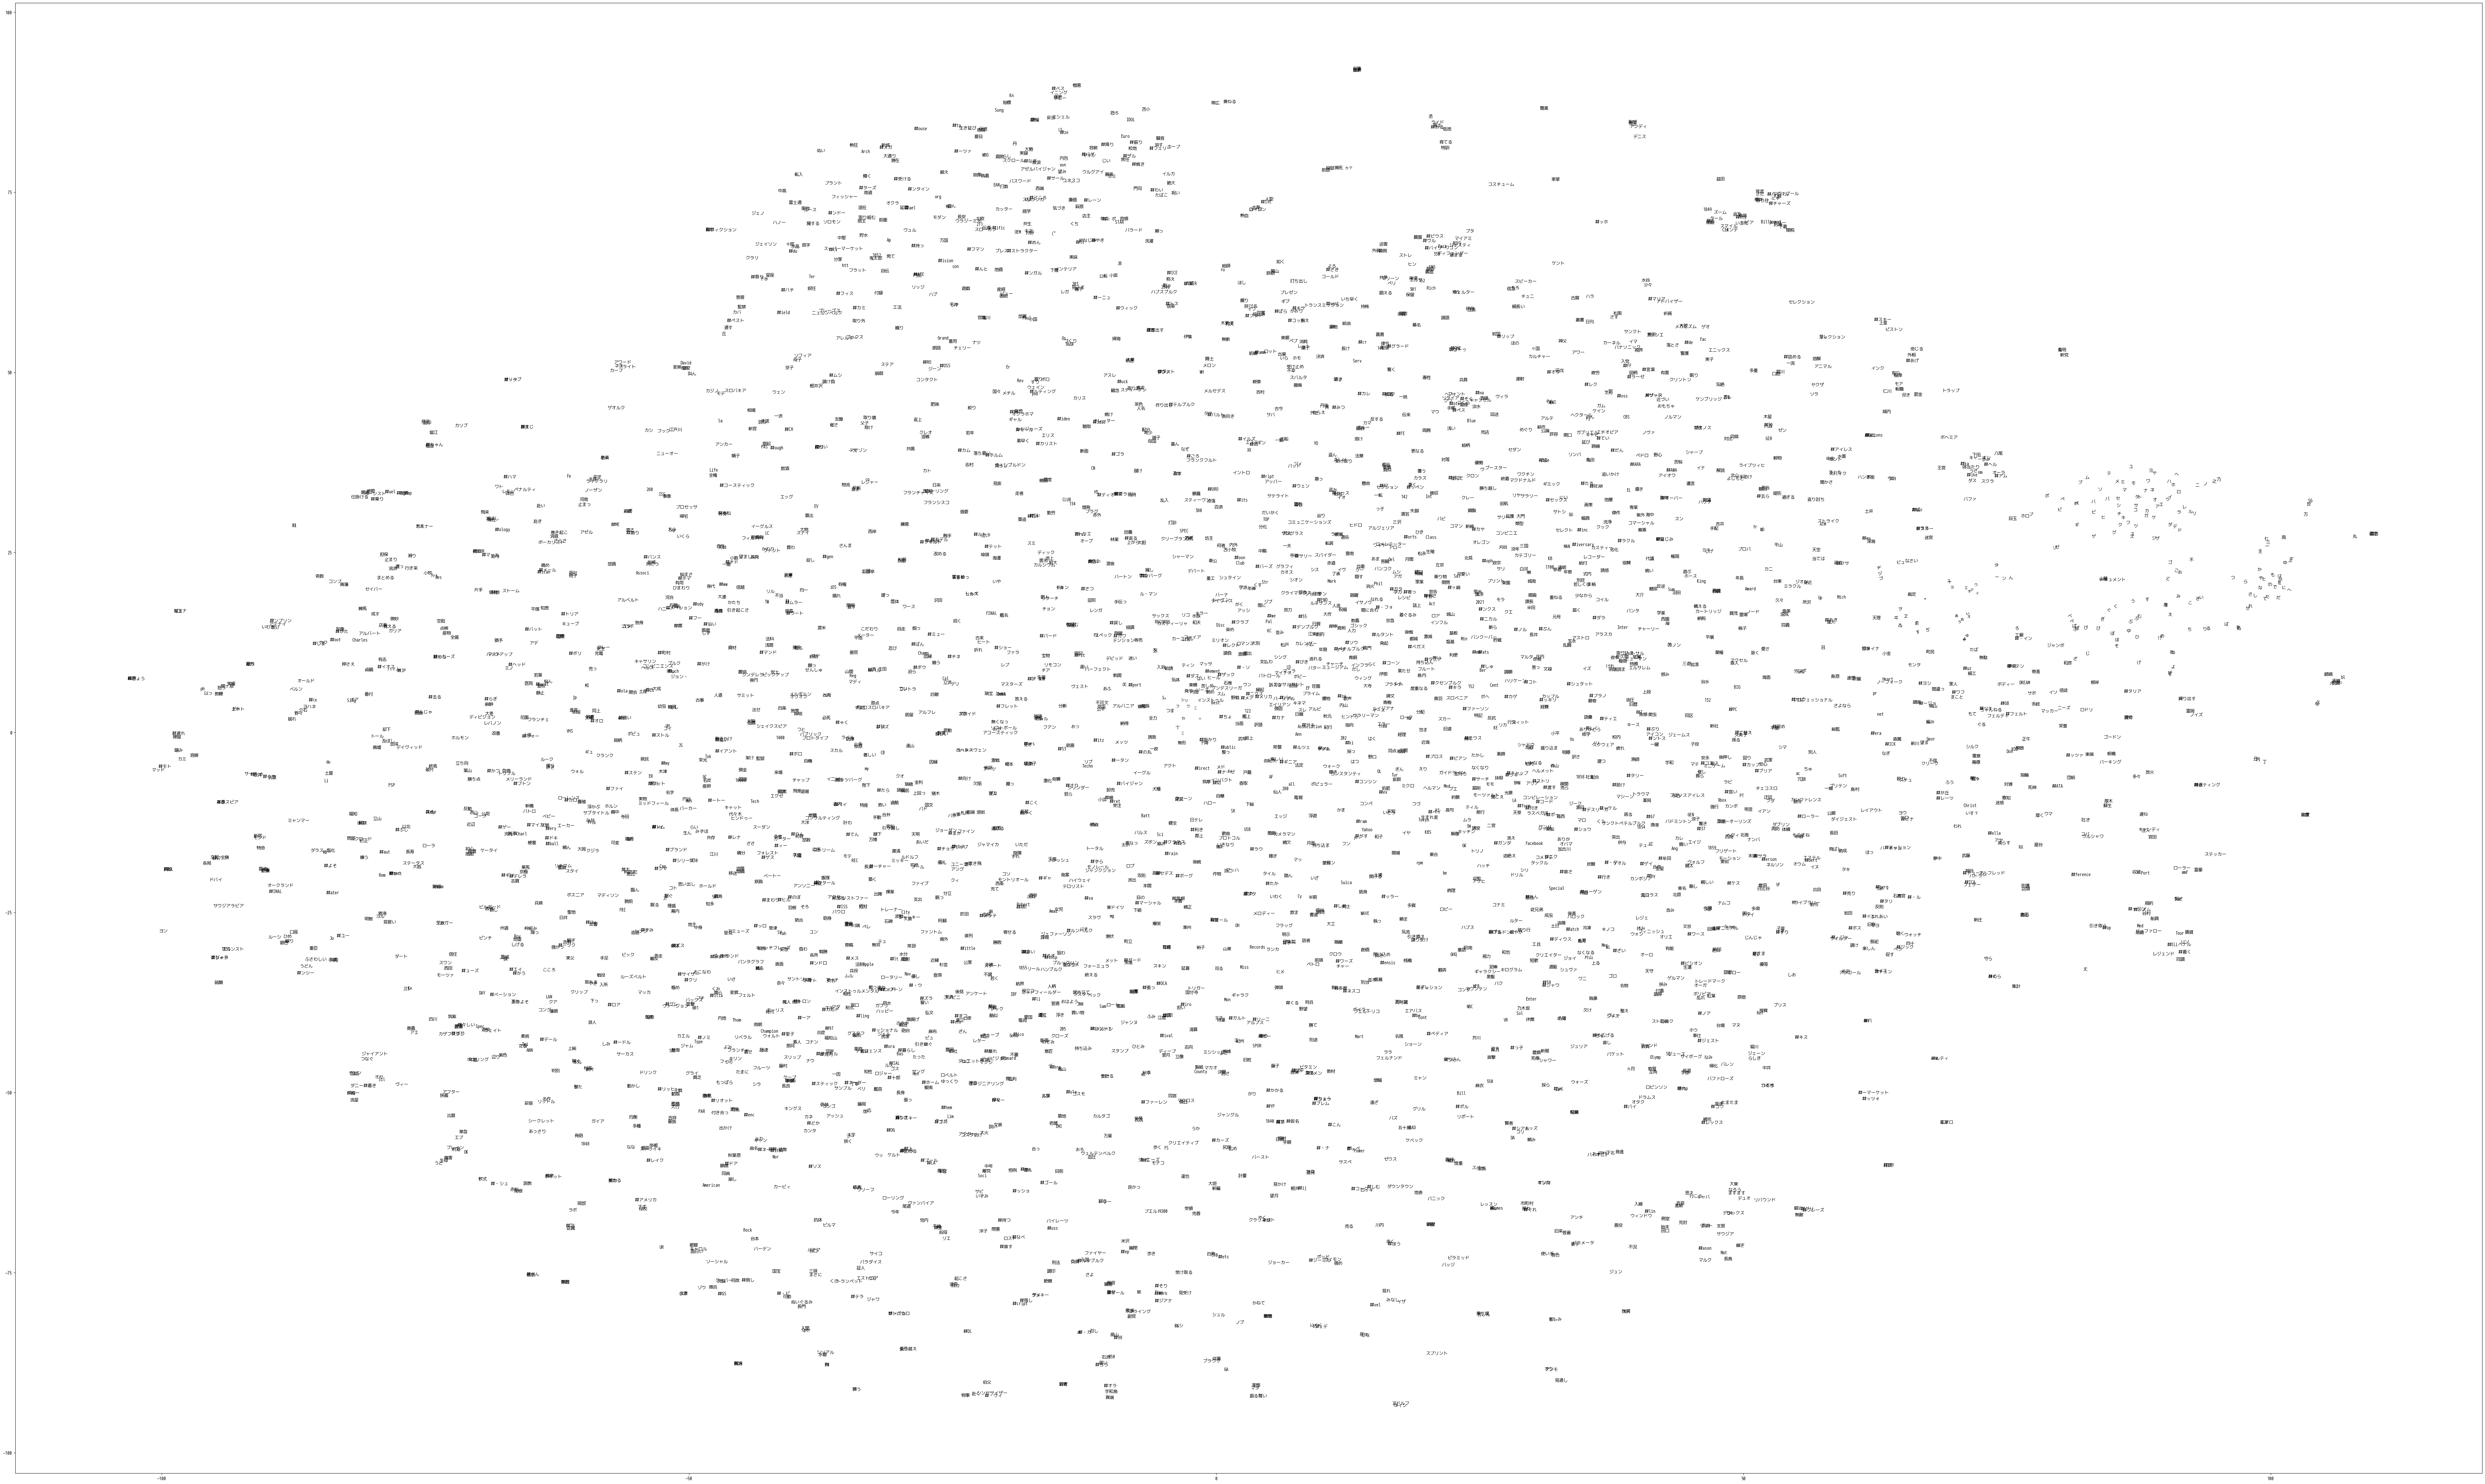

In [50]:
# Plot the transformed BERT vocabulary embeddings:
import japanize_matplotlib
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "VL Gothic"

fig = plt.figure(figsize=(100, 60))
alltexts = list()
for i, txt in enumerate(words_to_plot):
    plt.scatter(wordembs_to_use_tsne[i, 0], wordembs_to_use_tsne[i, 1], s=0)
    currtext = plt.text(wordembs_to_use_tsne[i, 0], wordembs_to_use_tsne[i, 1], txt)
    alltexts.append(currtext)


# Save the plot before adjusting.
plt.savefig("japanese-viz-bert-voc-noadj.pdf", format="pdf")
# print('now running adjust_text')
# Using autoalign often works better in my experience, but it can be very slow for this case, so it's false by default below:
# numiters = adjust_text(alltexts, autoalign=True, lim=50)
# from adjustText import adjust_text
# numiters = adjust_text(alltexts, autoalign=False, lim=50)
# print('done adjust text, num iterations: ', numiters)
# plt.savefig('japanese-viz-bert-voc-tsne10k-viz4k-adj50.pdf', format='pdf')

# plt.show()

In [2]:
### フォント一覧を確認するサンプルコード
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import numpy as np

# fonts = list(np.unique([f.name for f in matplotlib.font_manager.fontManager.ttflist]))

# fig = plt.figure(figsize=(8, 100))
# ax = fig.add_subplot(1, 1, 1)
# ax.set_ylim([-1, len(fonts)])
# ax.set_yticks(np.arange(0, len(fonts), 10))

# for i, f in enumerate(fonts):
#     ax.text(0.2, i,  '日本語強 {}'.format(f), fontdict={'family': f, 'fontsize': 14})

# plt.show()

In [66]:
from pathlib import Path

import pandas as pd
from config import config

df = pd.read_csv(Path(config.SENTENCE_DATA_DIR, "aozora.csv"))

In [83]:
word = "市場"
word_classes = ["しじょう", "いちば"]
word = "礼拝"
word_classes = ["れいはい", "らいはい"]
word = "今日"
word_classes = ["きょう", "こんにち"]
word = "今日"
word_classes = ["きょう", "こんにち"]
word = "表"
word_classes = ["ひょう", "おもて"]
word = "仮名"
word_classes = ["かな", "かめい"]
word = "変化"
word_classes = ["へんか", "へんげ"]

In [84]:
from yomikata.heteronyms import heteronyms

print(heteronyms[heteronyms["surface"] == word])

from pathlib import Path

pronunciation_df = pd.read_csv(Path(config.PRONUNCIATION_DATA_DIR, "all.csv"))
print(pronunciation_df[pronunciation_df["surface"] == word]["pronunciations"].values)

   surface  readings  in_bert
29      変化         2     True
["['へんか', 'へんげ']"]


In [85]:
df_keyword = df[df["sentence"].str.contains(word)]
df_keyword = df_keyword.reset_index(drop=True)
window_size = 128
df_keyword["sentence-shorter"] = df_keyword["sentence"].apply(
    lambda sentence: (
        idx := sentence.index(word),
        sentence[np.max([0, idx - window_size]) : idx]
        + sentence[idx : np.min([len(sentence), idx + window_size])],
    )[1]
)
print(len(df_keyword))

1182


In [86]:
def reading_matcher(furigana, word, word_classes):
    try:
        shifted_furigana = furigana[furigana.index(word) :]
    except ValueError:
        print(word)
        print(furigana)
        return -1
    found_reading = shifted_furigana[
        shifted_furigana.index("[") + 1 : shifted_furigana.index("]")
    ]
    # print(found_reading)
    for reading in word_classes:
        if found_reading.find(reading) != -1:
            return reading
    return -1

In [87]:
df_keyword["reading"] = df_keyword["furigana"].apply(
    lambda sentence: reading_matcher(sentence, word, word_classes)
)

In [88]:
# TODO: Improve the code for classifying words with furigana into one of the reading classes.

In [89]:
for word_class in word_classes:
    print(f"{word_class} {len(df_keyword[df_keyword['reading'] == word_class])}")
print("failures", len(df_keyword[df_keyword["reading"] == -1]))
df_keyword[df_keyword["reading"] == -1]

へんか 1105
へんげ 63
failures 14


sentence  \
22                   娘の顔は美しいなりでその美しさが悲しそうに変化ってゆきそうだった。   
24                          「苦しんでいる時は、すぐ目の色が変化ってしまうね。」   
25                             「と、何かこう変化った事が起きて居はしないか。   
26                                        「べつに変化りはないか。   
27                                   変化りがなくて何よりいい塩梅だ。」   
28                       父親はそのとき不思議なほど何かに思い当って顔色を変化えた。   
29               それにしても何という変化った人だろうと、笏は自宅の方へ引きかえそうとした。   
30                                      その上眼色まで変化っていた。   
31              そのような阿闍利さまのお人がらが、にわかに変化ってしまったのでございます。」   
32                                    「どういう風に変化ったのじゃ。」   
33   その顔はこれまでの阿闍利さまとはまるで違った色蒼ざめ眼のくぼんだ青鬼のような顔に変化っており...   
358          浅井の調子は、それでも色の褪せた洋服を着ていたころと大した変化は認められなかった。   
438  いつでも早速に相変化転するのが陣形の本質で、鶴翼でも蛇形でも鳥雲の陣でも、そのままに固執した...   
911                          ......変化でございますわね――ほんとうに。」   

                                              furigana  \
22   娘[むすめ]の顔[かお]は美[うつく]しいなりでその美[うつく]しさが悲[かな]しそうに変化...   
24       「苦[くる]しんでいる時[とき]は、すぐ目[め]の色[いろ]が変化[かわ]ってしまうね。」   
25           「と、何[なに]かこう変化[かわ]った事[こと]が起[お]きて居[い]はしないか。   
26                                    「べつに変化[かわ]りはないか。   
27                     変化[かわ]りがなくて何[なに]よりいい塩梅[あんばい]だ。」   
28   父親[ちちおや]はそのとき不思議[ふしぎ]なほど何[なに]かに思[おも]い当[あた]って顔色...   
29   それにしても何[なん]という変化[かわ]った人[ひと]だろうと、笏[しゃく]は自宅[じたく]...   
30                         その上[うえ]眼色[めいろ]まで変化[かわ]っていた。   
31   そのような阿闍利[あじゃり]さまのお人[ひと]がらが、にわかに変化[かわ]ってしまったのでご...   
32                            「どういう風[ふう]に変化[かわ]ったのじゃ。」   
33   その顔[かお]はこれまでの阿闍利[あじゃり]さまとはまるで違[ちが]った色[いろ]蒼[あお]...   
358  浅井[あさい]の調子[ちょうし]は、それでも色[いろ]の褪[あ]せた洋服[ようふく]を着[き...   
438  いつでも早速[さっそく]に相変化転[そーへん けてん]するのが陣形[じんけい]の本質[ほんし...   
911                     ......変化[おばけ]でございますわね――ほんとうに。」   

                 sentenceid  \
22           mizuumi.txt_63   
24             aru.txt_1044   
25            koroo.txt_450   
26            koroo.txt_540   
27            koroo.txt_552   
28          nochino.txt_144   
29          nochino.txt_229   
30          nochino.txt_359   
31             ajari.txt_82   
32             ajari.txt_83   
33            ajari.txt_224   
358          tadare.txt_542   
438  uesugikenshin.txt_2925   
911          bangari.txt_97   

                                      sentence-shorter reading  
22                   娘の顔は美しいなりでその美しさが悲しそうに変化ってゆきそうだった。      -1  
24                          「苦しんでいる時は、すぐ目の色が変化ってしまうね。」      -1  
25                             「と、何かこう変化った事が起きて居はしないか。      -1  
26                                        「べつに変化りはないか。      -1  
27                                   変化りがなくて何よりいい塩梅だ。」      -1  
28                       父親はそのとき不思議なほど何かに思い当って顔色を変化えた。      -1  
29               それにしても何という変化った人だろうと、笏は自宅の方へ引きかえそうとした。      -1  
30                                      その上眼色まで変化っていた。      -1  
31              そのような阿闍利さまのお人がらが、にわかに変化ってしまったのでございます。」      -1  
32                                    「どういう風に変化ったのじゃ。」      -1  
33   その顔はこれまでの阿闍利さまとはまるで違った色蒼ざめ眼のくぼんだ青鬼のような顔に変化っており...      -1  
358          浅井の調子は、それでも色の褪せた洋服を着ていたころと大した変化は認められなかった。      -1  
438  いつでも早速に相変化転するのが陣形の本質で、鶴翼でも蛇形でも鳥雲の陣でも、そのままに固執した...      -1  
911                          ......変化でございますわね――ほんとうに。」      -1

In [90]:
df_keyword = df_keyword[df_keyword["reading"] != -1]

In [91]:
word_id = tokenizer.encode(word, add_special_tokens=False)[0]
pad_size = 32
df_keyword["sentence-encoded"] = df_keyword["sentence-shorter"].apply(
    lambda sentence: tokenizer.encode(
        sentence,
        add_special_tokens=False,
        max_length=pad_size,
        truncation=True,
        padding="max_length",
    )
)
df_keyword["encoding-success"] = df_keyword["sentence-encoded"].apply(
    lambda encoding: word_id in encoding
)
print(len(df_keyword[~df_keyword["encoding-success"]]), "encoding failures")
df_keyword = df_keyword[df_keyword["encoding-success"]]
df_keyword = df_keyword.reset_index(drop=True)
df_keyword["keyword-index"] = df_keyword["sentence-encoded"].apply(
    lambda encoding: encoding.index(word_id)
)

272 encoding failures


In [92]:
df_keyword["keyword-index"] = df_keyword["sentence-encoded"].apply(
    lambda encoding: encoding.index(word_id)
)

In [93]:
encoding_stack = np.vstack(df_keyword["sentence-encoded"])

In [94]:
import torch

forward_pass = model.forward(torch.tensor(encoding_stack))

In [95]:
np.shape(forward_pass[0])

torch.Size([896, 32, 768])

In [96]:
embs = []
for i in range(len(df_keyword)):
    embs.append(forward_pass[0][i][df_keyword.at[i, "keyword-index"]].detach().numpy())
embs = np.array(embs)

In [97]:
from sklearn.manifold import TSNE

# Run t-SNE on the contextualized embeddings:
mytsne_tokens = TSNE(
    n_components=2,
    early_exaggeration=12,
    verbose=2,
    metric="cosine",
    init="pca",
    n_iter=2000,
)
embs_tsne = mytsne_tokens.fit_transform(embs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 896 samples in 0.001s...
[t-SNE] Computed neighbors for 896 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 896 / 896
[t-SNE] Mean sigma: 0.101678
[t-SNE] Computed conditional probabilities in 0.099s
[t-SNE] Iteration 50: error = 66.6935043, gradient norm = 0.0370203 (50 iterations in 0.226s)
[t-SNE] Iteration 100: error = 65.6179428, gradient norm = 0.0045183 (50 iterations in 0.111s)
[t-SNE] Iteration 150: error = 65.6156311, gradient norm = 0.0044755 (50 iterations in 0.100s)
[t-SNE] Iteration 200: error = 65.6150284, gradient norm = 0.0036680 (50 iterations in 0.097s)
[t-SNE] Iteration 250: error = 65.6199951, gradient norm = 0.0123742 (50 iterations in 0.097s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.619995
[t-SNE] Iteration 300: error = 1.6271499, gradient norm = 0.0134209 (50 iterations in 0.097s)
[t-SNE] Iteration 350: error = 1.4532173, gradient norm = 0.0106478 (

<Figure size 600x400 with 0 Axes>

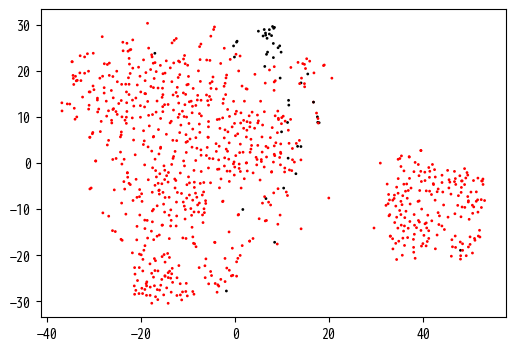

In [98]:
# Plot the keyword+context strings.
import japanize_matplotlib
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "VL Gothic"

colors = ["red", "black", "blue", "green"]
classes = list(df_keyword["reading"].unique())

fig = plt.figure(figsize=(6, 4))
cs = [
    colors[classes.index(df_keyword["reading"].iloc[i])] for i in range(len(df_keyword))
]

fig = plt.figure(figsize=(6, 4))
plt.scatter(embs_tsne[:, 0], embs_tsne[:, 1], s=1, color=cs)

plt.savefig("japanese-viz-bert-ctx-points-" + word + ".pdf", format="pdf")
plt.savefig("japanese-viz-bert-ctx-points-" + word + ".png", format="png")

plt.show()

In [22]:
# Plot the keyword+context strings.
# import matplotlib.pyplot as plt
# import japanize_matplotlib

# plt.rcParams["font.family"] = "VL Gothic"

# colors = ['red', 'black']
# classes = list(df_keyword['reading'].unique())
# fig = plt.figure(figsize=(50, 30))
# alltexts = list()
# for i, txt in enumerate(df_keyword['sentence-shorter']):
#     if i % 100 == 0:
#         print(i)
#     plt.scatter(embs_tsne[i,0], embs_tsne[i,1], s=0)
#     c = colors[classes.index(df_keyword['reading'].iloc[i])]
#     currtext = plt.text(embs_tsne[i,0], embs_tsne[i,1], txt, color=c)
#     #alltexts.append(currtext)

# plt.savefig('japanese-viz-bert-ctx-text-'+word+'.pdf', format='pdf')
# # print('now running adjust_text')
# #numiters = adjust_text(alltexts, autoalign=True, lim=50)
# #numiters = adjust_text(alltexts, autoalign=False, lim=50)
# #print('done adjust text, num iterations: ', numiters)
# #plt.savefig('viz-bert-ctx-values-viz750-adj.pdf', format='pdf')

# plt.show

## Handling out of vocab heteronyms

In [6]:
text = "その力士には金星が多くて大人気。"
text = "一時"

In [7]:
from yomikata.dictionary import DictionaryReader

DicReader = DictionaryReader()
DicReader.tagger(text)

[一時]

Here we see a problem: The ambiguous word 大人気 is marked as two tokens. Does bert use the same tokenizer? (It uses unidic-lite)

In [8]:
from transformers import BertJapaneseTokenizer

tokenizer = BertJapaneseTokenizer.from_pretrained("cl-tohoku/bert-base-japanese-v2")

/home/passaglia/machine-learning/yomikata/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
%time
text_encoded = tokenizer(
    text,
    add_special_tokens=False,
)
input_ids = text_encoded["input_ids"]
input_mask = text_encoded["attention_mask"]
print(input_ids)
print([tokenizer._convert_id_to_token(input_id) for input_id in input_ids])
tokenizer.decode(input_ids)

CPU times: user 10 µs, sys: 14 µs, total: 24 µs
Wall time: 46 µs
[1031, 2754]
['一', '時']


'一 時'

In [14]:
"一時" in list(tokenizer.vocab.keys())

True

In [16]:
tokenizer.vocab["一時"]

12729

In [23]:
tokenizer.encode("一時")

[2, 1031, 2754, 3]

In [18]:
len(tokenizer)

32768

In [19]:
tokenizer.add_tokens(["一時"])

0

In [31]:
tokenizer.decode(tokenizer.encode(["一時"], add_special_tokens=False))

'一時'

In [20]:
len(tokenizer)

32768

Note this is not a contextual embedding yet, let's look at it after contextualizing

In [214]:
from transformers import BertModel

model = BertModel.from_pretrained("cl-tohoku/bert-base-japanese-v2")
model.eval();

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-v2 were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [215]:
text_encoded = tokenizer(
    text,
    # max_length=4,
    # truncation=True,
    # padding="max_length",
    return_tensors="pt",
    add_special_tokens=False,
)  # needs to be pytorch tensors
input_ids = text_encoded["input_ids"]
input_mask = text_encoded["attention_mask"]

print(input_ids.shape)

outputs = model.forward(input_ids=input_ids, attention_mask=input_mask)

print(outputs.last_hidden_state)
print(outputs.last_hidden_state.shape)

torch.Size([1, 11])
tensor([[[-0.2428, -0.5576,  0.1232,  ..., -0.3019,  0.0203, -0.0326],
         [-0.8364, -0.2724,  0.3225,  ..., -0.6664, -1.4605,  0.2552],
         [-0.5596, -0.6500,  0.7931,  ..., -1.0183, -0.7353,  0.5766],
         ...,
         [-0.2473, -0.4047, -0.2020,  ...,  0.6247, -0.6239,  0.5958],
         [ 0.1889, -0.1735, -0.1395,  ..., -0.7936, -0.3881, -0.4757],
         [-0.1373, -1.3385, -0.4313,  ..., -0.3105, -0.2350,  0.0091]]],
       grad_fn=<NativeLayerNormBackward0>)
torch.Size([1, 11, 768])


Now let's add a word to the vocabulary 

In [216]:
tokenizer.add_tokens(["大人気"])
model.resize_token_embeddings(
    len(tokenizer)
)  # Resize the dictionary size of the embedding layer

Embedding(32769, 768)

In [217]:
len(tokenizer)

32769

In [218]:
%time
text_encoded = tokenizer(
    text,
    add_special_tokens=False,
)
input_ids = text_encoded["input_ids"]
input_mask = text_encoded["attention_mask"]
print(input_ids)
print([tokenizer._convert_id_to_token(input_id) for input_id in input_ids])
tokenizer.decode(input_ids)

CPU times: user 23 µs, sys: 2 µs, total: 25 µs
Wall time: 60.8 µs
[11145, 17121, 893, 897, 26348, 862, 11276, 888, 32768, 829]
['その', '力士', 'に', 'は', '金星', 'が', '多く', 'て', '[UNK]', '。']


'その 力士 に は 金星 が 多く て 大人気 。'

In [219]:
text_encoded = tokenizer(
    text,
    # max_length=4,
    # truncation=True,
    # padding="max_length",
    return_tensors="pt",
    add_special_tokens=False,
)  # needs to be pytorch tensors
input_ids = text_encoded["input_ids"]
input_mask = text_encoded["attention_mask"]

print(input_ids.shape)

outputs = model.forward(input_ids=input_ids, attention_mask=input_mask)

print(outputs.last_hidden_state)
print(outputs.last_hidden_state.shape)

torch.Size([1, 10])
tensor([[[-0.8429, -0.3977,  0.5697,  ..., -0.4714,  0.1642, -0.0630],
         [-1.0160, -0.2246,  0.5453,  ..., -0.6281, -1.0964,  0.4485],
         [-0.6527, -0.3744,  0.8225,  ..., -1.2012, -0.4925,  0.2024],
         ...,
         [ 0.0034, -0.5793, -0.1832,  ..., -0.5203, -0.5072,  0.3617],
         [-0.0684, -0.4761, -0.1441,  ..., -0.2418, -0.3271, -0.0534],
         [-0.6835, -0.8585, -0.4059,  ..., -0.7895,  1.1799,  0.1089]]],
       grad_fn=<NativeLayerNormBackward0>)
torch.Size([1, 10, 768])
